## Выявление основных факторов, влияющих на снижение покупательской активности клиентов интернет-магазина, с применениемметодов машинного обучения с учителем. 
 

###  Цель исследований

   Целью проекта является решение задачи машинного обучения, позволяющей построить бинарный классификатор уровня 
покупательской активности, выявить основные факторы, влияющие на потерю интереса клиентов, и выработать рекомендации по 
сохранению и стимулированию клиентов интернет-магазина. 

### ЭТАПЫ ВЫПОЛНЕНИЯ РАБОТЫ
1. [Загрузка и предобработка данных](#start)
2. [Анализ данных](#start2)
3. [Объединение таблиц](#start_3)
4. [Корреляционный анализ](#start_4)
5. [Использование пайплайнов](#start_5)
6. [Анализ важности признаков](#start_6)
7. [Сегментация покупателей](#start_7)
8. [Выводы](#start_8)
9. [Рекомендации](#start_9)

In [314]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from urllib.parse import urlencode 
from scipy import stats as st
import random
import statistics as stat
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans
import pandas as pd
import seaborn as sns
import math
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import itertools
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.metrics import roc_auc_score
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage 
import numpy as np
import scipy.stats as st
from scipy.stats import spearmanr
from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import precision_recall_curve
import shap
from sklearn.impute import SimpleImputer 
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler, MinMaxScaler
import phik
from phik import phik_matrix
from phik.report import plot_correlation_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import PolynomialFeatures
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.svm import SVC
from sklearn.inspection import permutation_importance
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from numpy import median, mean

## Загрузка и предобработка данных
   <a id="start"></a>

In [315]:
df_1 = pd.read_csv('/datasets/market_file.csv')
df_1[:5]

id Покупательская активность Тип сервиса Разрешить сообщать  \
0  215348                 Снизилась     премиум                 да   
1  215349                 Снизилась     премиум                 да   
2  215350                 Снизилась   стандартт                нет   
3  215351                 Снизилась   стандартт                 да   
4  215352                 Снизилась   стандартт                нет   

   Маркет_актив_6_мес  Маркет_актив_тек_мес  Длительность  Акционные_покупки  \
0                 3.4                     5           121               0.00   
1                 4.4                     4           819               0.75   
2                 4.9                     3           539               0.14   
3                 3.2                     5           896               0.99   
4                 5.1                     3          1064               0.94   

  Популярная_категория  Средний_просмотр_категорий_за_визит  \
0     Товары для детей                                    6   
1     Товары для детей                                    4   
2    Домашний текстиль                                    5   
3     Товары для детей                                    5   
4     Товары для детей                                    3   

   Неоплаченные_продукты_штук_квартал  Ошибка_сервиса  Страниц_за_визит  
0                                   2               1                 5  
1                                   4               2                 5  
2                                   2               1                 5  
3                                   0               6                 4  
4                                   2               3                 2

In [316]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   id                                   1300 non-null   int64  
 1   Покупательская активность            1300 non-null   object 
 2   Тип сервиса                          1300 non-null   object 
 3   Разрешить сообщать                   1300 non-null   object 
 4   Маркет_актив_6_мес                   1300 non-null   float64
 5   Маркет_актив_тек_мес                 1300 non-null   int64  
 6   Длительность                         1300 non-null   int64  
 7   Акционные_покупки                    1300 non-null   float64
 8   Популярная_категория                 1300 non-null   object 
 9   Средний_просмотр_категорий_за_визит  1300 non-null   int64  
 10  Неоплаченные_продукты_штук_квартал   1300 non-null   int64  
 11  Ошибка_сервиса                

In [317]:
df_1.isna().sum()

id                                     0
Покупательская активность              0
Тип сервиса                            0
Разрешить сообщать                     0
Маркет_актив_6_мес                     0
Маркет_актив_тек_мес                   0
Длительность                           0
Акционные_покупки                      0
Популярная_категория                   0
Средний_просмотр_категорий_за_визит    0
Неоплаченные_продукты_штук_квартал     0
Ошибка_сервиса                         0
Страниц_за_визит                       0
dtype: int64

In [318]:
d = ['Маркет_актив_6_мес', 'Акционные_покупки']
for i in d:
    df_1[i] = df_1[i].astype(float)
    print(df_1.dtypes[i] )

float64
float64


In [319]:
df_1['Тип сервиса'].unique()

array(['премиум', 'стандартт', 'стандарт'], dtype=object)

In [320]:
df_1.loc[df_1['Тип сервиса'] == 'стандартт', 'Тип сервиса'] = 'стандарт'
df_1['Тип сервиса'].unique()

array(['премиум', 'стандарт'], dtype=object)

In [321]:
df_1.duplicated().sum()

0

In [322]:
df_2 = pd.read_csv('/datasets/market_money.csv', decimal=",")
df_2[:5]

id               Период Выручка
0  215348  препредыдущий_месяц     0.0
1  215348        текущий_месяц  3293.1
2  215348     предыдущий_месяц     0.0
3  215349  препредыдущий_месяц  4472.0
4  215349        текущий_месяц  4971.6

In [323]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   id       3900 non-null   int64 
 1   Период   3900 non-null   object
 2   Выручка  3900 non-null   object
dtypes: int64(1), object(2)
memory usage: 91.5+ KB


In [324]:
df_2['Выручка'] = df_2['Выручка'].astype(float)
df_2.dtypes['Выручка']

dtype('float64')

In [325]:
df_2.isna().sum()

id         0
Период     0
Выручка    0
dtype: int64

In [326]:
df_2.duplicated().sum()

0

In [327]:
df_3 = pd.read_csv('/datasets/market_time.csv', decimal=",")
df_3[:5]

id            Период  минут
0  215348     текущий_месяц     14
1  215348  предыдцщий_месяц     13
2  215349     текущий_месяц     10
3  215349  предыдцщий_месяц     12
4  215350     текущий_месяц     13

In [328]:
df_3['Период'].unique()

array(['текущий_месяц', 'предыдцщий_месяц'], dtype=object)

In [329]:
df_3.loc[df_3['Период'] == 'предыдцщий_месяц', 'Период'] = 'предыдyщий_месяц'
df_3['Период'].unique()

array(['текущий_месяц', 'предыдyщий_месяц'], dtype=object)

In [330]:
df_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2600 entries, 0 to 2599
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      2600 non-null   int64 
 1   Период  2600 non-null   object
 2   минут   2600 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 61.1+ KB


In [331]:
df_3.isna().sum()

id        0
Период    0
минут     0
dtype: int64

In [332]:
df_3.duplicated().sum()

0

In [333]:
df_4 = pd.read_csv('/datasets/money.csv', decimal=",", sep=r';')
df_4[:5]

id  Прибыль
0  215348     0.98
1  215349     4.16
2  215350     3.13
3  215351     4.87
4  215352     4.21

In [334]:
df_4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       1300 non-null   int64  
 1   Прибыль  1300 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 20.4 KB


In [335]:
df_4.isna().sum()

id         0
Прибыль    0
dtype: int64

In [336]:
df_4.duplicated().sum()

0

In [337]:
len(df_2.loc[~df_2['id'].isin(df_1['id'])])

0

In [338]:
len(df_3.loc[~df_3['id'].isin(df_1['id'])])

0

<div class="alert alert-info">
    Исходные таблицы с данными не содержат пропусков и дубликатов. В таблице df_1 (коммуникации с покупателем и его продуктовое
поведение) у 2 признаков ('Маркет_актив_6_мес', 'Акционные_покупки') неверный тип данных 'object' был преобразован в тип 'float'.
В табл. df_2 (общие расходы покупателя зв период взаимодействия с сайтом) неверный тип данных 'object' признака 'Выручка' был 
преобразован в тип 'float'. В табл. df_3 (время, проведенное покупателем на сайте) исправлена лексиграфическая ошибка в 
названии класса 'предыдyщий_месяц'. Таблицы df_1 и df_4 имеют одинаковое количество строк - 1300. В таблице df_3 - в 2 раза
больше строк (2600), а в табл. df_2 - в 3 раза (3900). Это связано с тем, что в таблице df_3 каждое значение в столбце 'id'
дублируется дважды из-за наличия двух категорий в признаке 'Период', а в табл. df_2 значение в столбце 'id' дублируется трижды,
так как признак 'Период' в этой таблице имеет 3 значения. В таблицах с большим количеством строк (df_2 и df_3) отсутствуют новые 
значения признака 'id', которых не встречаются в табл. df_1.   
</div>

## Анализ данных
   <a id="start2"></a>

In [339]:
len(df_4.loc[df_4['Прибыль'] == 0])

0

In [340]:
len(df_1.loc[~df_1['id'].isin(df_4['id'])])

0

In [341]:
len(df_2.groupby('id')['Период'].count())

1300

In [342]:
df_2.groupby('id', as_index = False)['Период'].count()['Период'].unique()

array([3])

<div class="alert alert-info">
   В табл. df_4 собрана информация о среднемесячной выручке с каждого клиента в течение последних 3 месяцев. Все клиенты,
собранные в данной таблице, совершали покупки в течение последних 3 месяцев, а в табл. df_1, df_2 и df_3 представлены только
эти клиенты. Также все покупатели были активны (совершали покупки) в каждом из последних 3 месяцев: для каждого покупателя
зафиксирована выручка в текущем, предыдущем и препредыдущем месяцах. 
</div>

In [343]:
f = ['Маркет_актив_6_мес', 'Маркет_актив_тек_мес', 'Длительность', 'Акционные_покупки', 'Средний_просмотр_категорий_за_визит', 'Неоплаченные_продукты_штук_квартал', 'Ошибка_сервиса', 'Страниц_за_визит']
df_1[f].describe()

Маркет_актив_6_мес  Маркет_актив_тек_мес  Длительность  \
count         1300.000000           1300.000000   1300.000000   
mean             4.253769              4.011538    601.898462   
std              1.014814              0.696868    249.856289   
min              0.900000              3.000000    110.000000   
25%              3.700000              4.000000    405.500000   
50%              4.200000              4.000000    606.000000   
75%              4.900000              4.000000    806.000000   
max              6.600000              5.000000   1079.000000   

       Акционные_покупки  Средний_просмотр_категорий_за_визит  \
count        1300.000000                           1300.00000   
mean            0.319808                              3.27000   
std             0.249843                              1.35535   
min             0.000000                              1.00000   
25%             0.170000                              2.00000   
50%             0.240000                              3.00000   
75%             0.300000                              4.00000   
max             0.990000                              6.00000   

       Неоплаченные_продукты_штук_квартал  Ошибка_сервиса  Страниц_за_визит  
count                         1300.000000     1300.000000       1300.000000  
mean                             2.840000        4.185385          8.176923  
std                              1.971451        1.955298          3.978126  
min                              0.000000        0.000000          1.000000  
25%                              1.000000        3.000000          5.000000  
50%                              3.000000        4.000000          8.000000  
75%                              4.000000        6.000000         11.000000  
max                             10.000000        9.000000         20.000000

<div class="alert alert-info">
    Показатель среднемесячной рекламной активности за 6 мес. ('Маркет_актив_6_мес') имеет небольшой разброс: близкие среднее 
(4,25) и медианное (4,2) значения и относительно небольшое стандартное отклонение (1,01), составляющим 25 % от средней величины.
Текущая маркетинговая активность ('Маркет_актив_тек_мес') имеет близкие статистические характеристики к среднемесячной: 
прктически те же среднее (4,01) и медианное (4,0) значения с низким стандартным отклонением (0,7). Длительность пребывания 
на сайте ('Длительность') также имеет практически совпадающие среднее (601,9) и медианное (606) значения, но достаточное 
высокое стандартное отклонение (249,9), превышающее 40 % от среднего значения. Доля среднемесячных покупок по акции 
('Акционные_покупки') ожидаемо имеет большую дисперсию: среднее значение (0,32) отчетливо больше медианного (0,24), а стандартное
отклонение (0,25) превышает 80 % от величины среднего. Средний просмотр категорий ('Средний_просмотр_категорий_за_визит') имеет
умеренный разброс: среднее (3,27) и медианное (3,0) значения близки, стандартное отклонение составляет около 40 % от среднего. 
Количество неоплаченных продуктов ('Неоплаченные_продукты_штук_квартал') имеет довольно большую дисперсию: медианное (3,0) и
среднее (2,84) значения близки, а стандартное отклонение составляет около 70 % от среднего. Аналогичная ситуация с распределением
признака 'Ошибка сервиса': близкие среднее (4,18) и медианное (4,0) значения при высоком стандартном отклонении (около 50 %) от
среднего значения. Среднее количество страниц, промотренных пользователем за 1 визит ('Страниц_за_визит') (8,2), прктически 
совпадает с медианным (8,0) при величине стандартного отклонения порядка 50 % от среднего.
</div>

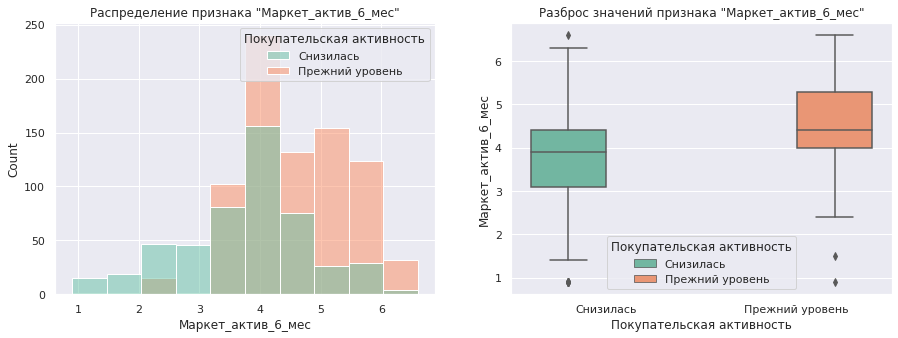

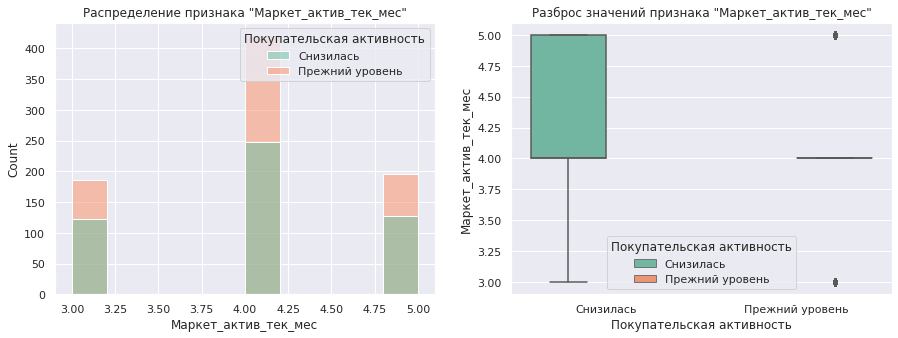

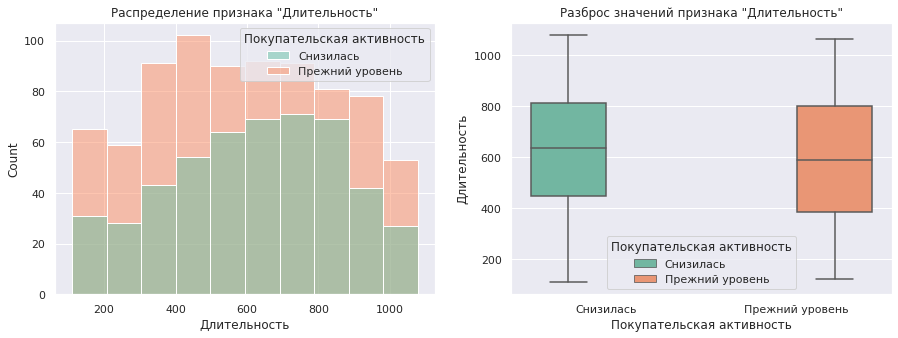

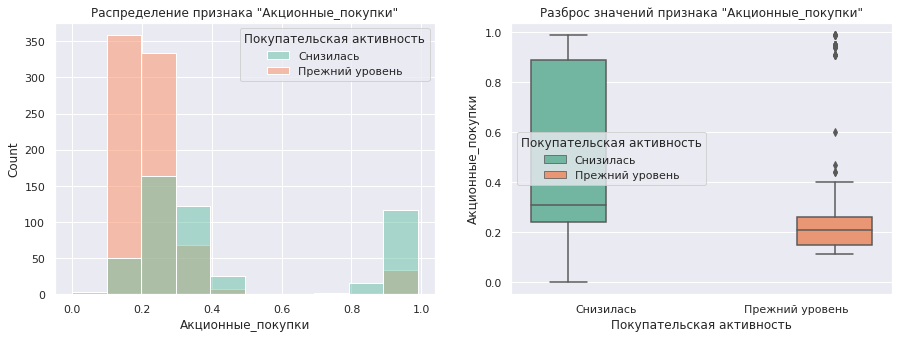

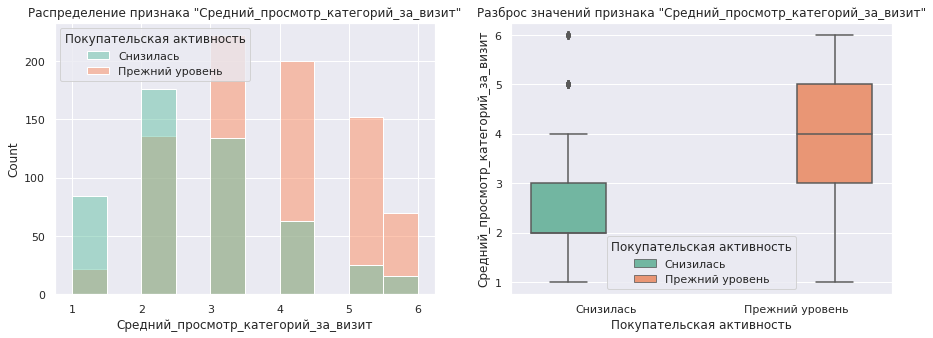

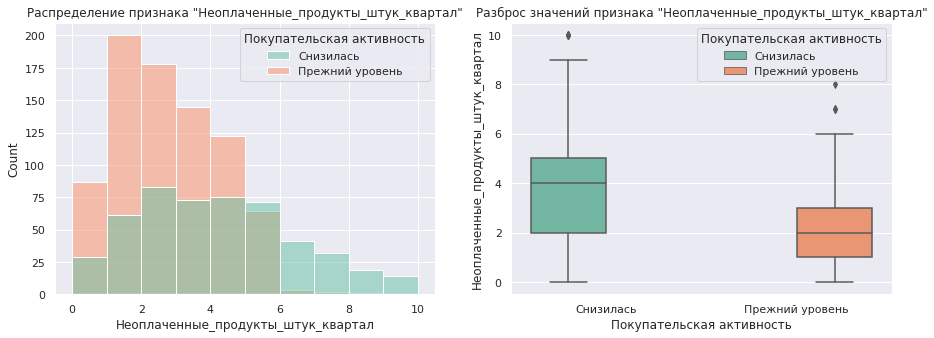

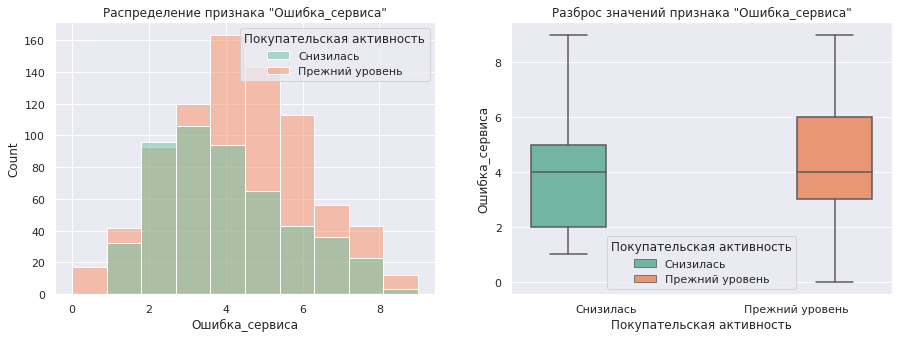

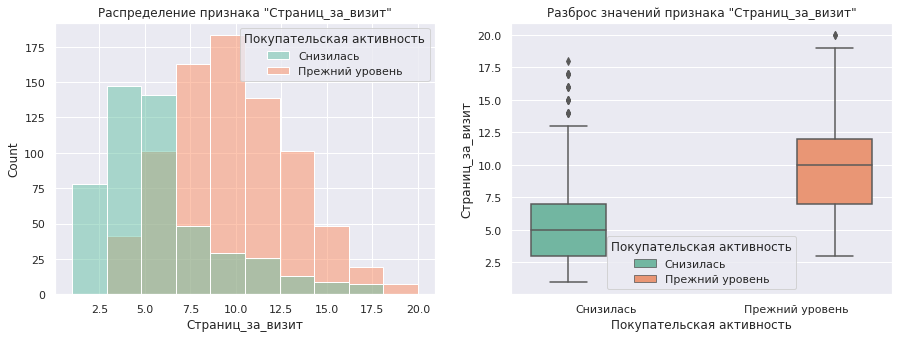

In [344]:
for i in f:
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
    sns.histplot(data = df_1, x = df_1[i], bins=10, ax=axes[0], hue = 'Покупательская активность', palette="Set2")
    axes[0].set_title('Распределение признака "{}"'.format(i))
    sns.boxplot(data = df_1, y = df_1[i], x = 'Покупательская активность', ax=axes[1], hue = 'Покупательская активность', palette="Set2")
    axes[1].set_title('Разброс значений признака "{}"'.format(i))
    plt.show()

<div class="alert alert-info">
    Для пользователей, сохранивших прежний уровень покупательской активности, среднемесячная маркетинговая активность за 
последние 6 мес была, в целом, выше, чем для пользователей со понизившейся покупательной активностью и составляла от 4 до 7 
акций. Медианное число среднемесячных акций для сохраненных пользователей приближается к 5, а для пользователей с пониженной 
активносттью медианное число акций не превышает 4. Непрерывность признака текущей маркетинговой активности ('Маркет_актив_тек_мес')
нарушена из-за небольшого периода наблюдений - все пользователи разделены на 3 группы по числу полученных рекламных акций: 3, 4
и 5. Больше всего пользователей получили по 4 акции и примерно раные количества пользователей получили по 3 и 5 акций. Обе 
категории пользователей (сохранившие и снизившие покупат активность) пропорционально распределены по акционным группам без 
преобладания какой-либо из категорий. По признаку длительности пребывания на сайте ('Длительность') пользователи в обеих 
категориях покупательской активности распределены равномерно при близкой медиане порядка 600 дней. В категории сохранивших
покупат активность большинство пользователей имеют регистрацию на сайте от 300 до 900 дней, а в категории со снизившейся 
активностью большинство пользователей имеют длительность регистрации от 500 до 900 дней. По показателю среднемесячной доли 
покупок по акции ('Акционные_покупки') покупатели разделены на 2 группы - более 80 % покупателей имеют низкую долю акционных
покупок (0,1 до 0,4) и лишь около 20 % покупателей - высокую (0,8 - 1,0). При этом, клиенты из категории, сохранившей покупат
активность, сосредоточены в первой группе с низкой долей акционных покупок, а в группе с высокой долей акционных покупок более
80 % составляют клиенты, снизившие покупат активность. Медианная доля акционных покупок (около 0,25) у клиентов, сохранивших 
покупат активность, немного ниже, по сравнению с клиентами, снизившими покупат активность (около 0,3). Покупатели, сохранившие 
активность, в среднем просматривали в 2 раза больше категорий (медиана 4), чем покупатели, снизившие активность (медиана 2), что
также заметно на гистограмме распределения, где в группах просмотра от 4 до 6 категорий непропорционально преобладают 
пользователи, сохранившие активность. Медианное количество неоплаченных прордуктов примерно в 2 раза выше у покупателей, 
снизивших активность (4), по сравнению с активными покупателями (около 2). На гистограмме активные покупатели преобладают в 
начальном интервале неоплаченных товаров (от 0 до 5), а интервал неоплаченных товаров от 6 дл 10 практически полностью представлен 
покупателями, снизившими активность. На покупателей, сохранивших и снизивших активность, приходится близкое медианное число 
сбоев сервиса - около 4. Однако, на гистограмме распределения, активные покупатели явно преобладают в области большого числа сбоев
от 5 до 9, а в области от 1 до 4 сбоев число покупателей обеих групп примерно равно. Активные покупатели в просматривали примерно
в 2 раза больше сраниц за визит (около 11), по сравнению с категорией снизивших активность (5), не смотря на наличие выбросов
в низкоактивной кеатегории (от 13 до 18 стр.). Это также подтверждается на гистограмме просмотра страниц, где в области 7 - 20 стр.
преобладают активные покупатепли.
. 

</div>

<div class="alert alert-info">
   Таким образом, из числовых (непрерывных) признаков наибольшее влияние на цель оказывают: 'Маркет_актив_6_мес', 
'Средний_просмотр_категорий_за_визит', 'Акционные_покупки', 'Неоплаченные_продукты_штук_квартал' и 'Страниц_за_визит'. 
Менее полезны признаки: 'Длительность' и 'Ошибка_сервиса'. Признак 'Маркет_актив_тек_мес' вероятно бесполезен в прогнозе цели.
</div>

In [345]:
d = ['Покупательская активность', 'Тип сервиса', 'Разрешить сообщать']

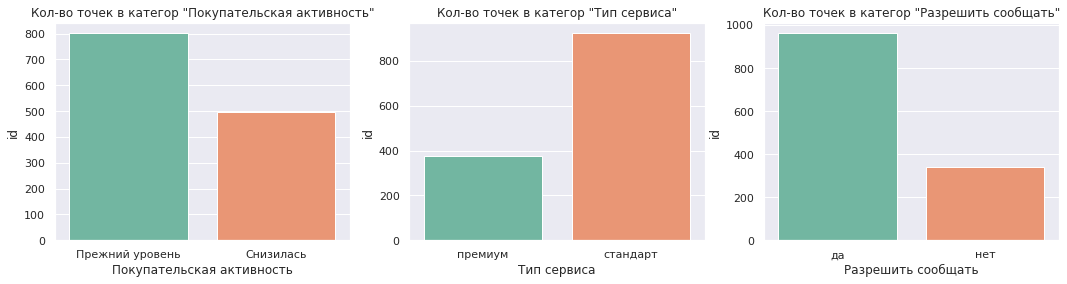

In [346]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18,4))
for i in range(len(d)):
    sns.barplot(data = df_1.groupby(d[i], as_index = False).agg({'id':'count'}), y = 'id', x = d[i], ax=axes[i], palette="Set2")
    axes[i].set_title('Кол-во точек в категор "{}"'.format(d[i]))

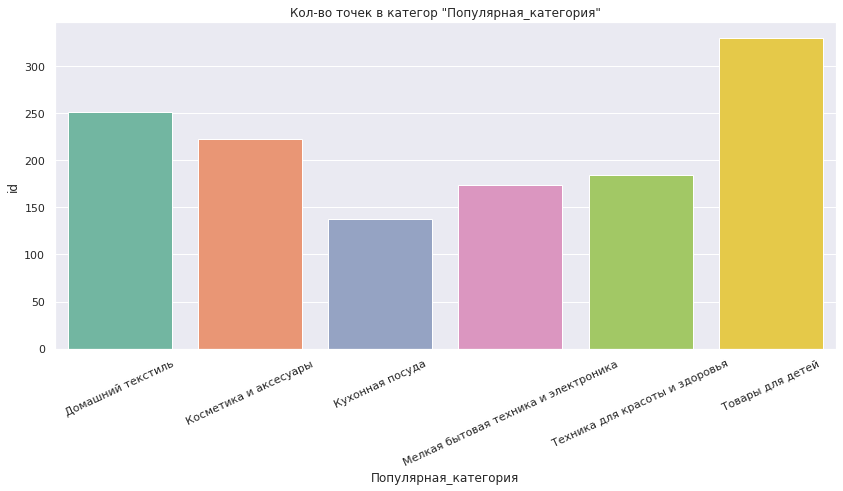

In [347]:
plt.subplots(figsize=(14,6))
sns.barplot(data = df_1.groupby('Популярная_категория', as_index = False).agg({'id':'count'}), y = 'id', x = 'Популярная_категория', palette="Set2")
plt.title('Кол-во точек в категор "{}"'.format('Популярная_категория'))
plt.xticks(rotation = 25);

<div class="alert alert-info">
   По значениям категориальных признаков пользователи распределены след образом. Пользователей, сохранивших активность (500), 
на 40 % больше, чем пользователей, снизивших активность (500). Около 900 пользователей обслуживаются в рамках стандартного 
сервиса и около 400 - в рамках премиального. Количество пользователей (около 950), разрешивших сообщать сведения о товарах,
в 3 раза больше, чем запретивших (около 350). Среди пользователей преобладает популярная категория 'Товары для детей' (350). На
втором и третьем местах идут домашний тексить и комсетика и аксесуары (250 и 225, соответственно). Категории бытовой техники и
техники красоты интересуют от 150 до 200 клиентов каждая. Менее всего интересна кухонная посуда - менее 150 пользователей.  
</div>

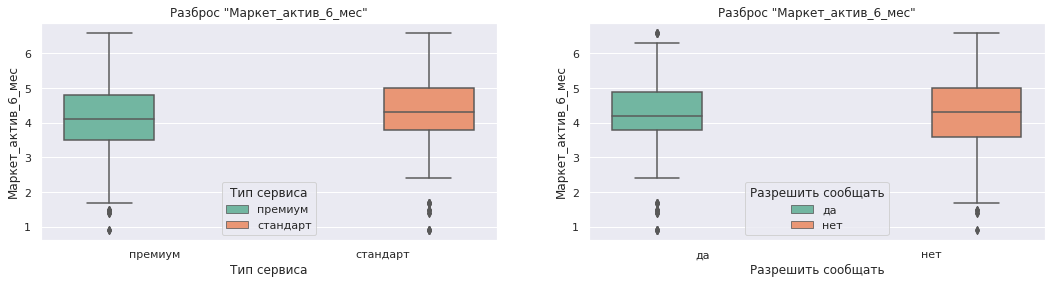

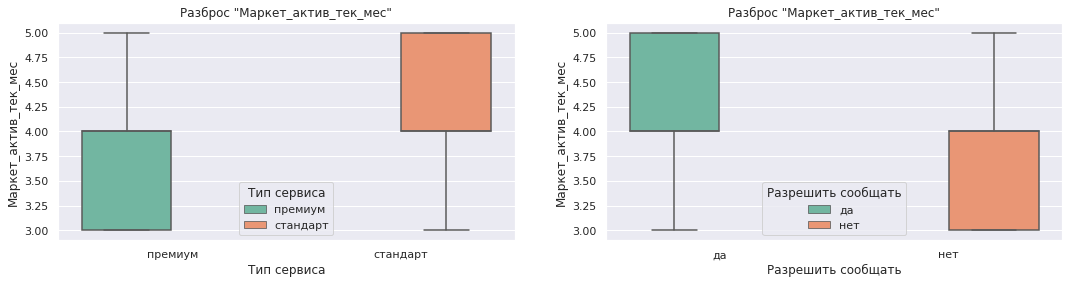

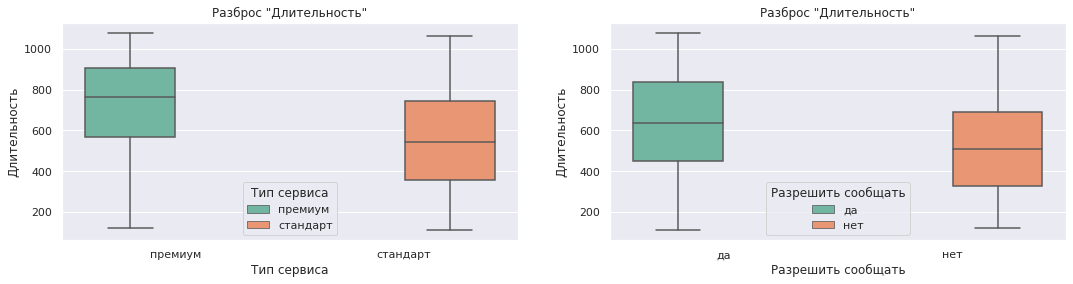

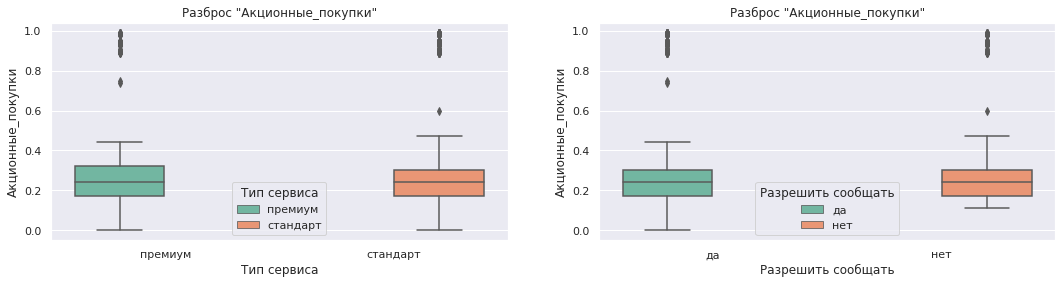

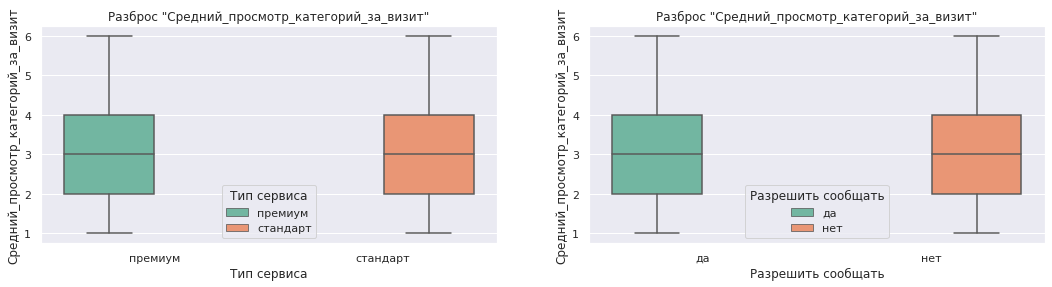

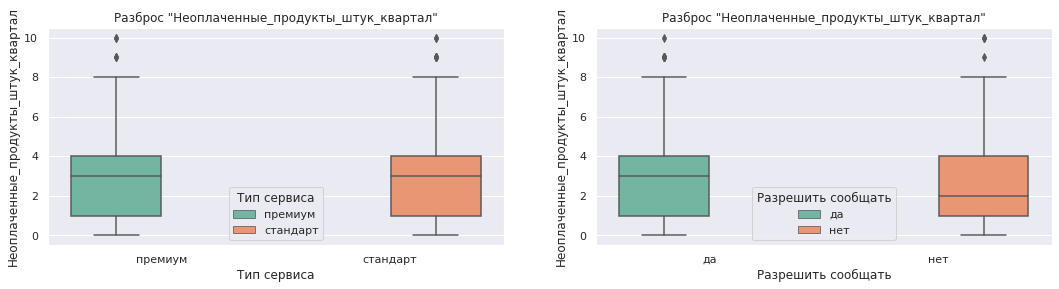

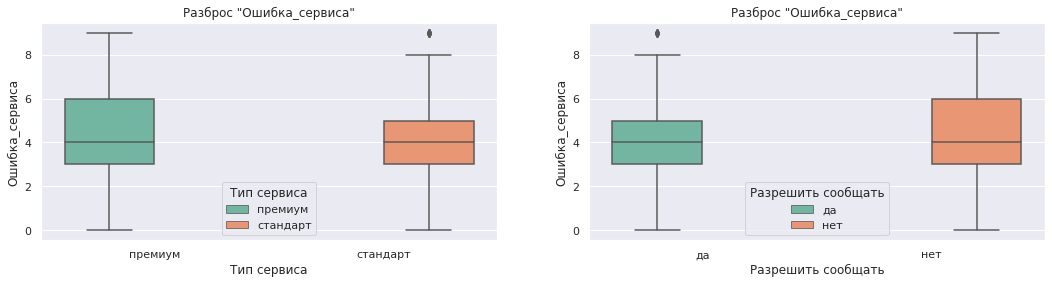

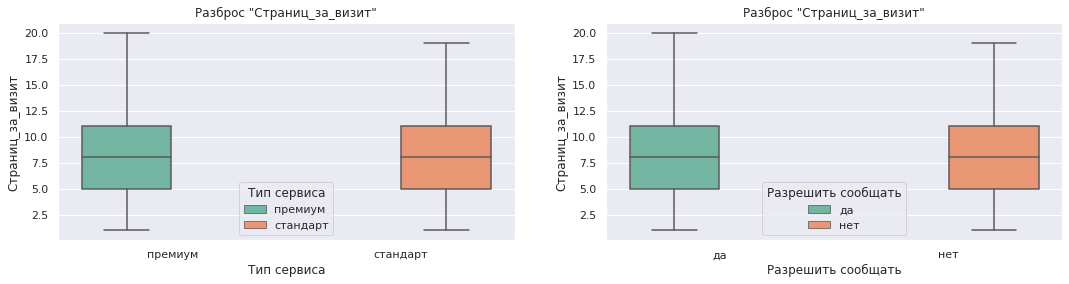

In [348]:
d = ['Тип сервиса', 'Разрешить сообщать']
for j in f:  
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18,4))
    for i in range(len(d)):
        sns.boxplot(data = df_1, y = j, x = d[i], ax=axes[i], hue = d[i], palette="Set2")
        axes[i].set_title('Разброс "{}"'.format(j))

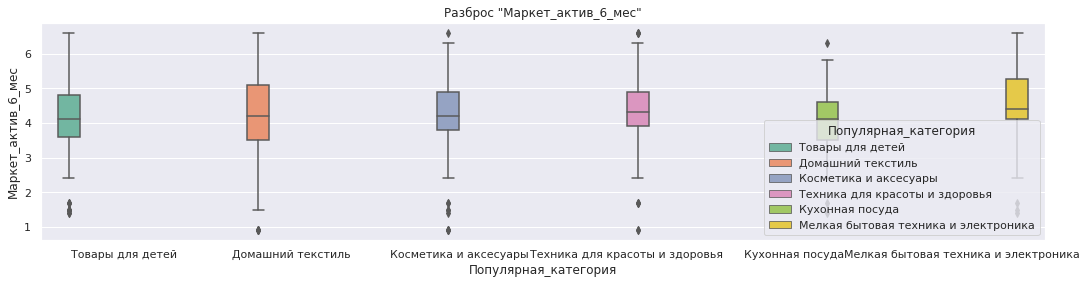

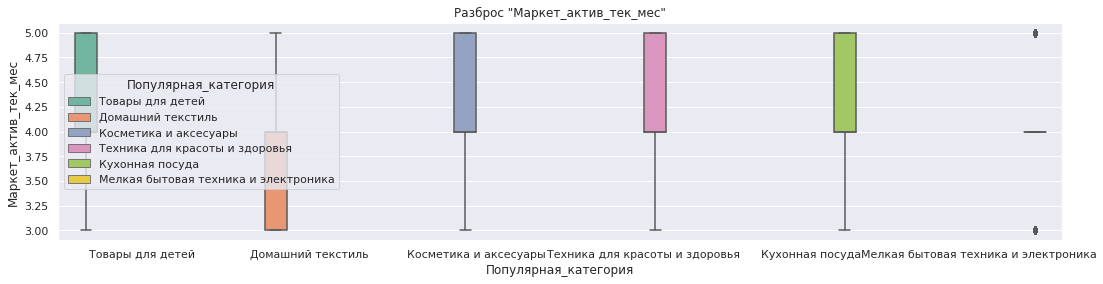

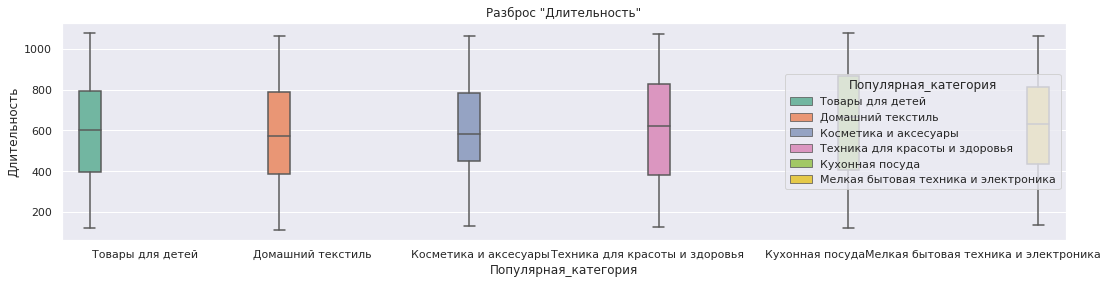

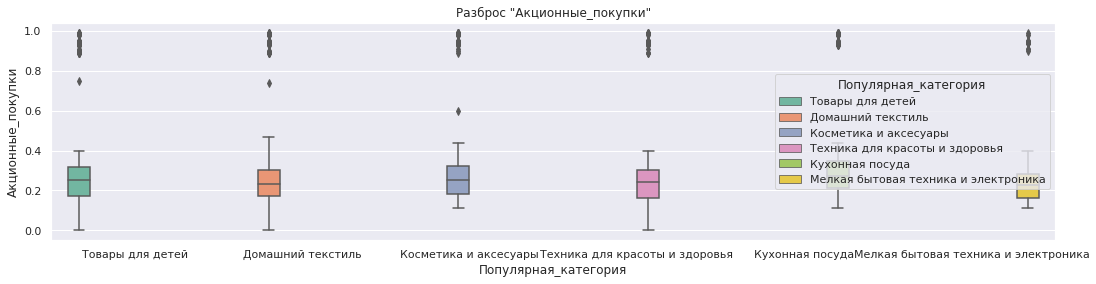

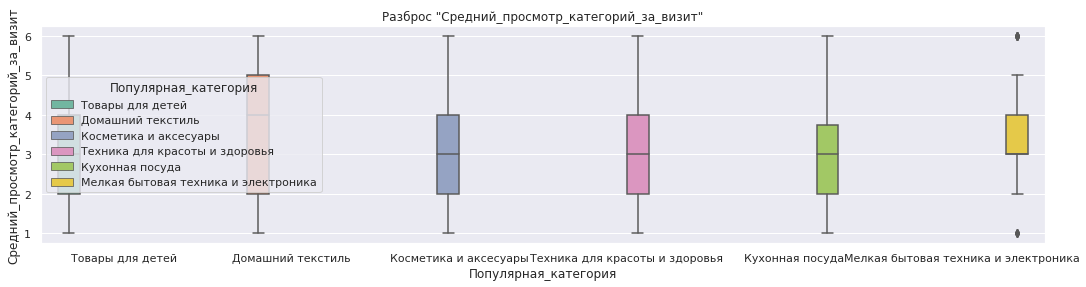

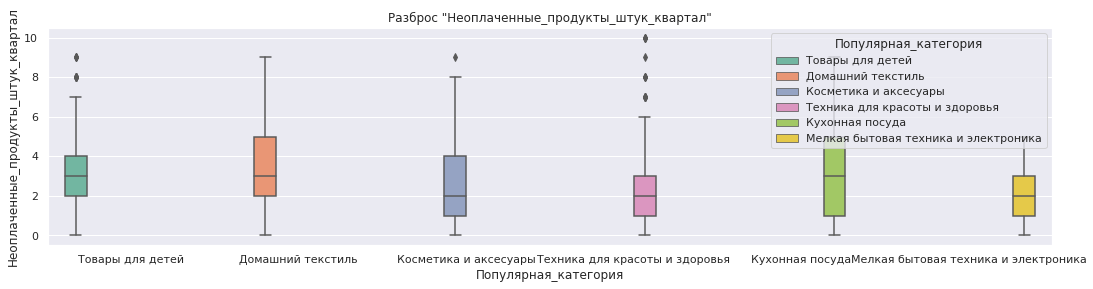

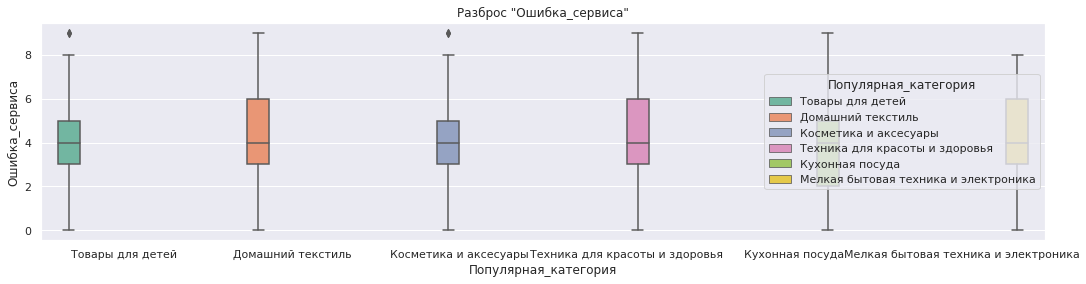

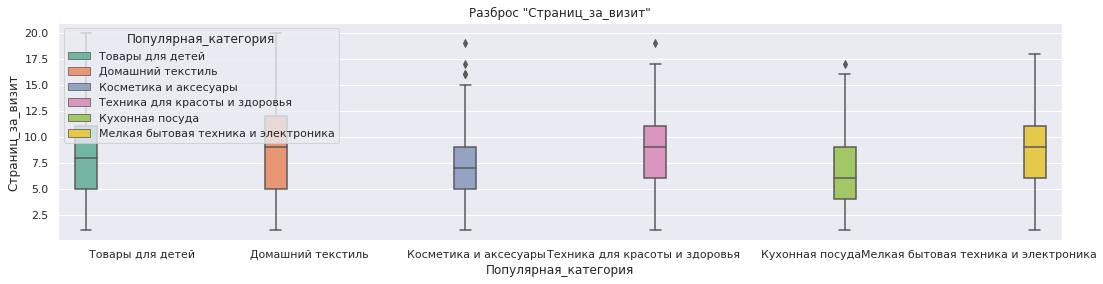

In [349]:
for j in f:  
    fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(18,4))
    sns.boxplot(data = df_1, y = j, x = 'Популярная_категория', hue = 'Популярная_категория', palette="Set2")
    plt.title('Разброс "{}"'.format(j))

<div class="alert alert-info">
   Распределение численных характеристик по категориальным показывает, что распределения и медианы признаков 'Акционные_покупки', 
'Средний_просмотр_категорий_за_визит', 'Ошибка сервиса' и 'Страниц_за_визит' примерно совпадают для всех значений категорий
'Тип сервиса' и 'Разрешить сообщать'. Признак 'Неоплаченные_продукты_штук_квартал' равномерно распределен между значениями
категории 'Тип сервиса', а в категории 'Разрешить сообщать' медиана данного признака для значения 'нет' равна 2, а для 
значения 'да' - 3. Медина распределения признака 'Длительность' заметно меньше при значениях 'стандарт' и 'нет', соответствующих
категорий 'Тип сервиса' и 'Разрешить сообщать'. Медиана признака 'Маркет_актив_тек_мес' в категории 'Тип сервиса' существенно
выше для значения 'стандарт', по сравнению со значением 'премиум'. В категории 'Разрешить сообщать' медиана данного признака 
существенно ниже для значения 'Нет', по сраавнению со значением 'Да'. Медиана признака 'Маркет_актив_6_мес' немного выше для 
значений 'стандарт' и 'нет', соответствующих категориям 'Тип сервиса' и 'Разрешить сообщать'.
    Признаки 'Маркет_актив_6_мес' и 'Ошибка сервиса' распределены примерно одинаково при всех значениях 'Популярная_категория'.
Медиана признака 'Маркет_актив_тек_мес' минимальна при значении 'Домашний текстиль'. Признак 'Длительность' имеет несколько 
более высокие медианные значения для значений 'Кухонная посуда' и 'Мелкая быт техника'. А среди распределений признака 
'Акционные_покупки' лидирует 'Кухонная посуда'. Больше всего категорий за визит просматривается при значениях популярной 
категории 'Домашний текстиль' и 'Мелкая быт техника'. Менее всего склонны оплачивать выбранные продукты покупатели с 
популярными категориями 'Домашний текстиль' и 'Кухонная посуда'. Наименьшее среднее число просматриваемых страниц сайта за визит 
(медиана около 7) имеют покупатели с любимыми категориями 'Косметика и аксесуары' и 'Кухонная посуда'. 
</div>

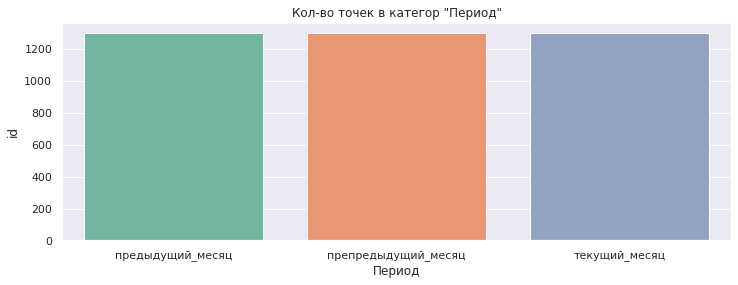

In [350]:
plt.subplots(figsize=(12,4))
sns.barplot(data = df_2.groupby('Период', as_index = False).agg({'id':'count'}), y = 'id', x = 'Период', palette="Set2")
plt.title('Кол-во точек в категор "{}"'.format('Период'));

<div class="alert alert-info">
   Количество точек в каждой категории признака 'Период' равно 1300, что соответствует числу клиентов. Таким образом, все 
клиенты совершали сделки в каждом из 3 последних месяцев.
</div>

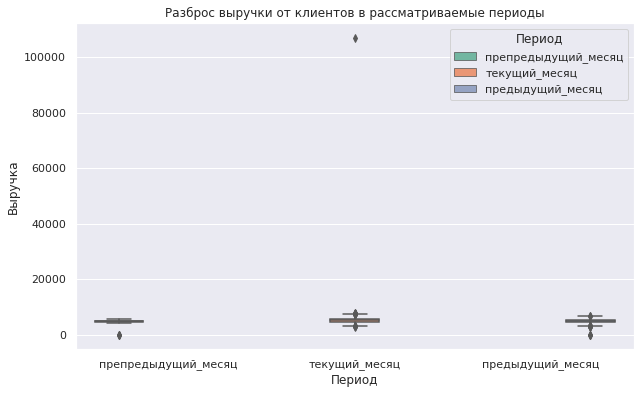

In [351]:
plt.subplots(figsize=(10,6))
sns.boxplot(data = df_2, y = 'Выручка', x = 'Период', hue = 'Период', palette="Set2")
plt.title('Разброс выручки от клиентов в рассматриваемые периоды');

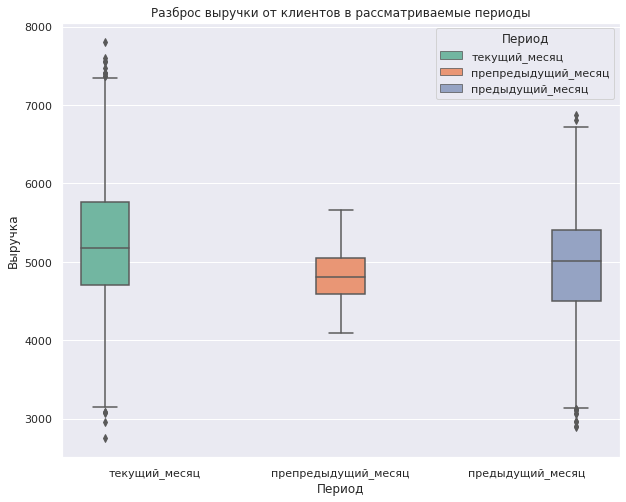

In [352]:
plt.subplots(figsize=(10,8))
sns.boxplot(data = df_2.query('Выручка < 10000 & Выручка > 0'), y = 'Выручка', x = 'Период', hue = 'Период', palette="Set2")
plt.title('Разброс выручки от клиентов в рассматриваемые периоды');

<div class="alert alert-info">
   В текущем месяце есть значение выручки от клиента более 10000, а также в текущем и предыдущем месяце были зафиксированы 
нулевые значения выручки у некоторых клиентов. Исключив эти крайние значения, получаем распределения вируски клиентов во 
всех периодах. Самая большая медианная выручка (более 5000) в текущем месяце, в предыдущем месяце медиана составляла около 5000,
а в препредыдущем - менее 5000. В текущем и предыдущем месяцах есть выбросы со значением выручки менее 3000 и более 7000. 
</div>

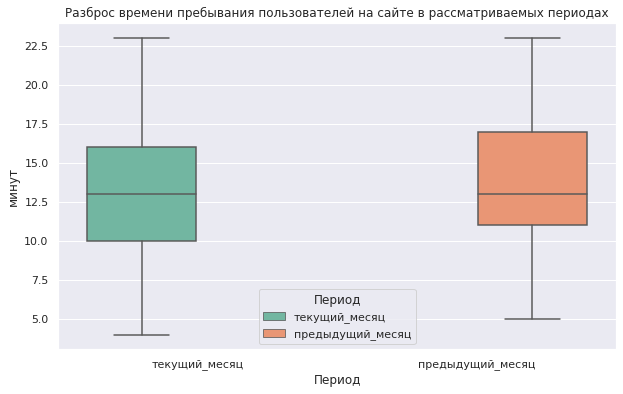

In [353]:
plt.subplots(figsize=(10,6))
sns.boxplot(data = df_3, y = 'минут', x = 'Период', hue = 'Период', palette="Set2")
plt.title('Разброс времени пребывания пользователей на сайте в рассматриваемых периодах');

<div class="alert alert-info">
   В течение текущего и предыдущего месяцев медианное время пребывания пользователя на сайте не изменяется и составляет около 
13 минут.
</div>

## Объединение таблиц
   <a id="start_3"></a>

In [354]:
df_2_1 = df_2.loc[df_2['Период'] == 'текущий_месяц']

In [355]:
df_2_1 = pd.DataFrame({'id':list(df_2_1['id']), 'тек_месяц_v':list(df_2_1['Выручка'])})

In [356]:
df_2_2 = df_2.loc[df_2['Период'] == 'предыдущий_месяц']
df_2_2 = pd.DataFrame({'id':list(df_2_2['id']), 'пред_месяц_v':list(df_2_2['Выручка'])})

In [357]:
df_2_3 = df_2.loc[df_2['Период'] == 'препредыдущий_месяц']
df_2_3 = pd.DataFrame({'id':list(df_2_3['id']), 'препред_месяц_v':list(df_2_3['Выручка'])})

In [358]:
df_2v = df_2.pivot_table(index = 'id', columns = 'Период', values = 'Выручка', aggfunc = 'mean')
df_2v[:5]

Период  предыдущий_месяц  препредыдущий_месяц  текущий_месяц
id                                                          
215348               0.0                  0.0         3293.1
215349            5216.0               4472.0         4971.6
215350            5457.5               4826.0         5058.4
215351            6158.0               4793.0         6610.4
215352            5807.5               4594.0         5872.5

<div class="alert alert-info">
    Понятно, спасибо, это быстрее. Использовал код с pivot_table для раворота таблицы df_2.
</div>

In [359]:
df_2_n = df_2_1.merge(df_2_2)

In [360]:
df_2_n = df_2_n.merge(df_2_3)
df_2_n[:5]

id  тек_месяц_v  пред_месяц_v  препред_месяц_v
0  215348       3293.1           0.0              0.0
1  215349       4971.6        5216.0           4472.0
2  215350       5058.4        5457.5           4826.0
3  215351       6610.4        6158.0           4793.0
4  215352       5872.5        5807.5           4594.0

In [361]:
df_3_1 = df_3.loc[df_3['Период'] == 'предыдyщий_месяц']
df_3_1 = pd.DataFrame({'id':list(df_3_1['id']), 'пред_месяц_m':list(df_3_1['минут'])})
df_3_2 = df_3.loc[df_3['Период'] == 'текущий_месяц']
df_3_2 = pd.DataFrame({'id':list(df_3_2['id']), 'тек_месяц_m':list(df_3_2['минут'])})
df_3_n = df_3_1.merge(df_3_2)
df_3_n[:5]

id  пред_месяц_m  тек_месяц_m
0  215348            13           14
1  215349            12           10
2  215350             8           13
3  215351            11           13
4  215352             8           11

In [362]:
df = df_1.merge(df_2_n, on = 'id')
df = df.merge(df_3_n, on = 'id')

In [363]:
df[:5]

id Покупательская активность Тип сервиса Разрешить сообщать  \
0  215348                 Снизилась     премиум                 да   
1  215349                 Снизилась     премиум                 да   
2  215350                 Снизилась    стандарт                нет   
3  215351                 Снизилась    стандарт                 да   
4  215352                 Снизилась    стандарт                нет   

   Маркет_актив_6_мес  Маркет_актив_тек_мес  Длительность  Акционные_покупки  \
0                 3.4                     5           121               0.00   
1                 4.4                     4           819               0.75   
2                 4.9                     3           539               0.14   
3                 3.2                     5           896               0.99   
4                 5.1                     3          1064               0.94   

  Популярная_категория  Средний_просмотр_категорий_за_визит  \
0     Товары для детей                                    6   
1     Товары для детей                                    4   
2    Домашний текстиль                                    5   
3     Товары для детей                                    5   
4     Товары для детей                                    3   

   Неоплаченные_продукты_штук_квартал  Ошибка_сервиса  Страниц_за_визит  \
0                                   2               1                 5   
1                                   4               2                 5   
2                                   2               1                 5   
3                                   0               6                 4   
4                                   2               3                 2   

   тек_месяц_v  пред_месяц_v  препред_месяц_v  пред_месяц_m  тек_месяц_m  
0       3293.1           0.0              0.0            13           14  
1       4971.6        5216.0           4472.0            12           10  
2       5058.4        5457.5           4826.0             8           13  
3       6610.4        6158.0           4793.0            11           13  
4       5872.5        5807.5           4594.0             8           11

In [364]:
t = df.columns

In [365]:
col = df.pop('Покупательская активность')
df.insert((len(t)-1), col.name, col)

In [366]:
df[:5]

id Тип сервиса Разрешить сообщать  Маркет_актив_6_мес  \
0  215348     премиум                 да                 3.4   
1  215349     премиум                 да                 4.4   
2  215350    стандарт                нет                 4.9   
3  215351    стандарт                 да                 3.2   
4  215352    стандарт                нет                 5.1   

   Маркет_актив_тек_мес  Длительность  Акционные_покупки Популярная_категория  \
0                     5           121               0.00     Товары для детей   
1                     4           819               0.75     Товары для детей   
2                     3           539               0.14    Домашний текстиль   
3                     5           896               0.99     Товары для детей   
4                     3          1064               0.94     Товары для детей   

   Средний_просмотр_категорий_за_визит  Неоплаченные_продукты_штук_квартал  \
0                                    6                                   2   
1                                    4                                   4   
2                                    5                                   2   
3                                    5                                   0   
4                                    3                                   2   

   Ошибка_сервиса  Страниц_за_визит  тек_месяц_v  пред_месяц_v  \
0               1                 5       3293.1           0.0   
1               2                 5       4971.6        5216.0   
2               1                 5       5058.4        5457.5   
3               6                 4       6610.4        6158.0   
4               3                 2       5872.5        5807.5   

   препред_месяц_v  пред_месяц_m  тек_месяц_m Покупательская активность  
0              0.0            13           14                 Снизилась  
1           4472.0            12           10                 Снизилась  
2           4826.0             8           13                 Снизилась  
3           4793.0            11           13                 Снизилась  
4           4594.0             8           11                 Снизилась

In [367]:
len(df)

1300

In [368]:
df.isna().sum()

id                                     0
Тип сервиса                            0
Разрешить сообщать                     0
Маркет_актив_6_мес                     0
Маркет_актив_тек_мес                   0
Длительность                           0
Акционные_покупки                      0
Популярная_категория                   0
Средний_просмотр_категорий_за_визит    0
Неоплаченные_продукты_штук_квартал     0
Ошибка_сервиса                         0
Страниц_за_визит                       0
тек_месяц_v                            0
пред_месяц_v                           0
препред_месяц_v                        0
пред_месяц_m                           0
тек_месяц_m                            0
Покупательская активность              0
dtype: int64

<div class="alert alert-info">
   Было выполнено объединение первых 3 таблиц (df_1, df_2, df_3) с основной информацией о клиентах в сводную таблицу df. При 
этом, в сводной таблице каждому значению столбцов 'Период' в исходных таблицах df_2 и df_3 соответствует отдельный столбец.
Поэтому количество столбцов в сводной таблице df увеличилось, по сравнению с таблицей df_1, на 5. Целевой признак 
'Покупательская активность' сделан крайним слева. 
</div>

In [369]:
df_t = df.copy()

## Корреляционный анализ
   <a id="start_4"></a>

In [370]:
df = df.query('тек_месяц_v < 10000')

In [371]:
df = df.query('тек_месяц_v > 0 & пред_месяц_v > 0 & препред_месяц_v > 0')

In [372]:
len(df)

1296

In [373]:
g = ['тек_месяц_v', 'пред_месяц_v', 'препред_месяц_v', 'пред_месяц_m', 'тек_месяц_m']
df_w = df.query('тек_месяц_v < 10000 & тек_месяц_v > 0')

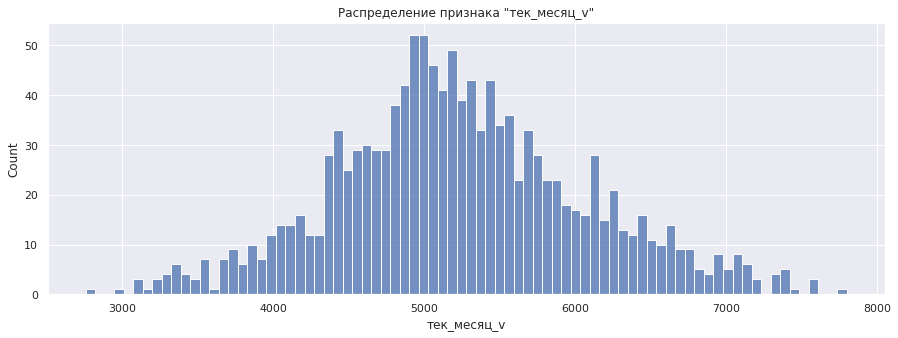

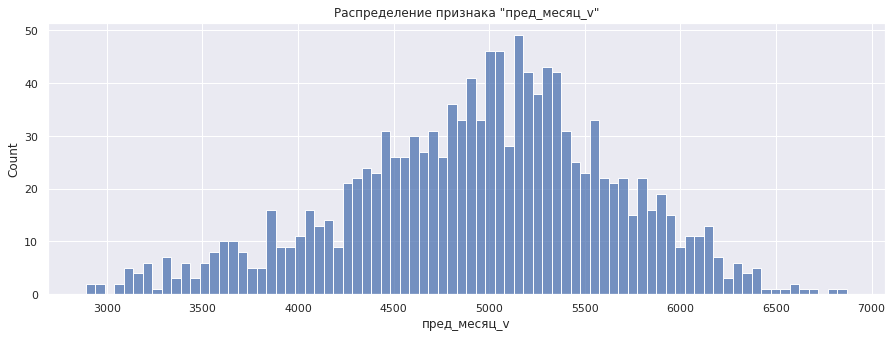

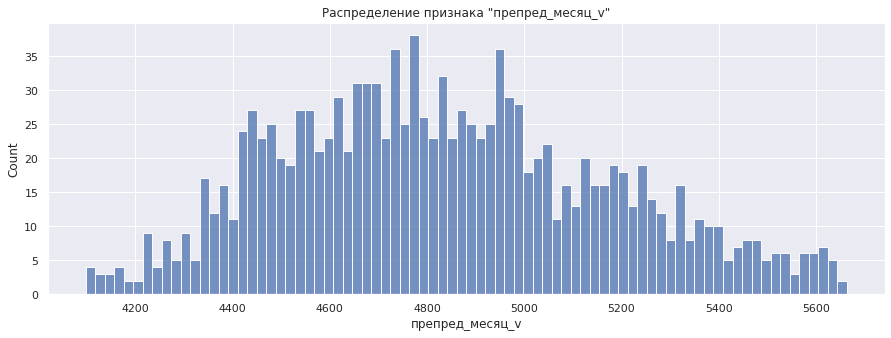

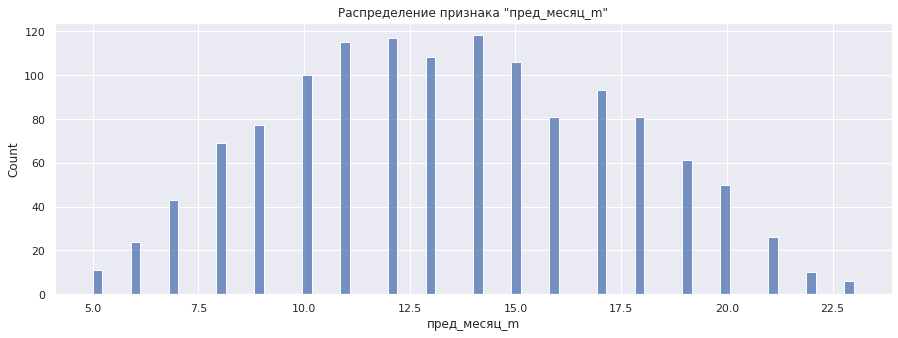

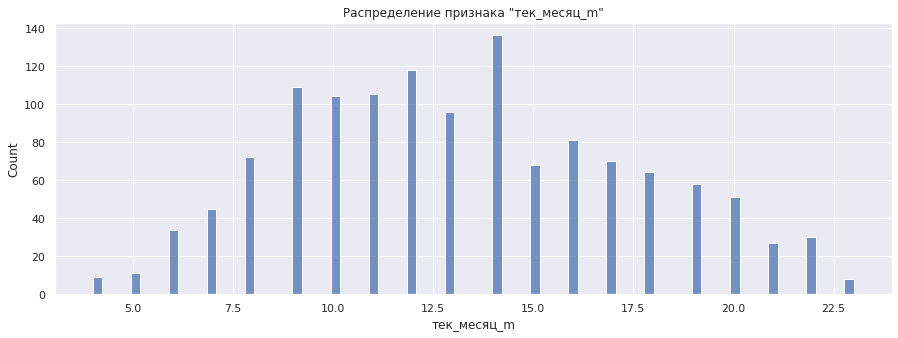

In [374]:
for i in g:
    fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(15,5))
    sns.histplot(data = df_w, x = df_w[i], bins=80, palette="Set2")
    plt.title('Распределение признака "{}"'.format(i))
    plt.show()

<div class="alert alert-info">
   Признаки помесячной выручки и помесячного количества минут пребывания на сайте распределены практически нормально, поэтому
степень корреляции между ними может быть оценена коэффициентом Пирсона. 
</div>

In [375]:
h = ['Маркет_актив_6_мес', 'Маркет_актив_тек_мес', 'Длительность', 'Акционные_покупки' , 'Средний_просмотр_категорий_за_визит' , 'Неоплаченные_продукты_штук_квартал', 'Ошибка_сервиса', 'Страниц_за_визит', 'тек_месяц_v', 'пред_месяц_v', 'препред_месяц_v', 'пред_месяц_m', 'тек_месяц_m']

In [376]:
phik_overview = df.drop('id', axis = 1).phik_matrix(interval_cols=h)
phik_overview.shape

(17, 17)

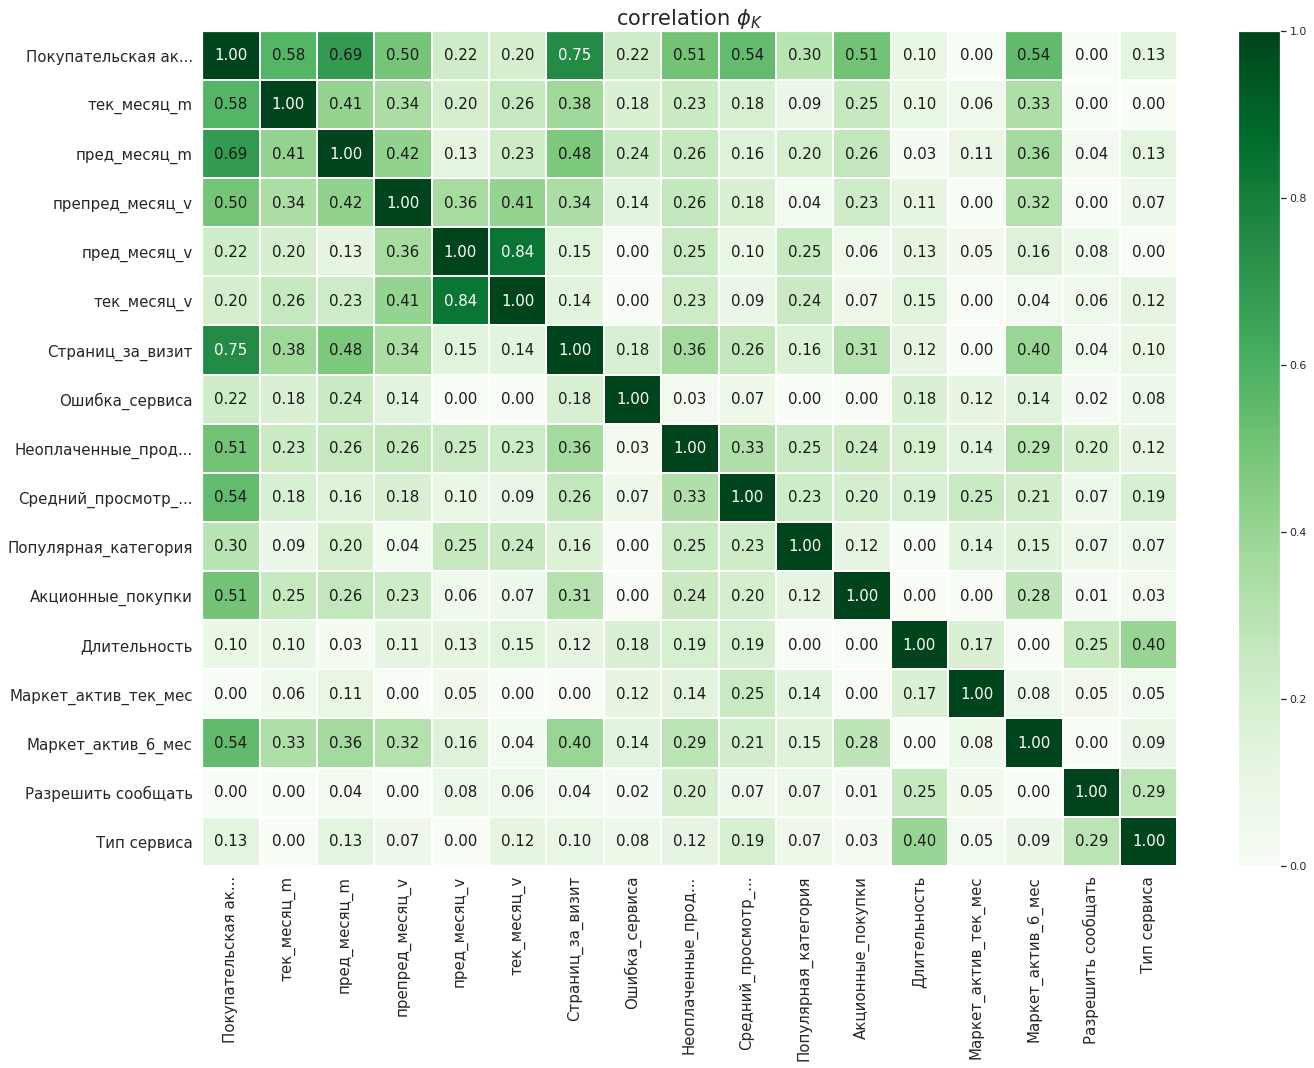

In [377]:
plot_correlation_matrix(
    phik_overview.values,
    x_labels=phik_overview.columns,
    y_labels=phik_overview.index,
    vmin=0, vmax=1, color_map='Greens',
    title=r'correlation $\phi_K$',
    fontsize_factor=1.5,
    figsize=(20, 15)
) 

<div class="alert alert-info">
     Построение phik-матрицы показывает отсутствие значений коэффициента Пирсона 0,9 и выше, то есть между признаками
нет избыточной взаимной корреляции и утечки целевого признака. Наиболее сильно скоррелированы с целью следующие признаки: 
'Страниц_за_визит' (0,75) и 'пред_месяц_m' (минуты на сайте в пред месяце) (0,68). Наибольшая взаимная корреляция наблюдается 
между следующими парами признаков: 'препред_месяц_v' (выручка в препред месяце) и 'Акционные_покупки' (0,75), 'пред_месяц_v'
(выручка в пред месяце) и 'Акционные_покупки' (0,64), 'пред_месяц_v' и 'препред_месяц_v' (0,73).
</div>

<div class="alert alert-info">
     Ряд численных параметров ('Маркет_актив_тек_меc', 'Длительность', 'тек_месяц_v') практически не имеют корреляции с целью и
будут бесполезны при использовании линейных моделей (логистической регрессии и SVC).
</div>

In [378]:
label_encoder = LabelEncoder()
df['Покупательская активность'] = label_encoder.fit_transform(df['Покупательская активность'])
df['Покупательская активность'].value_counts()

0    802
1    494
Name: Покупательская активность, dtype: int64

In [379]:
df = df.rename(columns = {'Покупательская активность':'Покупательская_активность'})

In [380]:
y, X = dmatrices('Покупательская_активность ~ Маркет_актив_6_мес+Маркет_актив_тек_мес+Длительность+Акционные_покупки+Средний_просмотр_категорий_за_визит+Неоплаченные_продукты_штук_квартал+Ошибка_сервиса+Страниц_за_визит+тек_месяц_v+пред_месяц_v+препред_месяц_v+пред_месяц_m+тек_месяц_m', data=df, return_type='dataframe')
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['Признаки'] = X.columns
vif

VIF                             Признаки
0   352.524089                            Intercept
1     1.220849                   Маркет_актив_6_мес
2     1.044578                 Маркет_актив_тек_мес
3     1.099452                         Длительность
4     1.185679                    Акционные_покупки
5     1.178602  Средний_просмотр_категорий_за_визит
6     1.198629   Неоплаченные_продукты_штук_квартал
7     1.079350                       Ошибка_сервиса
8     1.418264                     Страниц_за_визит
9     3.896191                          тек_месяц_v
10    4.263015                         пред_месяц_v
11    1.612075                      препред_месяц_v
12    1.526838                         пред_месяц_m
13    1.321172                          тек_месяц_m

<div class="alert alert-info">
    Степень взаимной корреляции количественных признаков проверена с помощью оценки для каждого признака коэффициента инфляции
дисперсии (VIF), который характеризует степень корреляции между данным признаком и другими признаками модели. Проверка 
показала, что коэффициенты VIF для всех факторов существенно меньше 5 (лежат в пределах 1 - 2), что означает умеренную
взаимнную корреляцию, которая недостаточно велика, чтобы повлиять на надежность модели.
</div>

In [381]:
h[0] = 'Покупательская_активность'

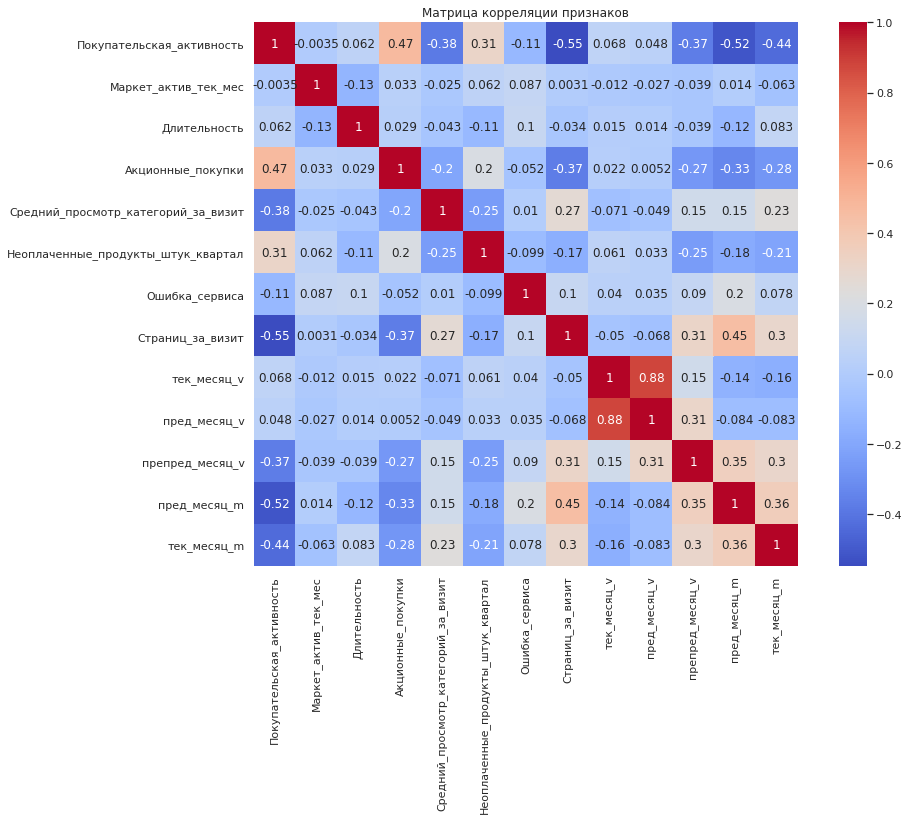

In [382]:
plt.figure(figsize = (15,10))
sns.heatmap(df[h].corr(method = 'spearman'), annot = True, square = True, cmap='coolwarm')
plt.title('Матрица корреляции признаков');

<div class="alert alert-info">
     При переходе к вычислению рангового коэффициента корреляции Спирмена, учитывающего отклонение от нормального распределения
непрерывных признаков, видно, что есть небольшая корреляция между целью и такими признаками, как 'Длительность' и 'тек_месяц_v'. 
Признак же 'Маркет_актив_тек_мес', как и в случае корреляции Пирсона, остается бесполезным для линейных моделей. 
</div>

In [383]:
df.shape

(1296, 18)

In [384]:
df = df.merge(df_4, how = 'left', on = 'id')

In [385]:
RANDOM_STATE = 42
TEST_SIZE = 0.25
X_train, X_test, y_train, y_test = train_test_split(
    df.drop(['id','Покупательская_активность'], axis=1),
    df['Покупательская_активность'],
    test_size = TEST_SIZE, 
    random_state = RANDOM_STATE,
    stratify = df['Покупательская_активность'])

In [386]:
encome_train = X_train[['Прибыль']]
encome_test = X_test[['Прибыль']]

In [387]:
X_train = X_train.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)


In [388]:
X_train = X_train.drop('Прибыль', axis = 1)
X_test = X_test.drop('Прибыль', axis = 1)

In [389]:
s = ['Маркет_актив_тек_мес', 'Длительность', 'тек_месяц_v']
X_train_s = X_train[s]
X_test_s = X_test[s]
poly = PolynomialFeatures(2)
X_train_s = poly.fit_transform(X_train_s)
X_test_s = poly.fit_transform(X_test_s)

In [390]:
X_train_s = pd.DataFrame(X_train_s, columns = poly.get_feature_names_out())
X_test_s = pd.DataFrame(X_test_s, columns = poly.get_feature_names_out())
X_train_s = X_train_s.T.drop_duplicates().T
X_test_s = X_test_s.T.drop_duplicates().T
X_train_s = X_train_s[['Маркет_актив_тек_мес^2', 'Маркет_актив_тек_мес Длительность', 'Маркет_актив_тек_мес тек_месяц_v', 'Длительность^2', 'Длительность тек_месяц_v', 'тек_месяц_v^2']]
X_test_s = X_test_s[['Маркет_актив_тек_мес^2', 'Маркет_актив_тек_мес Длительность', 'Маркет_актив_тек_мес тек_месяц_v', 'Длительность^2', 'Длительность тек_месяц_v', 'тек_месяц_v^2']]
X_train_s['Покупательская_активность'] = list(y_train)
X_train_s[:5]

Маркет_актив_тек_мес^2  Маркет_актив_тек_мес Длительность  \
0                    16.0                             2040.0   
1                    16.0                              796.0   
2                    25.0                             4985.0   
3                    16.0                             1368.0   
4                    25.0                             4365.0   

   Маркет_актив_тек_мес тек_месяц_v  Длительность^2  Длительность тек_месяц_v  \
0                           24056.8        260100.0                 3067242.0   
1                           15158.8         39601.0                  754150.3   
2                           18992.0        994009.0                 3787004.8   
3                           19064.8        116964.0                 1630040.4   
4                           23000.0        762129.0                 4015800.0   

   тек_месяц_v^2  Покупательская_активность  
0    36170601.64                          0  
1    14361826.09                          1  
2    14427842.56                          0  
3    22716662.44                          0  
4    21160000.00                          1

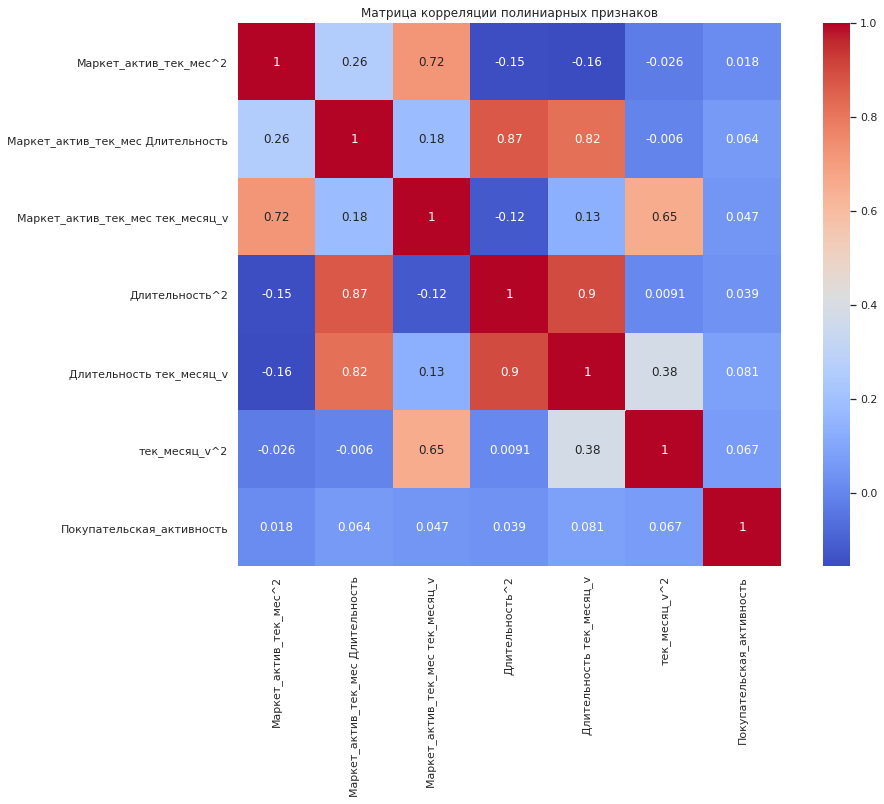

In [391]:
plt.figure(figsize = (15,10))
sns.heatmap(X_train_s.corr(), annot = True, square = True, cmap='coolwarm')
plt.title('Матрица корреляции полиниарных признаков');

<div class="alert alert-info">
     После полиномиального преобразования наиболее слабо влияющих на цель признаков ('Маркет_актив_тек_меc', 'Длительность', 
'тек_месяц_v') новые признаки хоть и очень слабо, но влияют на цель даже на уровне корреляции Пирсона. Не удалось только 
улучшить влияние на цель признака 'Маркет_актив_тек_мес'. Некоторые их этих новых признаков (x0x1, x1^2, x2^2) могут быть 
использованы вместо старых в для разработки моделей.
</div>

In [392]:
s1 = ['Маркет_актив_тек_мес тек_месяц_v', 'Длительность тек_месяц_v', 'Покупательская_активность']
s2 = ['Маркет_актив_тек_мес тек_месяц_v', 'Длительность тек_месяц_v']

In [393]:
X_train_s = X_train_s.drop(s1, axis = 1)
X_test_s = X_test_s.drop(s2, axis = 1)

In [394]:
X_train = pd.concat([X_train, X_train_s], axis = 1)
X_test = pd.concat([X_test, X_test_s], axis = 1)

## Использование пайплайнов
   <a id="start_5"></a>

In [395]:
ohe_columns = ['Разрешить сообщать', 'Популярная_категория']
ord_columns = ['Тип сервиса']
num_columns = ['Маркет_актив_6_мес', 'Маркет_актив_тек_мес^2', 'Длительность^2', 'Акционные_покупки' , 'Средний_просмотр_категорий_за_визит' , 'Неоплаченные_продукты_штук_квартал', 'Ошибка_сервиса', 'Страниц_за_визит', 'тек_месяц_v^2', 'пред_месяц_v', 'препред_месяц_v', 'пред_месяц_m', 'тек_месяц_m', 'Маркет_актив_тек_мес Длительность']

In [396]:
ohe_pipe = Pipeline(
    [('simpleImputer_ohe', SimpleImputer(missing_values=np.nan, strategy='most_frequent')),
     ('ohe', OneHotEncoder(drop='first'))
    ]
    )

In [397]:
ord_pipe = Pipeline(
    [('simpleImputer_before_ord', SimpleImputer(missing_values=np.nan, strategy='most_frequent')),
     ('ord',  OrdinalEncoder(
                categories=[
                    ['стандарт', 'премиум']
                ], 
                handle_unknown='use_encoded_value', unknown_value=np.nan
            )
        ),
     ('simpleImputer_after_ord', SimpleImputer(missing_values=np.nan, strategy='most_frequent'))
    ]
)

In [398]:
data_preprocessor = ColumnTransformer(
    [
     ('ord', ord_pipe, ord_columns),
     ('ohe', ohe_pipe, ohe_columns),
     ('num', MinMaxScaler(), num_columns)
    ], 
    remainder='passthrough'
)

In [399]:
pipe_final = Pipeline([
    ('preprocessor', data_preprocessor),
    ('models', DecisionTreeClassifier(random_state=RANDOM_STATE))
])

In [400]:
param_grid = [
    {
        'models': [DecisionTreeClassifier(random_state=RANDOM_STATE)],
        'models__max_depth': range(2,10),
        'models__max_features': range(2,10),
        'models__min_samples_leaf': range(1, 10),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']  
    },
    
    {
        'models': [KNeighborsClassifier()],
        'models__n_neighbors': range(2,10),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']   
    },

    {
        'models': [LogisticRegression(
            random_state=RANDOM_STATE, 
            solver='liblinear', 
            penalty='l1'
        )],
        'models__C': range(1,10),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']  
    },
    
     {
        'models': [SVC(random_state=RANDOM_STATE, probability= True)],
        'models__kernel': ['rbf', 'sigmoid'],
        'models__C': range(1,10),
        'models__gamma': range(1,10),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']  
    }
]

randomized_search = RandomizedSearchCV(
    pipe_final, 
    param_grid, 
    cv=5,
    scoring='roc_auc',
    random_state=RANDOM_STATE,
    n_jobs=-1
)

In [401]:
randomized_search.fit(X_train, y_train)

randomized_search.best_estimator_

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ord',
                                                  Pipeline(steps=[('simpleImputer_before_ord',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ord',
                                                                   OrdinalEncoder(categories=[['стандарт',
                                                                                               'премиум']],
                                                                                  handle_unknown='use_encoded_value',
                                                                                  unknown_value=nan)),
                                                                  ('simpleImputer_after_ord',
                                                                   SimpleImputer(strategy='most_f...
                                                   'Длительность^2',
                                                   'Акционные_покупки',
                                                   'Средний_просмотр_категорий_за_визит',
                                                   'Неоплаченные_продукты_штук_квартал',
                                                   'Ошибка_сервиса',
                                                   'Страниц_за_визит',
                                                   'тек_месяц_v^2',
                                                   'пред_месяц_v',
                                                   'препред_месяц_v',
                                                   'пред_месяц_m',
                                                   'тек_месяц_m',
                                                   'Маркет_актив_тек_мес '
                                                   'Длительность'])])),
                ('models',
                 DecisionTreeClassifier(max_depth=9, max_features=6,
                                        min_samples_leaf=7, random_state=42))])

In [402]:
randomized_search.best_score_

0.8580288747425111

In [403]:
pd.DataFrame(randomized_search.cv_results_)[
    ['rank_test_score', 'param_models', 'mean_test_score','params']
    ].sort_values('rank_test_score')[:10]

rank_test_score                             param_models  mean_test_score  \
4                1  DecisionTreeClassifier(random_state=42)         0.858029   
7                2  DecisionTreeClassifier(random_state=42)         0.851711   
1                3  DecisionTreeClassifier(random_state=42)         0.845379   
2                4  DecisionTreeClassifier(random_state=42)         0.842666   
9                5  DecisionTreeClassifier(random_state=42)         0.842246   
0                6  DecisionTreeClassifier(random_state=42)         0.836468   
8                7  DecisionTreeClassifier(random_state=42)         0.822440   
3                8  DecisionTreeClassifier(random_state=42)         0.797667   
6                9  DecisionTreeClassifier(random_state=42)         0.750175   
5               10   SVC(probability=True, random_state=42)         0.523138   

                                                                                                                                                                         params  
4  {'preprocessor__num': StandardScaler(), 'models__min_samples_leaf': 7, 'models__max_features': 6, 'models__max_depth': 9, 'models': DecisionTreeClassifier(random_state=42)}  
7     {'preprocessor__num': 'passthrough', 'models__min_samples_leaf': 8, 'models__max_features': 7, 'models__max_depth': 7, 'models': DecisionTreeClassifier(random_state=42)}  
1    {'preprocessor__num': MinMaxScaler(), 'models__min_samples_leaf': 9, 'models__max_features': 9, 'models__max_depth': 7, 'models': DecisionTreeClassifier(random_state=42)}  
2     {'preprocessor__num': 'passthrough', 'models__min_samples_leaf': 8, 'models__max_features': 3, 'models__max_depth': 7, 'models': DecisionTreeClassifier(random_state=42)}  
9  {'preprocessor__num': StandardScaler(), 'models__min_samples_leaf': 9, 'models__max_features': 8, 'models__max_depth': 8, 'models': DecisionTreeClassifier(random_state=42)}  
0     {'preprocessor__num': 'passthrough', 'models__min_samples_leaf': 8, 'models__max_features': 9, 'models__max_depth': 5, 'models': DecisionTreeClassifier(random_state=42)}  
8  {'preprocessor__num': StandardScaler(), 'models__min_samples_leaf': 3, 'models__max_features': 6, 'models__max_depth': 3, 'models': DecisionTreeClassifier(random_state=42)}  
3  {'preprocessor__num': StandardScaler(), 'models__min_samples_leaf': 6, 'models__max_features': 2, 'models__max_depth': 7, 'models': DecisionTreeClassifier(random_state=42)}  
6    {'preprocessor__num': MinMaxScaler(), 'models__min_samples_leaf': 3, 'models__max_features': 3, 'models__max_depth': 4, 'models': DecisionTreeClassifier(random_state=42)}  
5                        {'preprocessor__num': StandardScaler(), 'models__kernel': 'rbf', 'models__gamma': 3, 'models__C': 8, 'models': SVC(probability=True, random_state=42)}

In [404]:
pd.set_option('display.max_colwidth', None)
pd.DataFrame(randomized_search.cv_results_)[
    ['rank_test_score', 'params']
    ].sort_values('rank_test_score')[:10]

rank_test_score  \
4                1   
7                2   
1                3   
2                4   
9                5   
0                6   
8                7   
3                8   
6                9   
5               10   

                                                                                                                                                                         params  
4  {'preprocessor__num': StandardScaler(), 'models__min_samples_leaf': 7, 'models__max_features': 6, 'models__max_depth': 9, 'models': DecisionTreeClassifier(random_state=42)}  
7     {'preprocessor__num': 'passthrough', 'models__min_samples_leaf': 8, 'models__max_features': 7, 'models__max_depth': 7, 'models': DecisionTreeClassifier(random_state=42)}  
1    {'preprocessor__num': MinMaxScaler(), 'models__min_samples_leaf': 9, 'models__max_features': 9, 'models__max_depth': 7, 'models': DecisionTreeClassifier(random_state=42)}  
2     {'preprocessor__num': 'passthrough', 'models__min_samples_leaf': 8, 'models__max_features': 3, 'models__max_depth': 7, 'models': DecisionTreeClassifier(random_state=42)}  
9  {'preprocessor__num': StandardScaler(), 'models__min_samples_leaf': 9, 'models__max_features': 8, 'models__max_depth': 8, 'models': DecisionTreeClassifier(random_state=42)}  
0     {'preprocessor__num': 'passthrough', 'models__min_samples_leaf': 8, 'models__max_features': 9, 'models__max_depth': 5, 'models': DecisionTreeClassifier(random_state=42)}  
8  {'preprocessor__num': StandardScaler(), 'models__min_samples_leaf': 3, 'models__max_features': 6, 'models__max_depth': 3, 'models': DecisionTreeClassifier(random_state=42)}  
3  {'preprocessor__num': StandardScaler(), 'models__min_samples_leaf': 6, 'models__max_features': 2, 'models__max_depth': 7, 'models': DecisionTreeClassifier(random_state=42)}  
6    {'preprocessor__num': MinMaxScaler(), 'models__min_samples_leaf': 3, 'models__max_features': 3, 'models__max_depth': 4, 'models': DecisionTreeClassifier(random_state=42)}  
5                        {'preprocessor__num': StandardScaler(), 'models__kernel': 'rbf', 'models__gamma': 3, 'models__C': 8, 'models': SVC(probability=True, random_state=42)}

<div class="alert alert-info">
     Для нахождения лучшей модели был составлен словарь из 4 моделей, каждая из которых включала один или несколько варьируемых
гиперпараметров. Так как количество вариантов сочетаний гиперпараметров велико (несколько тысяч), то был выбран метод случайного
поиска с кросс-валидацией cv = 5 (randomized_search()). В качестве основной метрики была выбрана 'roc-auc'. Это связано с тем, 
что в целевом поле ('Покупательская_активность') наблюдается серьезный диспаланс классов: количество объектов с признаком
'прежний уровень' в 2 раза больше, чем объектов 'снизилась'. Метрика 'roc_auc' наиболее устойчива к дисбалансу целевого класса, 
по сравнению с встроенной метрикой 'accuracy'.
     Наилучшей моделью в рамках заданных диапазонов гиперпараметров показала себя DecisionTreeClassifier(max_depth=7, 
max_features=6, min_samples_leaf=7) и StandardScaler(). Величина метрики 'roc-auc' на кросс-валидации составляет 0,86. 
    Первые 9 места лучших моделей занимают деревья, а на 10 месте находится модель SVС, метрика которой уже весьма низкая 
roc_auc = 0,52.
</div>

In [405]:
y_test_pred =  randomized_search.predict_proba(X_test)[:,1]
roc_auc_score(y_test, y_test_pred)

0.8656716417910448

<div class="alert alert-info">
    На тестовой выборке метрика 'roc_auc' лишь немного ниже, чем на трейновой и составляет 0,865. Это говорит о том, что
модель вполне адекватна и практически нет переобучения (разброса).
</div>

## Анализ важности признаков
   <a id="start_6"></a>

In [406]:
model = DecisionTreeClassifier(random_state=RANDOM_STATE, max_depth=9, max_features=6, min_samples_leaf=7)

In [407]:
encoder = OneHotEncoder(drop='first', sparse_output=False)
X_train_ohe = encoder.fit_transform(X_train[ohe_columns])
X_test_ohe = encoder.transform(X_test[ohe_columns])

encoder_col_names = encoder.get_feature_names_out()
X_train_ohe = pd.DataFrame(X_train_ohe, columns = encoder_col_names)
X_test_ohe = pd.DataFrame(X_test_ohe, columns = encoder_col_names)

In [408]:
ordinal_encoder = OrdinalEncoder(
    handle_unknown='use_encoded_value',
    unknown_value=np.nan)
X_train_ord = ordinal_encoder.fit_transform(X_train[ord_columns])
X_test_ord = ordinal_encoder.transform(X_test[ord_columns])
imputer = SimpleImputer(
    missing_values=np.nan, 
    strategy='most_frequent'
) 
imputer.fit(X_train_ord) 
X_test_ord = imputer.transform(X_test_ord)

In [409]:
X_train_ord = pd.DataFrame(X_train_ord, columns=ord_columns)
X_test_ord = pd.DataFrame(X_test_ord, columns=ord_columns)

In [410]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train[num_columns])
X_test_scaled = scaler.transform(X_test[num_columns])

X_train_scaled = pd.DataFrame(X_train_scaled, columns=num_columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=num_columns)

In [411]:
X_train_n = pd.concat([X_train_ohe, X_train_ord, X_train_scaled], axis = 1)
X_test_n = pd.concat([X_test_ohe, X_test_ord, X_test_scaled], axis = 1)

In [412]:
model_m = randomized_search.best_estimator_.named_steps['models']

In [413]:
model_m.feature_importances_

array([0.00172508, 0.        , 0.        , 0.        , 0.0048906 ,
       0.00060697, 0.        , 0.023648  , 0.00040503, 0.01468679,
       0.38819755, 0.00412617, 0.1196334 , 0.00413029, 0.21865835,
       0.01400112, 0.02384361, 0.02433647, 0.10978783, 0.02154496,
       0.00664372, 0.        , 0.01770017, 0.00143389])

<div class="alert alert-info">
    Понятно, спасибо. Лучшая модель из пайплайна использована для нахождения коэффициентов значимости.
</div>

In [414]:
model.fit(X_train_n, y_train)

DecisionTreeClassifier(max_depth=9, max_features=6, min_samples_leaf=7,
                       random_state=42)

In [415]:
roc_auc_score(y_test, model.predict_proba(X_test_n)[:,1])

0.8820733729725359

In [416]:
feature_importance = pd.DataFrame({'Feature': X_train_n.columns, 'Importance': np.abs(model.feature_importances_)})
feature_importance = feature_importance.sort_values(by = 'Importance', ascending = True)

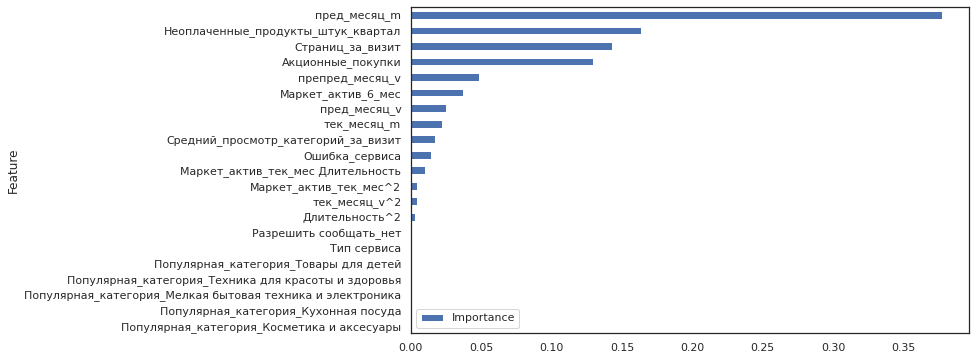

In [417]:
sns.set_style('white')
feature_importance.plot(x='Feature', y='Importance', kind='barh', figsize=(10, 6));

<div class="alert alert-info">
    По версии функции feature_importances_, встроенной в дерево решений, наибольшее влияние на модель оказывает количество минут,
проведенное на сайте в пред месяц (0,4). Далее идут 'Акционные покупки' (0,25), число страниц, просматриваемых за визит 
'Страниц_за_визит' (0,1), количество неоплаченных продуктов ('Неоплаченные_продукты_штук_квартал') (0,8) и выручка за позапрошлый
месяц 'препред_мепсяц_v' (0,9). Значимость признаков примерно соответствует матрице корреляции данных признаков с целью.
    Восемь признаков, согласно feature_importances_, вообще не оказывают влияние на модель. Среди них 'Тип сервиса', а также 
признаки товара ('Кухонная посуда' и пр.). 
</div>

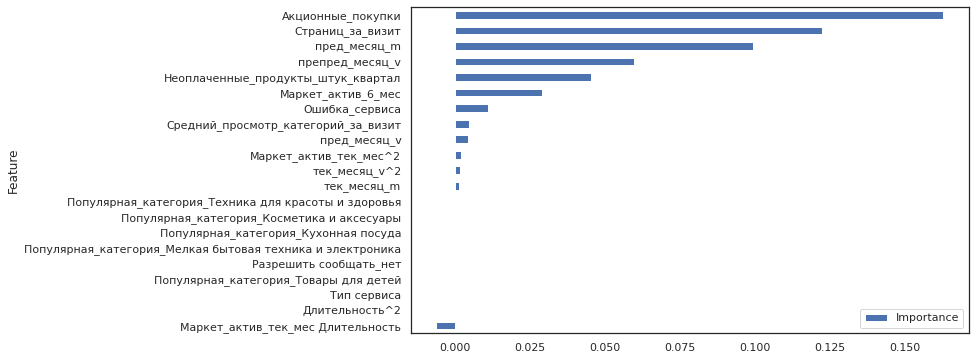

In [418]:
def score_(model, X, y):
    y_pred = model.predict(X)
    score = f1_score(y, y_pred)
    return score

perm_list = permutation_importance(model, X_test_n, y_test, scoring=score_)

feature_importance = pd.DataFrame({'Feature': X_test_n.columns, 'Importance': perm_list['importances_mean']})
feature_importance = feature_importance.sort_values('Importance', ascending=True)
sns.set_style('white')
feature_importance.plot(x='Feature', y='Importance', kind='barh', figsize=(10, 6)); 

<div class="alert alert-info">
    Анализ вклада признаков в модель по версии метода permutation_importance(), измеряющего качество модели после поочередной
рэндомизации признаков, показывает тенденцию близкую к методу feateure_impotances_ (только места лидеров поменялись). 
В данном случае наиболее влиятельный признак 'Акционные покупки' (0,16), на втором месте - выручка за пред месяц 'пред_месяц_v' 
(0,12), далее идет количество минут на сайте в пред месяц 'пред_месяц_m' (0,10) и 'страниц_за_визит' (0,08). 13 признаков не 
влияют на результат - это признаки товара ('Кухонная посуда' и пр.), а также 'Тип сервиса' и 'Разрешить_сообщать'.
</div>

In [419]:
selector = SelectKBest(mutual_info_classif, k=8)
selector.fit(X_train_n, y_train)
features_names = selector.get_feature_names_out()

In [420]:
X_train_new = X_train_n[list(features_names)]
X_test_new = X_test_n[list(features_names)]

In [421]:
model.fit(X_train_new, y_train)

DecisionTreeClassifier(max_depth=9, max_features=6, min_samples_leaf=7,
                       random_state=42)

In [422]:
roc_auc_score(y_test, model.predict_proba(X_test_new)[:,1])

0.8770173522630748

<div class="alert alert-info">
    Оба метода определения степени важности признаков (feature_importances_ и permutation_importance()), связанные с моделью,
показывают, что датафрейм содержит много лишних признаков, не оказывающих на нее влияние. Методом SelectKBest() было отобрано
8 наиболее важных признаков. Это позволило повысить качество модели, увеличив метрику roc_auc до 0,9. 
</div>

In [423]:
explainer = shap.KernelExplainer(model.predict_proba, X_train_new)
shap_values = explainer(X_test_new)

Using 972 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


  0%|          | 0/324 [00:00<?, ?it/s]

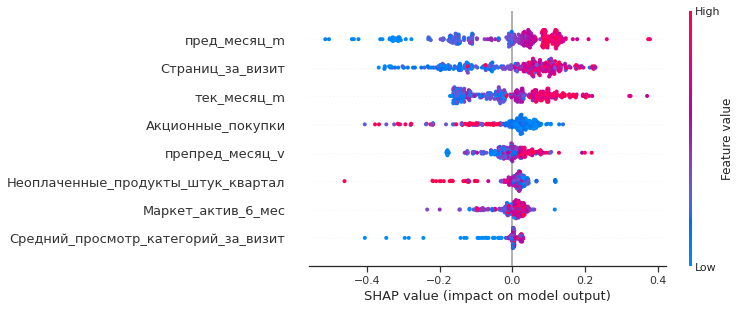

In [424]:
shap.plots.beeswarm(shap_values[..., 0], max_display=9)

<div class="alert alert-info">
    SHAP-диаграмма влияния признаков на предсказания модели показывает, что наиболее влиятелен фактор 'пред_месяц_m', 
повышение которого способствует понижению покупательской активности (класс 1). Аналогично действуют следующие по значимости 
показатели 'страниц за визит' и 'тек_месяц_m'. С ростом следующего по важности фактора доли акционных покупок 
'Акционные_покупки', наоборот, увеличивается вероятность сохранения покупательской активности (класс 0). Рост остальных 
факторов, так как 'Маркет_актив_6_мес', 'препред_месяц_v', 'Средний_просмотор_категорий_за_визит' скорее 
способствует понижению покупательской активности. 
   В итоге, сохранение покупательской активности осуществляется, в основном, за счет акционных покупок. Действия же, которые
связаны с увеличением срока поиска товаров на сайте (количество минут, проведенных на сайте и число просматриваемых страниц и 
категорий)способствуют понижению активности покупателей. Также покупательский настрой снижает маркетинговая активность магазина. 
Таким образом, для сохранения покупательской активности необходимо увеличивать количество акций и совершенствовать их условия, а
также улучшать новигацию по сайту, чтобы покупатели тратили меньше времени на поиск товаров. 
</div>

## Сегментация покупателей
   <a id="start_7"></a>

In [425]:
y_pred_proba =  randomized_search.predict_proba(X_test)[:,1]
X_test['Вероятность'] = y_pred_proba
X_test['Прибыль'] = encome_test['Прибыль']
X_test[:5]

Тип сервиса Разрешить сообщать  Маркет_актив_6_мес  Маркет_актив_тек_мес  \
0    стандарт                 да                 4.1                     4   
1     премиум                нет                 1.4                     4   
2     премиум                 да                 3.3                     4   
3     премиум                 да                 3.5                     3   
4    стандарт                нет                 5.5                     4   

   Длительность  Акционные_покупки                  Популярная_категория  \
0           606               0.15        Техника для красоты и здоровья   
1           684               0.94                      Товары для детей   
2           488               0.13                     Домашний текстиль   
3          1057               0.35                     Домашний текстиль   
4           147               0.99  Мелкая бытовая техника и электроника   

   Средний_просмотр_категорий_за_визит  Неоплаченные_продукты_штук_квартал  \
0                                    6                                   1   
1                                    3                                   6   
2                                    4                                   2   
3                                    4                                   3   
4                                    1                                   2   

   Ошибка_сервиса  ...  пред_месяц_v  препред_месяц_v  пред_месяц_m  \
0               4  ...        3973.0           4912.0            16   
1               1  ...        3548.0           4656.0            11   
2               8  ...        5444.0           4565.0            20   
3               5  ...        6604.0           4993.0             9   
4               3  ...        5090.0           4451.0            15   

   тек_месяц_m  Маркет_актив_тек_мес^2  Маркет_актив_тек_мес Длительность  \
0           17                    16.0                             2424.0   
1            9                    16.0                             2736.0   
2           11                    16.0                             1952.0   
3            9                     9.0                             3171.0   
4           18                    16.0                              588.0   

   Длительность^2  тек_месяц_v^2  Вероятность  Прибыль  
0        367236.0    10818836.64     0.428571     4.16  
1        467856.0    17394738.49     1.000000      NaN  
2        238144.0    40142361.64     0.000000     4.87  
3       1117249.0    45680025.69     0.900000      NaN  
4         21609.0    33336766.44     0.538462     3.95  

[5 rows x 22 columns]

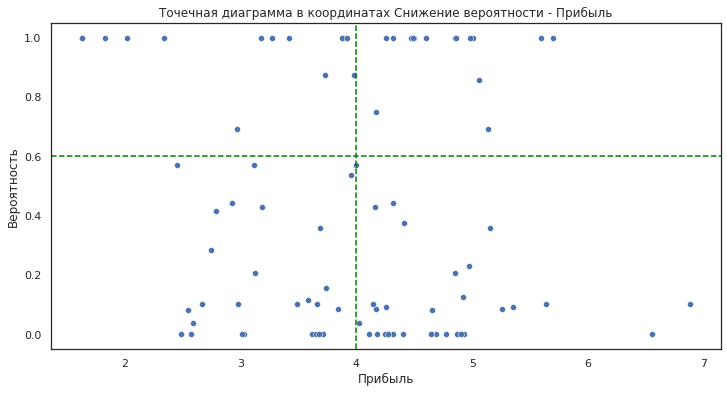

In [426]:
plt.figure(figsize=(12,6))
sns.scatterplot(x = 'Прибыль', y = 'Вероятность', data = X_test)
plt.title('Точечная диаграмма в координатах Снижение вероятности - Прибыль')
plt.axvline(x = 4, color = 'green', linestyle='--')
plt.axhline(y = 0.6, color = 'green', linestyle='--')

<div class="alert alert-info">
    Для изучения выбран сегмент покупателей с достаточно высокой вероятностью снижения покупательской 
активности (порог вероятности выше 0,6), но приносящие относительно высокую прибыль (порог прибыли 
выше 4).  
</div>

In [427]:
X_seg = X_test.loc[(X_test['Прибыль'] >= 4) & (X_test['Вероятность'] >= 0.6)]
X_rest = X_test.loc[(X_test['Прибыль'] < 4) & (X_test['Вероятность'] < 0.6)]

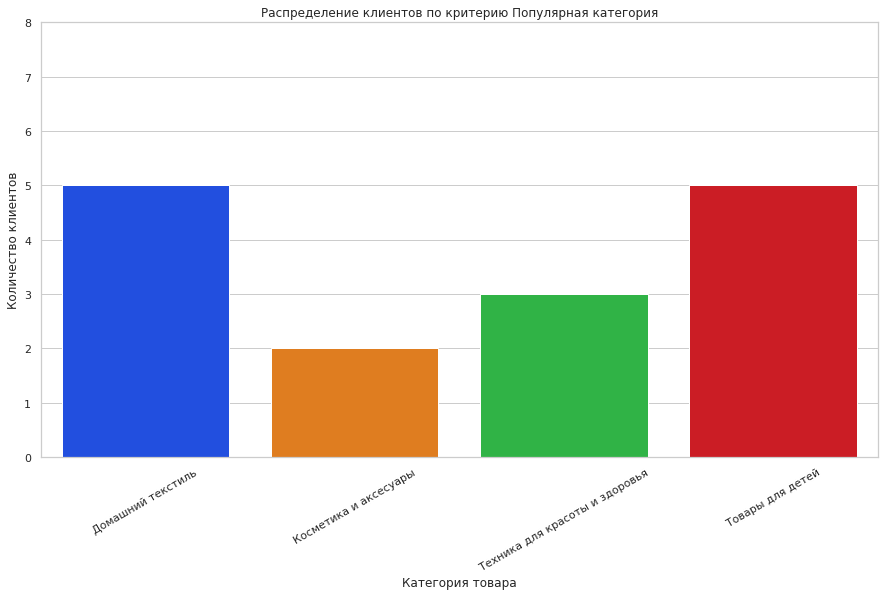

In [428]:
sns.set_style('whitegrid')
sns.set_palette('bright')
ax = sns.barplot(x='Популярная_категория', y='Разрешить сообщать', data = X_seg.groupby('Популярная_категория', as_index = False).agg({'Разрешить сообщать':'count'}))
sns.set(rc={'figure.figsize':(15,8)})
ax.set (xlabel='Категория товара',
        ylabel='Количество клиентов',
        ylim = (0,8),
        title='Распределение клиентов по критерию Популярная категория')  
plt.xticks(rotation = 30)
plt.show()

<div class="alert alert-info">
    В исследуемом сегменте прибыльных клиентов с высокой вероятностью снижения активности представлены 
4 товарные категории: домашний текстиль, косметика и аксессуары, техника для красоты и товары для детей.
Большинство клиентов сегмента сосредоточены в категориях текстиля и товаров для детей. 
</div>

In [429]:
f = ['пред_месяц_m', 'препред_месяц_v', 'Страниц_за_визит', 'Акционные_покупки', 'Неоплаченные_продукты_штук_квартал']

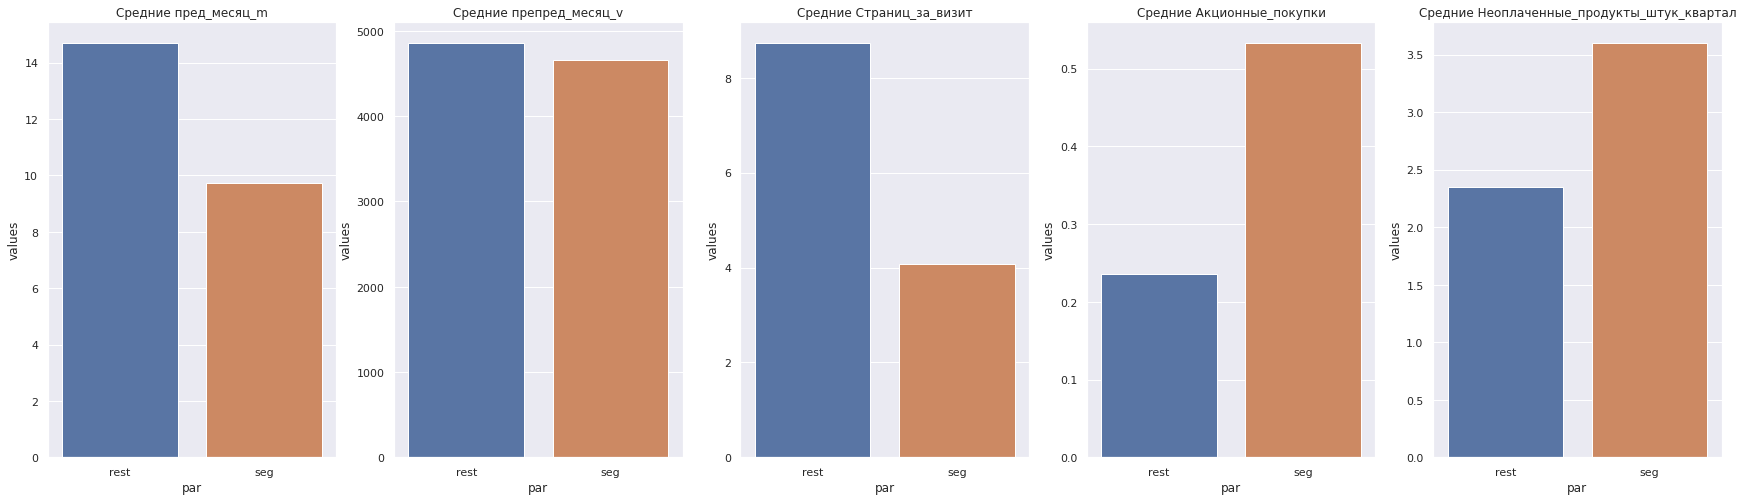

In [430]:
fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(30,8))
for i, j in enumerate(f):
    w = pd.DataFrame({'par': ['rest', 'seg'], 'values':[X_rest[j].mean(), X_seg[j].mean()]})
    sns.barplot(x = 'par', y = 'values', data = w, ax = axes[i])
    axes[i].set_title('Средние {}'.format(j))

<div class="alert alert-info">
    Сравнение средних значений наиболее значимых для моделирования параметров в выбранном сегменте и 
остальных клиентов в тестовой выборке показывает соответствие данных с диаграммой Шепли: средние 
значения признаков Акционные покупки и Неоплаченные продуккты выше в избранном сегменте (прибыльные с 
высокой вероятностью снижения активности), по сравнению со средними значениями данных параметров у 
остальных клиентов. Средние значения остальных параметров (число минут на сайте, выручка в препред месяце
и число просматриваемых стр за визит) в избранном сегменте ниже, по сравнению с остальными покупателями.
</div>

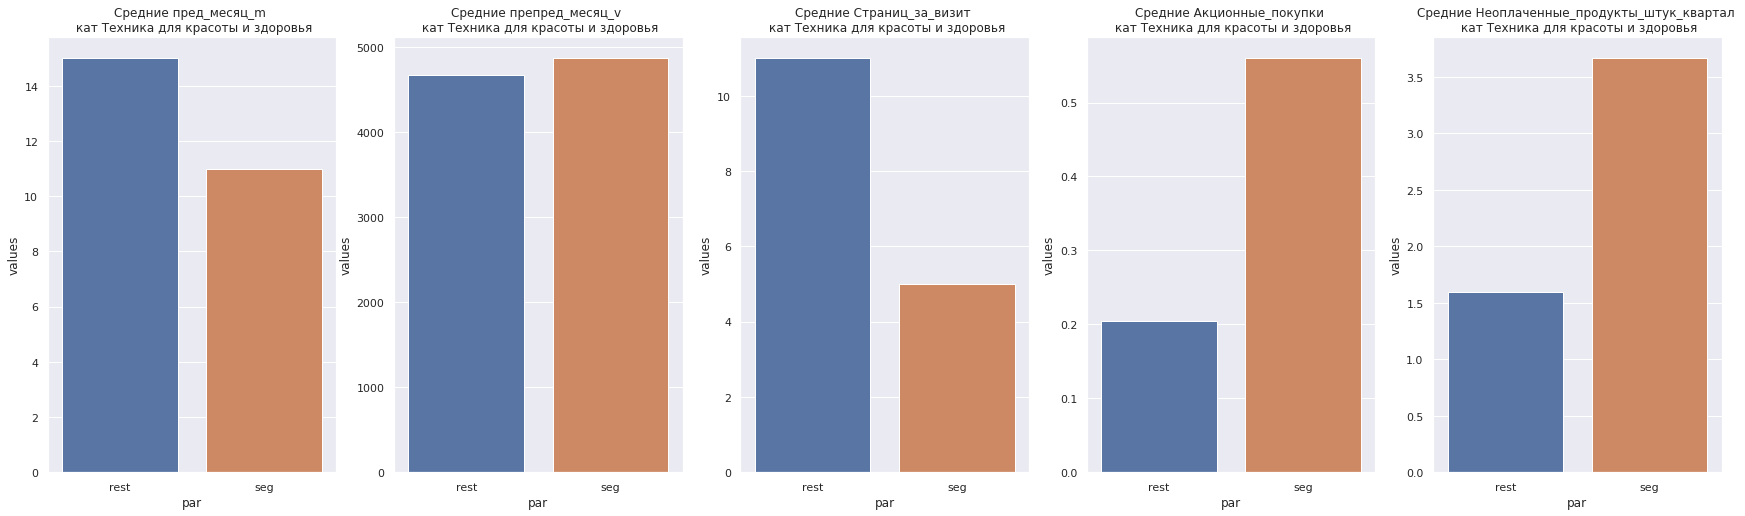

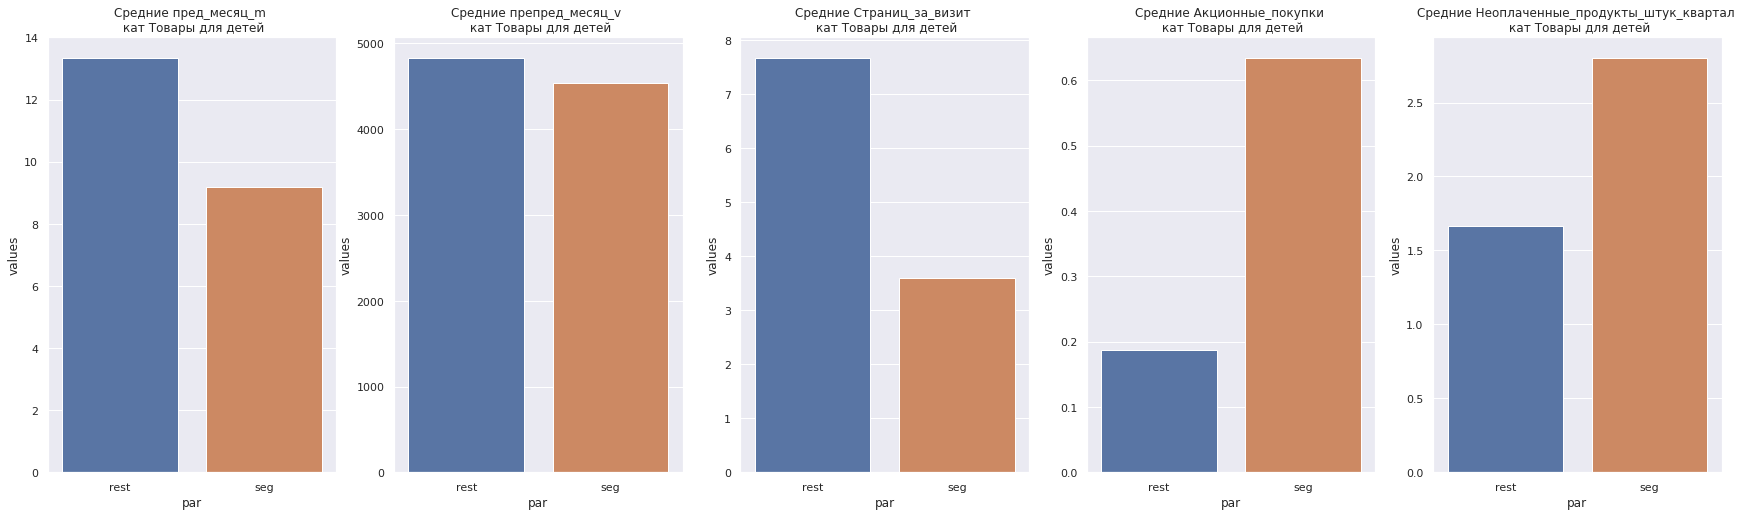

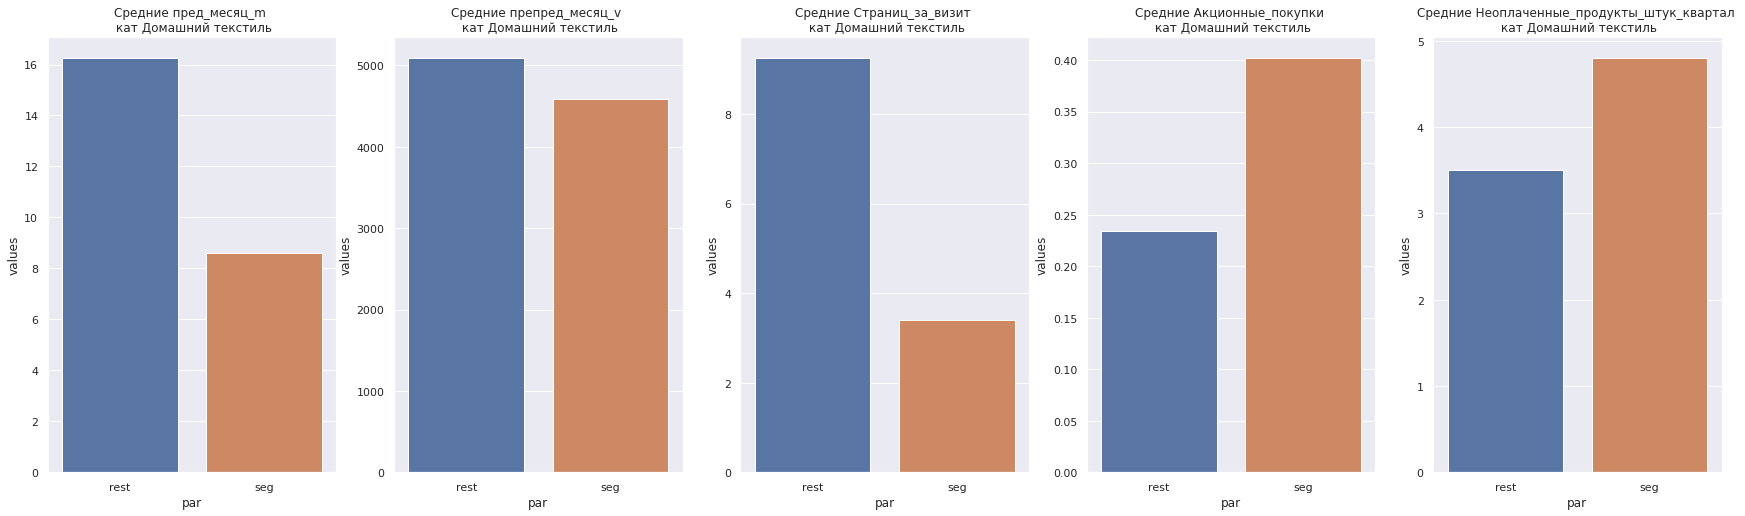

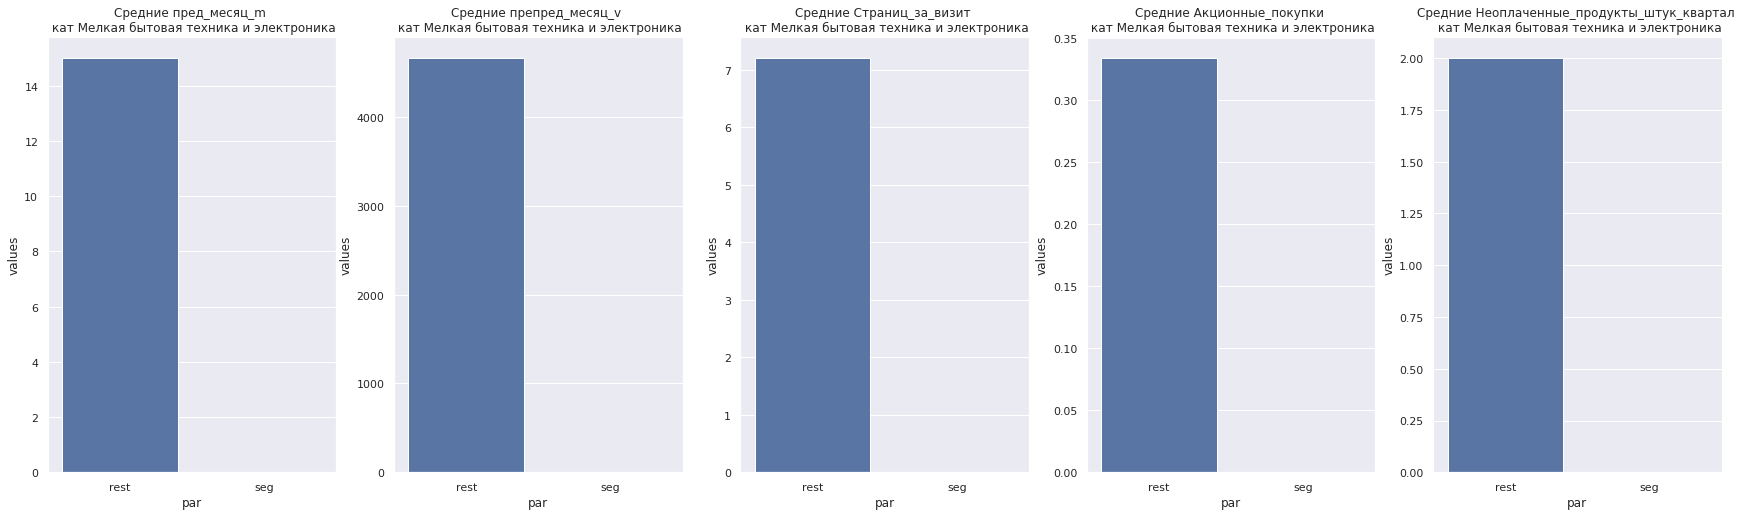

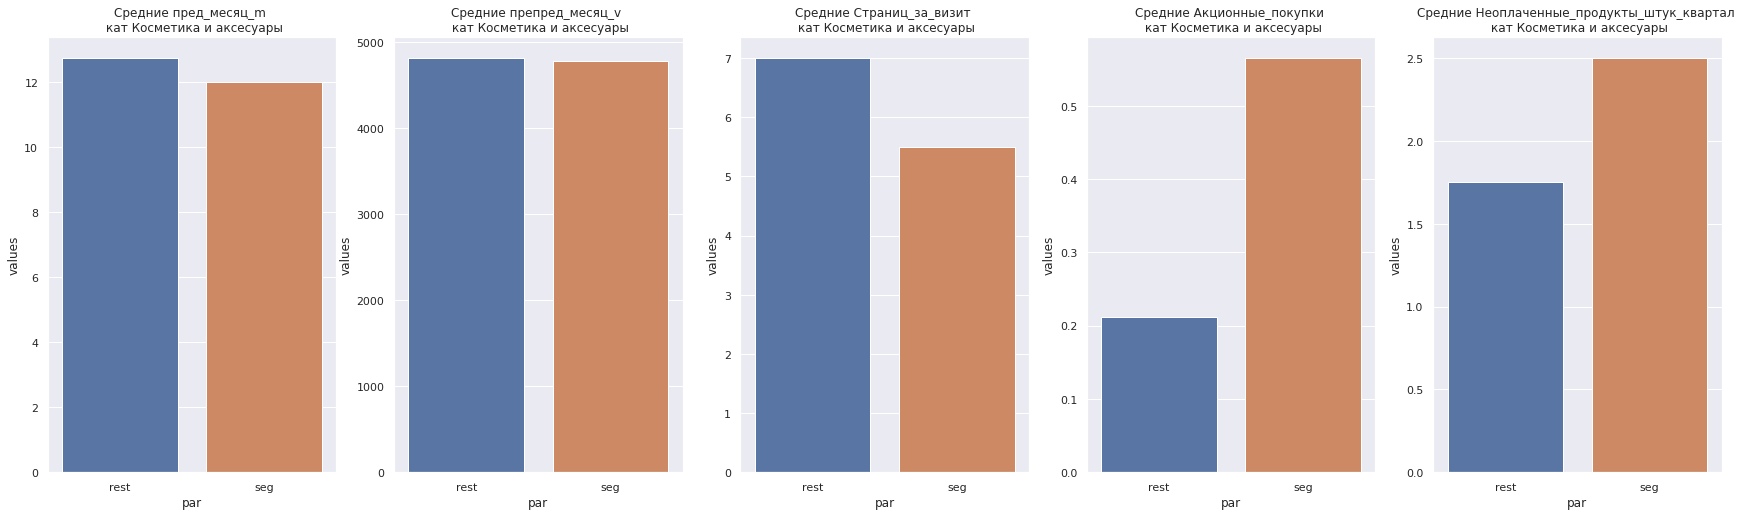

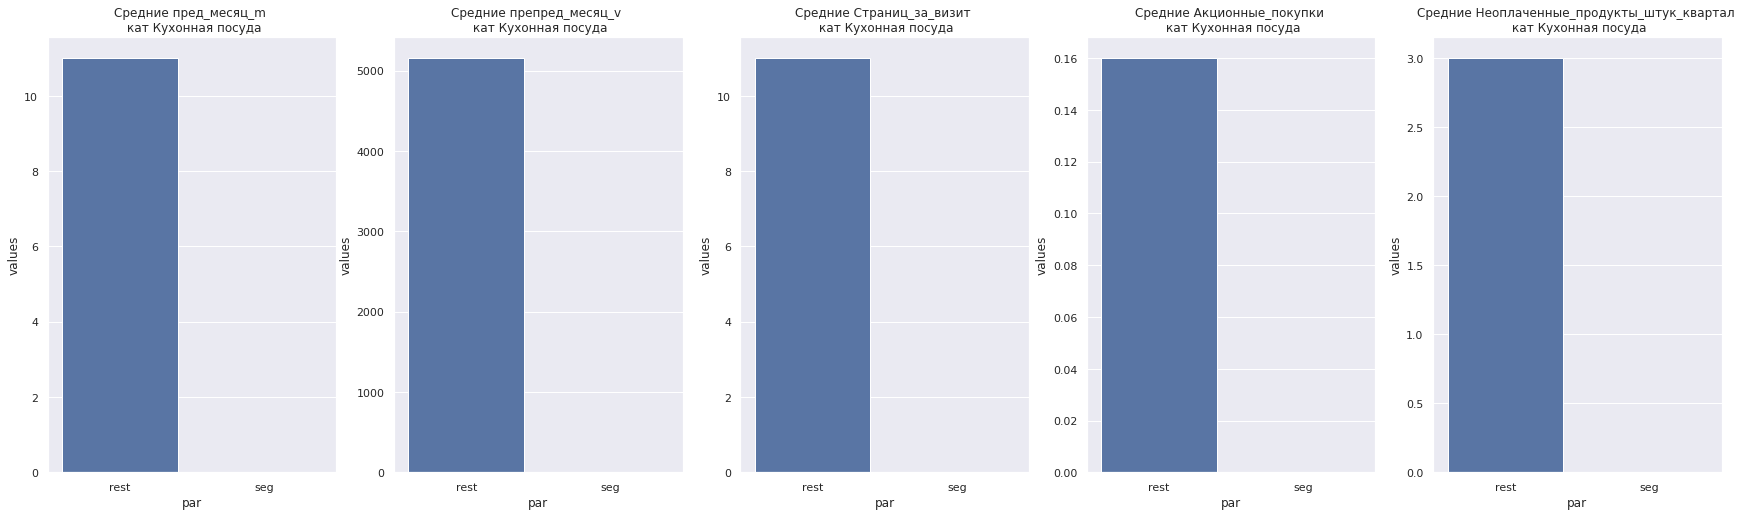

In [431]:
for k in X_test['Популярная_категория'].unique():
    fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(30,8))
    for i, j in enumerate(f):
        w = pd.DataFrame({'par': ['rest', 'seg'], 'values':[X_rest.loc[X_rest['Популярная_категория'] == k][j].mean(), X_seg.loc[X_seg['Популярная_категория'] == k][j].mean()]})
        sns.barplot(x = 'par', y = 'values', data = w, ax = axes[i])
        axes[i].set_title('Средние {} \n кат {}'.format(j, k))

<div class="alert alert-info">
    Покатегориальное сравнение средних значений значимых признаков между проблемным сегментом и 
остальными клиентами показывает, что во всех товарных категориях (красота, товары для детей, текстиль и
косметика) наблюдаются такие же тенденции, что и при вычислении общих средних показателей без 
разделения на товарные категории (соответствуют диаграмме Шепли): средние признаки Акционнызх покупок и
Неоплаченных товаров выше в проблемном сегменте, а средние страниц_за_визит, выручки в препред_мес. и 
пред_месяц_m, наоборот, выше у остальных клиентов. 
</div>

 <div class="alert alert-info">
    Таким образом, снижение количества минут на сайте в пред месяце, снижение выручки в препред месяце и
уменьшение просматриваемых страниц приводят к росту вероятности потери активности. И, наоборот, 
увеличение доли акционных покупок и увеличение количества неоплаченных товаров повышают вероятность.  
   Анализ полученных результатов показывает, что наиболее прибыльные клиенты - это разовые или
оптовые покупатели, которые в основном ищут на сайте акционные предложения и делают редкие крупные 
покупки. Поэтому чем больше была доля акционных покупок у клиента, тем выше вероятность, что он в ближ 
месяцы не будет совершать покупок. Такие клиенты заранее отбирают товары в корзину и определенных срок 
не оплачтивают их, дожидаясь акций. Поэтому рост вероятности потери активности пропорционален количеству
неоплаченных товаров. Вероятность сохранить покупательскую активность повышается с увеличением 
активности клиента на сайте в предыдущий срок, то есть, с увеличением числа минут на сайте в пред месяц
и количества просматриваемых страниц за визит, а также с увеличением выручки в препред месяце (клиент 
давно делал закупку и вероятно готов сделать в текущем месяце) 

<div class="alert alert-info">
    Для стимулирования покупательской активности клиентов выбранного сегмента необходимо проводить более
гибкую акционную политику для постоянных клиентов, информируя их об этом и поощряя регулярные покупки 
(система скидок за крупную покупку или за частые покупки). Кроме того, необходимо улучшить сервис отбора
товара, используя более удобные корзины и всплывающие предложения аналогичных товаров с улучшенным 
соотношением цена/качество. Кроме того, активность клиентов увеличивает привлекательность и 
информативность сайта, размещение новых продуктов и простота навигации. 
</div>

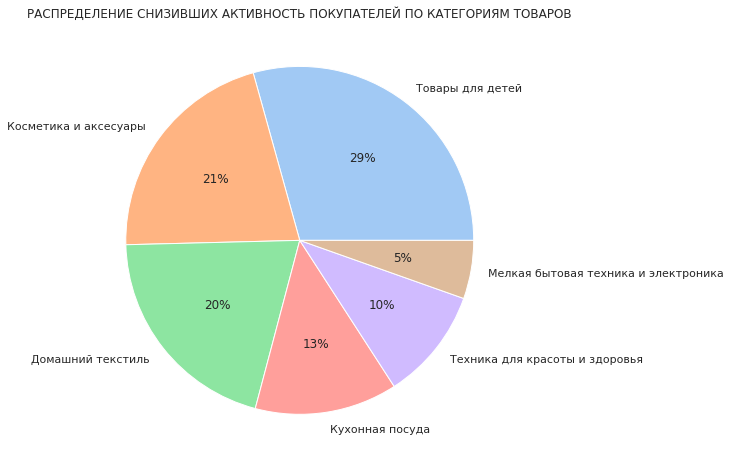

In [432]:
df = df_t
df_1 = df.loc[df['Покупательская активность'] == "Снизилась"]
df_m = df_1.pivot_table(index = 'Популярная_категория', values = 'id', aggfunc = 'count').sort_values(by = 'id', ascending = False)
df_f = df_1.groupby('Популярная_категория', as_index = False)['id'].count().sort_values(by = 'id', ascending = False)
s = df_f['Популярная_категория'].unique()
sns.set(rc={'figure.figsize':(16,8)})
colors = sns.color_palette('pastel')[ 0:15 ]
labels = s
plt.pie(list(df_m['id']), labels = labels, colors = colors, autopct='%.0f%%')
plt.title('РАСПРЕДЕЛЕНИЕ СНИЗИВШИХ АКТИВНОСТЬ ПОКУПАТЕЛЕЙ ПО КАТЕГОРИЯМ ТОВАРОВ')
plt.show()

<div class="alert alert-info">
    Среди клиентов, снизивших покупательную активность, лидируют категории товаров для детей (29 %), косметика (21 %) и 
домашний текстиль (20 %). Среди снизивших активность клиентов наименьшую долю занимают категории бытовой техники (5 %) и 
и техники для красоты (10 %).
</div>

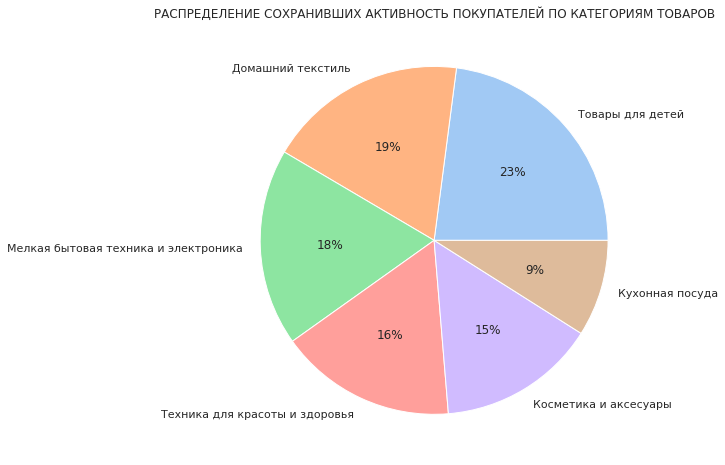

In [433]:
df = df_t
df_1 = df.loc[df['Покупательская активность'] == "Прежний уровень"]
df_m = df_1.pivot_table(index = 'Популярная_категория', values = 'id', aggfunc = 'count').sort_values(by = 'id', ascending = False)
df_f = df_1.groupby('Популярная_категория', as_index = False)['id'].count().sort_values(by = 'id', ascending = False)
s = df_f['Популярная_категория'].unique()
sns.set(rc={'figure.figsize':(16,8)})
colors = sns.color_palette('pastel')[ 0:15 ]
labels = s
plt.pie(list(df_m['id']), labels = labels, colors = colors, autopct='%.0f%%')
plt.title('РАСПРЕДЕЛЕНИЕ СОХРАНИВШИХ АКТИВНОСТЬ ПОКУПАТЕЛЕЙ ПО КАТЕГОРИЯМ ТОВАРОВ')
plt.show()

<div class="alert alert-info">
    Наибольшая доля клиентов, сохранивших активность (также как и у снизивших активность) занимает категория товаров для детей
(23 %). Далее идут категории домашнего тексителя (19 %) и бытовой техники (18 %). Нименьшие доли среди сохранивших активность 
занимают категории кухонной посуды (9 %) и косметики (15 %).
</div>

<div class="alert alert-info">
    Наименее проблемными с точки зрения сохранения покупательской активности являются клиенты, которые покупают в категориях 
бытовой техники (изменение доли при потере интереса -13 %) и техники красоты (изменение доли при потере интереса -6 %). 
Хуже всего обстоят дела в сегментах покупателей, интересующихся косметикой (изменение доли при потере интереса + 5 %) и 
кухонной посудой (увеличение доли категории при потере интереса + 4 %). Доли категории товаров для детей также растет
при потере интереса на 6 %. Доля же покупателей, интересующихся домашним текстилем практически неизменна в обоих группах 
 сохранивших и потерявших активность. Таким образом, усилия маркетинговой службы должны быть сконцентрированы на клиентах 
категорий косметики, товаров для детей и кухонной посуды. 
    
</div>

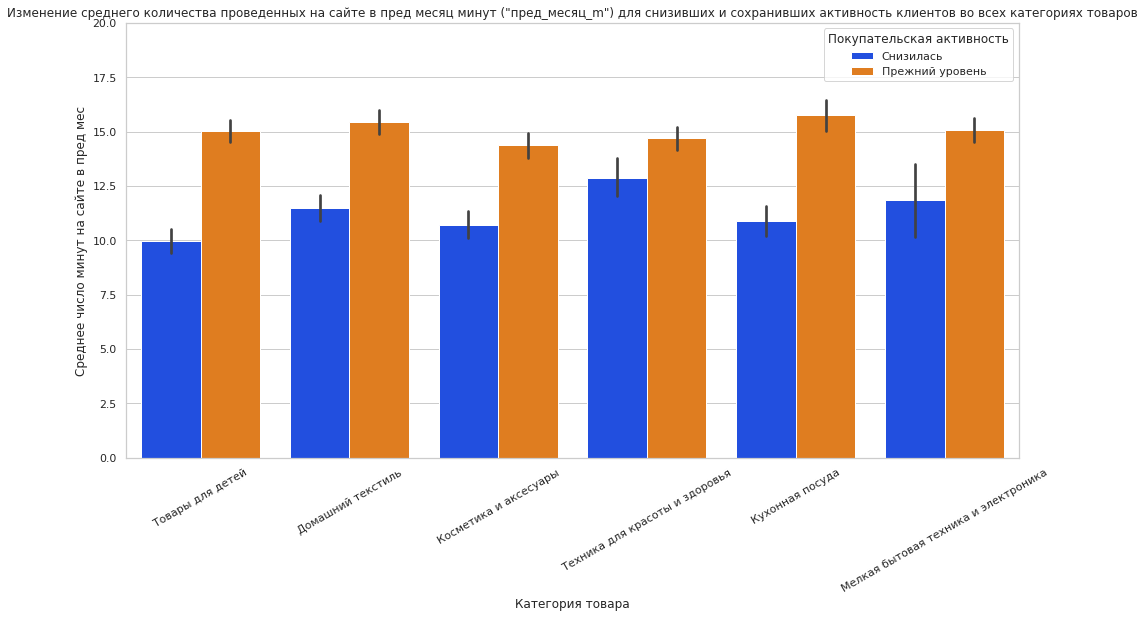

In [434]:
sns.set_style('whitegrid')
sns.set_palette('bright')
#df_c = df.groupby('category', as_index = False)['price'].mean().sort_values(by = 'price', ascending = False)
ax = sns.barplot(x='Популярная_категория', y='пред_месяц_m', estimator=mean, hue = 'Покупательская активность', data = df)
sns.set(rc={'figure.figsize':(15,8)})
ax.set (xlabel='Категория товара',
        ylabel='Среднее число минут на сайте в пред мес',
        ylim = (0,20),
        title='Изменение среднего количества проведенных на сайте в пред месяц минут ("пред_месяц_m") для снизивших и сохранивших активность клиентов во всех категориях товаров')  
plt.xticks(rotation = 30)
plt.show()

<div class="alert alert-info">
    Клиенты, сохранившие активность, вполне ожидаемо провели на сайте в пред месяце больше минут, чем клиенты, потерявшие 
интерес. 
</div>

In [435]:
df_c = df.groupby(['Популярная_категория', 'Покупательская активность'], as_index = False).agg({'пред_месяц_m':['count', 'mean']})                                         

In [436]:
df_c['count_'] = df_c['пред_месяц_m']['count']
df_c['mean_'] = df_c['пред_месяц_m']['mean']

In [437]:
df_c['min_count'] = df_c['count_']

In [438]:
j = 0
for i in df_c['Популярная_категория'].unique():
    df_c.loc[df_c['Популярная_категория'] == i, 'min_count'] = df_c.loc[(df_c['Популярная_категория'] == i) & (df_c['Покупательская активность'] == 'Прежний уровень'), 'count_'][j] + df_c.loc[(df_c['Популярная_категория'] == i) & (df_c['Покупательская активность'] == 'Снизилась'), 'count_'][j+1]
    j+=2      

In [439]:
df_c['ratio_count'] = df_c['min_count']
j = 0
for i in df_c['Популярная_категория'].unique():
    df_c.loc[df_c['Популярная_категория'] == i, 'ratio_count'] = df_c.loc[(df_c['Популярная_категория'] == i) & (df_c['Покупательская активность'] == 'Прежний уровень'), 'count_'][j] / df_c.loc[(df_c['Популярная_категория'] == i) & (df_c['Покупательская активность'] == 'Прежний уровень'), 'min_count'][j]
    j+=2   

In [440]:
df_c['min_mean'] = df_c['mean_']
j = 0
for i in df_c['Популярная_категория'].unique():
    df_c.loc[df_c['Популярная_категория'] == i, 'min_mean'] = df_c.loc[(df_c['Популярная_категория'] == i) & (df_c['Покупательская активность'] == 'Прежний уровень'), 'mean_'][j] + df_c.loc[(df_c['Популярная_категория'] == i) & (df_c['Покупательская активность'] == 'Снизилась'), 'mean_'][j+1]
    j+=2  

In [441]:
df_c['ratio_mean'] = df_c['min_mean']
j = 0
for i in df_c['Популярная_категория'].unique():
    df_c.loc[df_c['Популярная_категория'] == i, 'ratio_mean'] = df_c.loc[(df_c['Популярная_категория'] == i) & (df_c['Покупательская активность'] == 'Прежний уровень'), 'mean_'][j] / df_c.loc[(df_c['Популярная_категория'] == i) & (df_c['Покупательская активность'] == 'Прежний уровень'), 'min_mean'][j]
    j+=2   

In [442]:
df_c = df_c[['Популярная_категория', 'ratio_count', 'ratio_mean']]

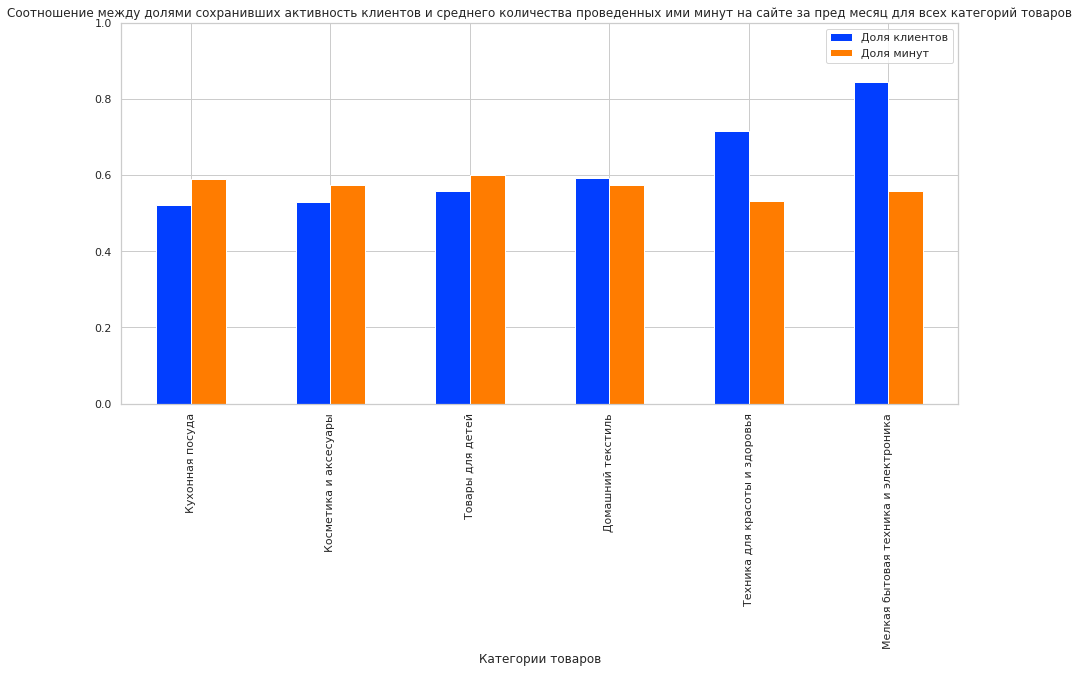

In [443]:
sns.set_style('whitegrid')
sns.set_palette('bright')
df_c.pivot_table(index = 'Популярная_категория', values = ['ratio_count', 'ratio_mean'], aggfunc = 'mean').sort_values(by = 'ratio_count').plot(kind='bar', figsize = (15,7), ylim = (0,1), title = 'Соотношение между долями сохранивших активность клиентов и среднего количества проведенных ими минут на сайте за пред месяц для всех категорий товаров',
                                                    xlabel = 'Категории товаров', ylabel = '');
plt.legend(['Доля клиентов', 'Доля минут']);

In [444]:
df_c['ratio_count'].corr(df_c['ratio_mean'])

-0.6766668403082353

<div class="alert alert-info">
    При покатегориальном сравнении доли клиентов, сохранивших активность, с их долей среднего времени на сайте выяснилось, что 
доля времени на сайте снижается с увеличением доли активных клиентов (коэф корреляции -0,67). Это соответствует тенденции
на диаграмме Шепли для данного признака и говорит о том, что сохранившие активность клиенты имеют склонность к снижению 
времени, затрачиваемого на поиск товара на сайте. Скорее всего это связано с тем, что активные клиенты лучше изучили сайт, а
также с тем, что интересующие их категории (бытовая техника, индустрия красоты) лучше структурированы. 
</div>

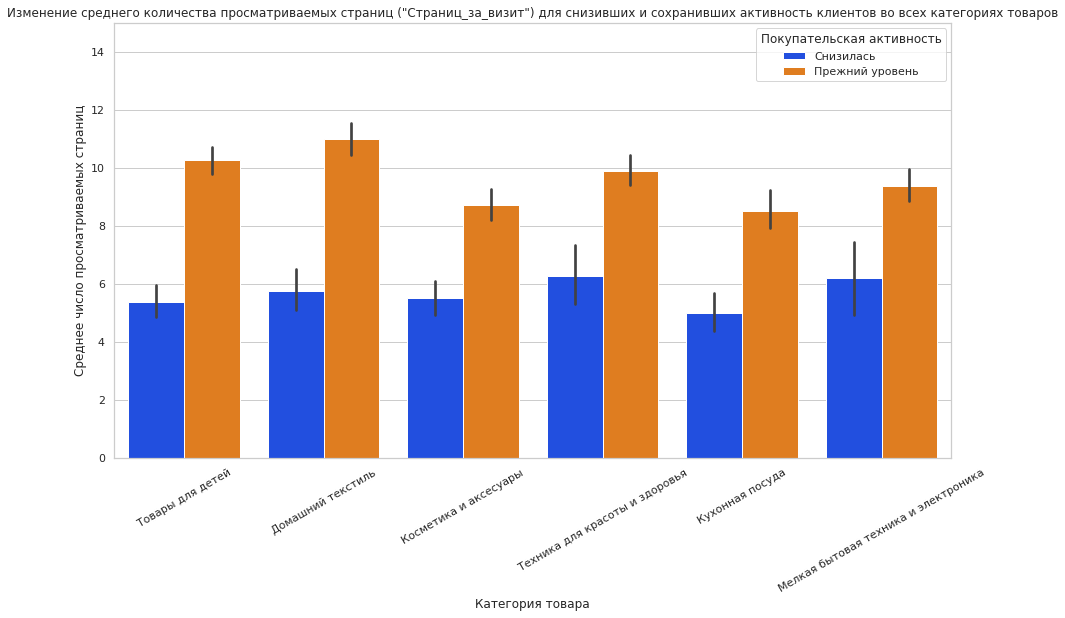

In [445]:
sns.set_style('whitegrid')
sns.set_palette('bright')
#df_c = df.groupby('category', as_index = False)['price'].mean().sort_values(by = 'price', ascending = False)
ax = sns.barplot(x='Популярная_категория', y='Страниц_за_визит', estimator=mean, hue = 'Покупательская активность', data = df)
sns.set(rc={'figure.figsize':(15,8)})
ax.set (xlabel='Категория товара',
        ylabel='Среднее число просматриваемых страниц',
        ylim = (0,15),
        title='Изменение среднего количества просматриваемых страниц ("Страниц_за_визит") для снизивших и сохранивших активность клиентов во всех категориях товаров')  
plt.xticks(rotation = 30)
plt.show()

<div class="alert alert-info">
    Сохранившие активность клиенты в среднем просматривают за визит больше страниц, чем клиенты, снизившие активность.
</div>

In [446]:
df_c = df.groupby(['Популярная_категория', 'Покупательская активность'], as_index = False).agg({'Страниц_за_визит':['count', 'mean']})  

In [447]:
df_c['count_'] = df_c['Страниц_за_визит']['count']
df_c['mean_'] = df_c['Страниц_за_визит']['mean']

In [448]:
df_c['min_count'] = df_c['count_']

In [449]:
j = 0
for i in df_c['Популярная_категория'].unique():
    df_c.loc[df_c['Популярная_категория'] == i, 'min_count'] = df_c.loc[(df_c['Популярная_категория'] == i) & (df_c['Покупательская активность'] == 'Прежний уровень'), 'count_'][j] + df_c.loc[(df_c['Популярная_категория'] == i) & (df_c['Покупательская активность'] == 'Снизилась'), 'count_'][j+1]
    j+=2    

In [450]:
df_c['ratio_count'] = df_c['min_count']
j = 0
for i in df_c['Популярная_категория'].unique():
    df_c.loc[df_c['Популярная_категория'] == i, 'ratio_count'] = df_c.loc[(df_c['Популярная_категория'] == i) & (df_c['Покупательская активность'] == 'Прежний уровень'), 'count_'][j] / df_c.loc[(df_c['Популярная_категория'] == i) & (df_c['Покупательская активность'] == 'Прежний уровень'), 'min_count'][j]
    j+=2   

In [451]:
df_c['min_mean'] = df_c['mean_']
j = 0
for i in df_c['Популярная_категория'].unique():
    df_c.loc[df_c['Популярная_категория'] == i, 'min_mean'] = df_c.loc[(df_c['Популярная_категория'] == i) & (df_c['Покупательская активность'] == 'Прежний уровень'), 'mean_'][j] + df_c.loc[(df_c['Популярная_категория'] == i) & (df_c['Покупательская активность'] == 'Снизилась'), 'mean_'][j+1]
    j+=2  

In [452]:
df_c['ratio_mean'] = df_c['min_mean']
j = 0
for i in df_c['Популярная_категория'].unique():
    df_c.loc[df_c['Популярная_категория'] == i, 'ratio_mean'] = df_c.loc[(df_c['Популярная_категория'] == i) & (df_c['Покупательская активность'] == 'Прежний уровень'), 'mean_'][j] / df_c.loc[(df_c['Популярная_категория'] == i) & (df_c['Покупательская активность'] == 'Прежний уровень'), 'min_mean'][j]
    j+=2   

In [453]:
df_c = df_c[['Популярная_категория', 'ratio_count', 'ratio_mean']]

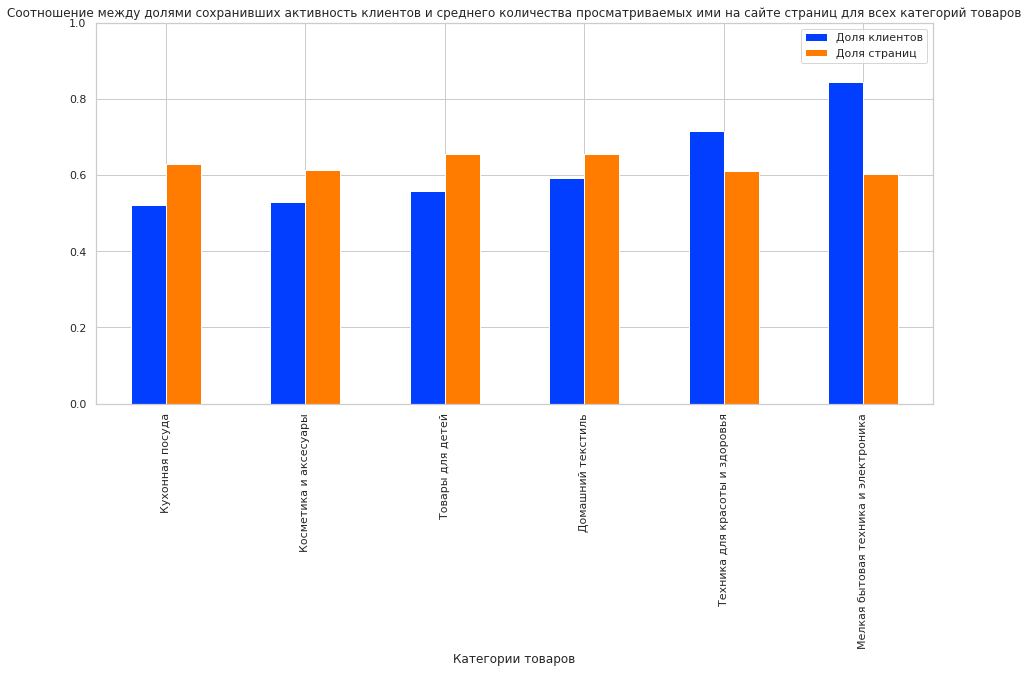

In [454]:
sns.set_style('whitegrid')
sns.set_palette('bright')
df_c.pivot_table(index = 'Популярная_категория', values = ['ratio_count', 'ratio_mean'], aggfunc = 'mean').sort_values(by = 'ratio_count').plot(kind='bar', figsize = (15,7), ylim = (0,1), title = 'Соотношение между долями сохранивших активность клиентов и среднего количества просматриваемых ими на сайте страниц для всех категорий товаров',
                                                    xlabel = 'Категории товаров', ylabel = '');
plt.legend(['Доля клиентов', 'Доля страниц']);

In [455]:
df_c['ratio_count'].corr(df_c['ratio_mean'])

-0.5738271292750708

<div class="alert alert-info">
    Покатегориальные доли клиентов, сохранивших активность обратнопропорциональны долям среднего количества просматриваемых 
ими страниц, что соответствует тенденции диаграммы Шепли для этого признака. То есть, активные клиенты имеют тенденцию 
к снижению количества просматриваемых страниц, что связано с хорошим знанием содержания сайта, а также с хорошей товарной
структурой интересующих их категорий. 
</div>

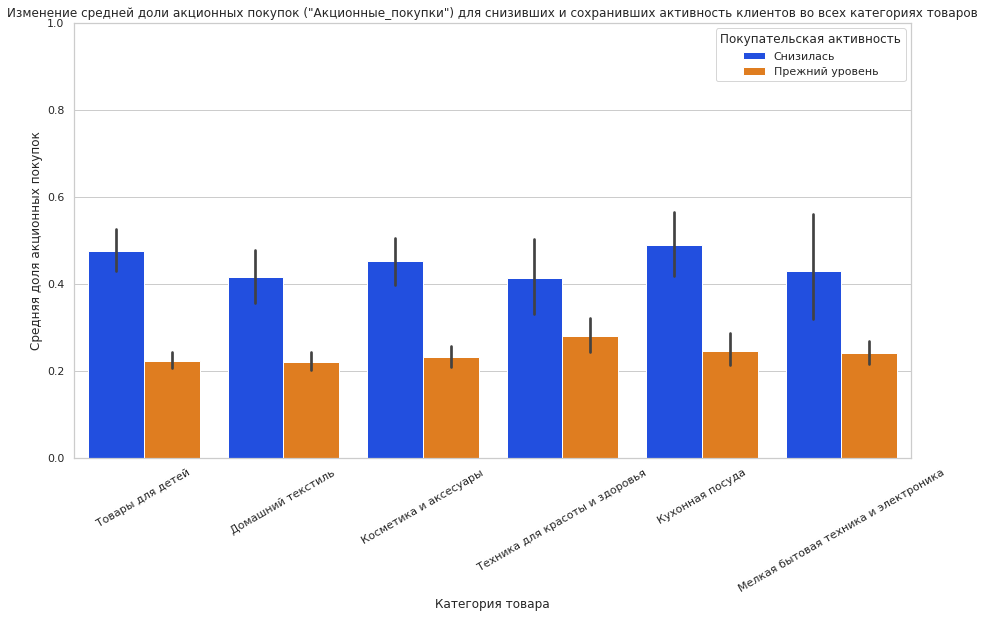

In [456]:
sns.set_style('whitegrid')
sns.set_palette('bright')
#df_c = df.groupby('category', as_index = False)['price'].mean().sort_values(by = 'price', ascending = False)
ax = sns.barplot(x='Популярная_категория', y='Акционные_покупки', estimator=mean, hue = 'Покупательская активность', data = df)
sns.set(rc={'figure.figsize':(15,8)})
ax.set (xlabel='Категория товара',
        ylabel='Средняя доля акционных покупок',
        ylim = (0,1),
        title='Изменение средней доли акционных покупок ("Акционные_покупки") для снизивших и сохранивших активность клиентов во всех категориях товаров')  
plt.xticks(rotation = 30)
plt.show()

<div class="alert alert-info">
    Во всех категориях клиенты, потерявшие активность, совершали большее количество акционных покупок, по сравнению с активными
клиентами. По-видимому это связано с тем, что акционные покупки совершают, в основном, случайные клиенты, которые не являются
постоянными покупателями данной площадки, а информацию об акция они находят методом случайного скроллинга страниц и рекомендаций
поисковиков. 
</div>

In [457]:
df_c = df.groupby(['Популярная_категория', 'Покупательская активность'], as_index = False).agg({'Акционные_покупки':['count', 'mean']})  

In [458]:
df_c['count_'] = df_c['Акционные_покупки']['count']
df_c['mean_'] = df_c['Акционные_покупки']['mean']

In [459]:
df_c['min_count'] = df_c['count_']

In [460]:
j = 0
for i in df_c['Популярная_категория'].unique():
    df_c.loc[df_c['Популярная_категория'] == i, 'min_count'] = df_c.loc[(df_c['Популярная_категория'] == i) & (df_c['Покупательская активность'] == 'Прежний уровень'), 'count_'][j] + df_c.loc[(df_c['Популярная_категория'] == i) & (df_c['Покупательская активность'] == 'Снизилась'), 'count_'][j+1]
    j+=2   

In [461]:
df_c['ratio_count'] = df_c['min_count']
j = 0
for i in df_c['Популярная_категория'].unique():
    df_c.loc[df_c['Популярная_категория'] == i, 'ratio_count'] = df_c.loc[(df_c['Популярная_категория'] == i) & (df_c['Покупательская активность'] == 'Прежний уровень'), 'count_'][j] / df_c.loc[(df_c['Популярная_категория'] == i) & (df_c['Покупательская активность'] == 'Прежний уровень'), 'min_count'][j]
    j+=2   

In [462]:
df_c['min_mean'] = df_c['mean_']
j = 0
for i in df_c['Популярная_категория'].unique():
    df_c.loc[df_c['Популярная_категория'] == i, 'min_mean'] = df_c.loc[(df_c['Популярная_категория'] == i) & (df_c['Покупательская активность'] == 'Прежний уровень'), 'mean_'][j] + df_c.loc[(df_c['Популярная_категория'] == i) & (df_c['Покупательская активность'] == 'Снизилась'), 'mean_'][j+1]
    j+=2  

In [463]:
df_c['ratio_mean'] = df_c['min_mean']
j = 0
for i in df_c['Популярная_категория'].unique():
    df_c.loc[df_c['Популярная_категория'] == i, 'ratio_mean'] = df_c.loc[(df_c['Популярная_категория'] == i) & (df_c['Покупательская активность'] == 'Прежний уровень'), 'mean_'][j] / df_c.loc[(df_c['Популярная_категория'] == i) & (df_c['Покупательская активность'] == 'Прежний уровень'), 'min_mean'][j]
    j+=2   

In [464]:
df_c = df_c[['Популярная_категория', 'ratio_count', 'ratio_mean']]

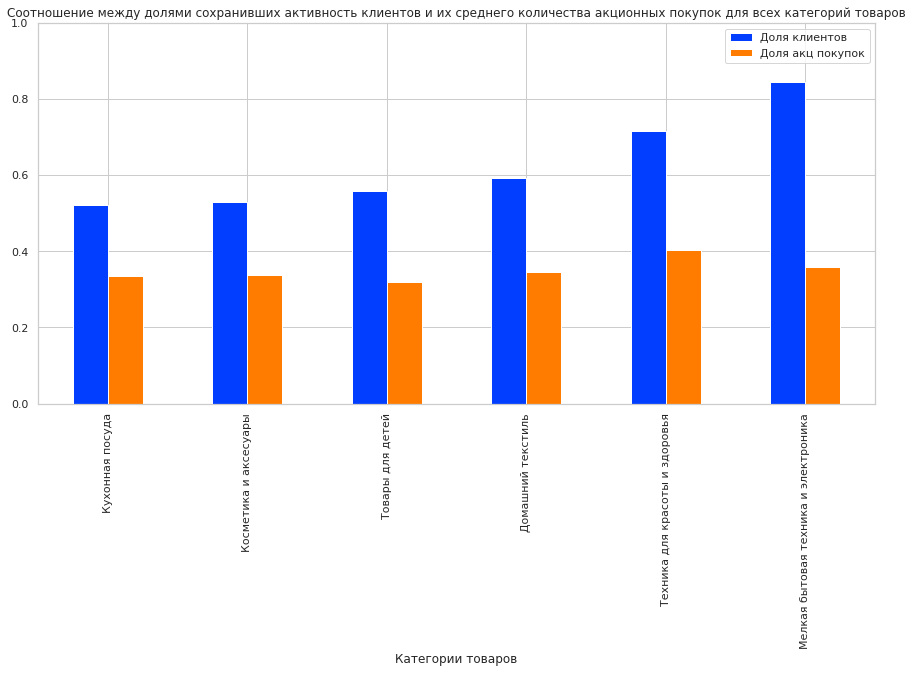

In [465]:
sns.set_style('whitegrid')
sns.set_palette('bright')
df_c.pivot_table(index = 'Популярная_категория', values = ['ratio_count', 'ratio_mean'], aggfunc = 'mean').sort_values(by = 'ratio_count').plot(kind='bar', figsize = (15,7), ylim = (0,1), title = 'Соотношение между долями сохранивших активность клиентов и их среднего количества акционных покупок для всех категорий товаров',
                                                    xlabel = 'Категории товаров', ylabel = '');
plt.legend(['Доля клиентов', 'Доля акц покупок']);

In [466]:
df_c['ratio_count'].corr(df_c['ratio_mean'])

0.6159473070156182

<div class="alert alert-info">
    Доля активных клиентов находится в прямой зависимости с долей совершаемых ими акционных покупок (коэф корр = 0,62), что
соотв тенденции на диаграмме Шепли для данного признака. Это говорит о том, что активных клиентов, являющихся постоянными 
покупателями сайта, привлекают акционные продажи, которые способствуют их сохранению. 
</div>

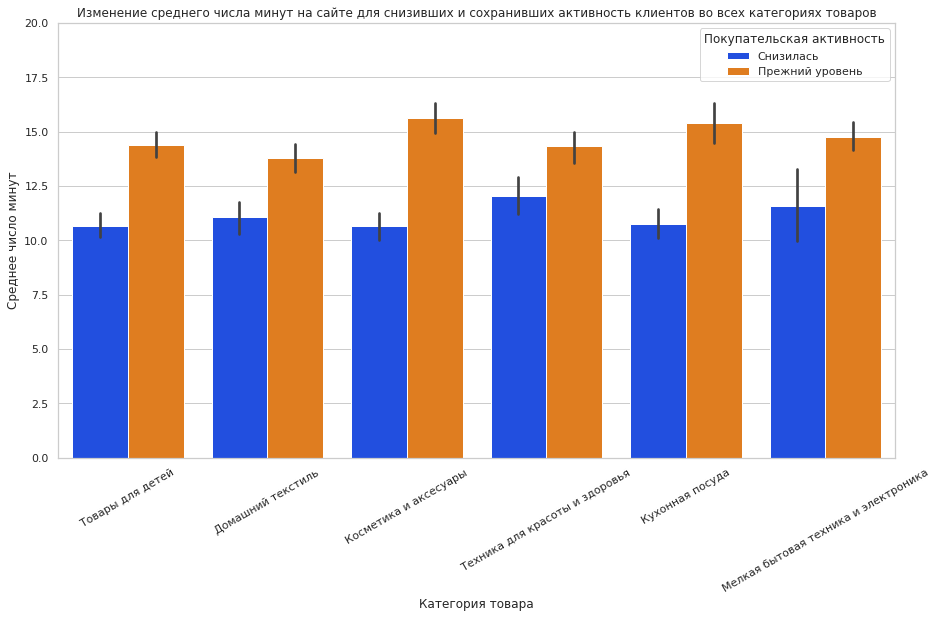

In [467]:
sns.set_style('whitegrid')
sns.set_palette('bright')
#df_c = df.groupby('category', as_index = False)['price'].mean().sort_values(by = 'price', ascending = False)
ax = sns.barplot(x='Популярная_категория', y='тек_месяц_m', estimator=mean, hue = 'Покупательская активность', data = df)
sns.set(rc={'figure.figsize':(15,8)})
ax.set (xlabel='Категория товара',
        ylabel='Среднее число минут',
        ylim = (0,20),
        title='Изменение среднего числа минут на сайте для снизивших и сохранивших активность клиентов во всех категориях товаров')  
plt.xticks(rotation = 30)
plt.show()

<div class="alert alert-info">
    Активные клиенты ожидаемо проводят на сайте больше времени в текущем месяце, чем потерявшие активность.
</div>

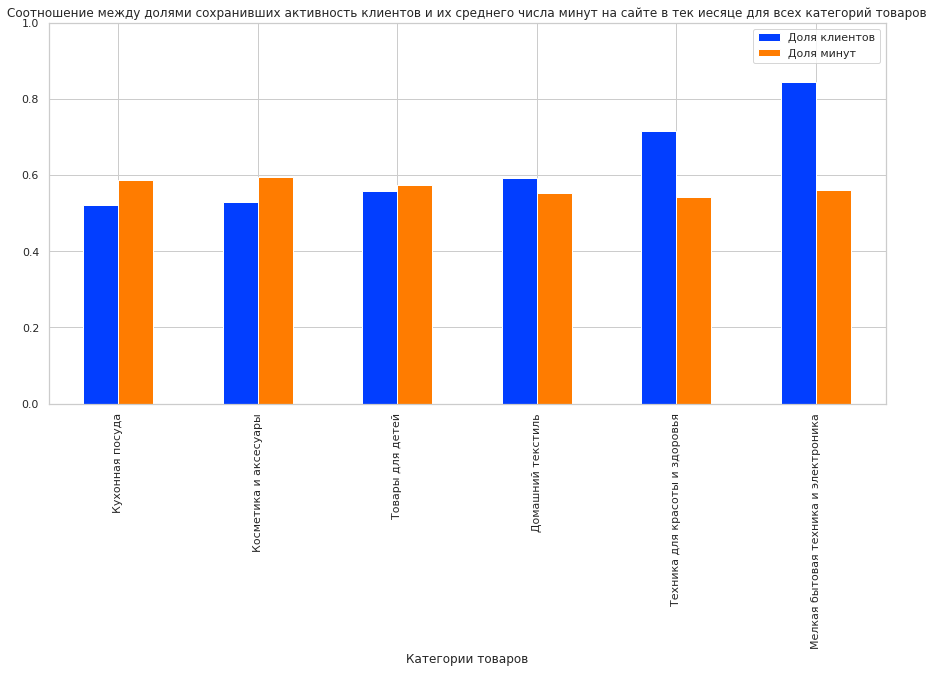

In [468]:
df_c = df.groupby(['Популярная_категория', 'Покупательская активность'], as_index = False).agg({'тек_месяц_m':['count', 'mean']})  
df_c['count_'] = df_c['тек_месяц_m']['count']
df_c['mean_'] = df_c['тек_месяц_m']['mean']
df_c['min_count'] = df_c['count_']
j = 0
for i in df_c['Популярная_категория'].unique():
    df_c.loc[df_c['Популярная_категория'] == i, 'min_count'] = df_c.loc[(df_c['Популярная_категория'] == i) & (df_c['Покупательская активность'] == 'Прежний уровень'), 'count_'][j] + df_c.loc[(df_c['Популярная_категория'] == i) & (df_c['Покупательская активность'] == 'Снизилась'), 'count_'][j+1]
    j+=2   
df_c['ratio_count'] = df_c['min_count']
j = 0
for i in df_c['Популярная_категория'].unique():
    df_c.loc[df_c['Популярная_категория'] == i, 'ratio_count'] = df_c.loc[(df_c['Популярная_категория'] == i) & (df_c['Покупательская активность'] == 'Прежний уровень'), 'count_'][j] / df_c.loc[(df_c['Популярная_категория'] == i) & (df_c['Покупательская активность'] == 'Прежний уровень'), 'min_count'][j]
    j+=2   
df_c['min_mean'] = df_c['mean_']
j = 0
for i in df_c['Популярная_категория'].unique():
    df_c.loc[df_c['Популярная_категория'] == i, 'min_mean'] = df_c.loc[(df_c['Популярная_категория'] == i) & (df_c['Покупательская активность'] == 'Прежний уровень'), 'mean_'][j] + df_c.loc[(df_c['Популярная_категория'] == i) & (df_c['Покупательская активность'] == 'Снизилась'), 'mean_'][j+1]
    j+=2  
df_c['ratio_mean'] = df_c['min_mean']
j = 0
for i in df_c['Популярная_категория'].unique():
    df_c.loc[df_c['Популярная_категория'] == i, 'ratio_mean'] = df_c.loc[(df_c['Популярная_категория'] == i) & (df_c['Покупательская активность'] == 'Прежний уровень'), 'mean_'][j] / df_c.loc[(df_c['Популярная_категория'] == i) & (df_c['Покупательская активность'] == 'Прежний уровень'), 'min_mean'][j]
    j+=2 
df_c = df_c[['Популярная_категория', 'ratio_count', 'ratio_mean']]
sns.set_style('whitegrid')
sns.set_palette('bright')
df_c.pivot_table(index = 'Популярная_категория', values = ['ratio_count', 'ratio_mean'], aggfunc = 'mean').sort_values(by = 'ratio_count').plot(kind='bar', figsize = (15,7), ylim = (0,1), title = 'Соотношение между долями сохранивших активность клиентов и их среднего числа минут на сайте в тек иесяце для всех категорий товаров',
                                                    xlabel = 'Категории товаров', ylabel = '');
plt.legend(['Доля клиентов', 'Доля минут']);



In [469]:
df_c['ratio_count'].corr(df_c['ratio_mean'])

-0.6715569268211657

<div class="alert alert-info">
    Доля активных клиентов обратнопропорциональна доли среднего времени на сайте в текущем месяце (коэф корр = -0,67),
что соотв тенденции на диаграмме Шепли и говорит о том, что постоянные клиенты имеют склонность меньше проводить времени 
на сайте из-за его хорошей изученности и структурированности в интересующих их категориях. 
</div>

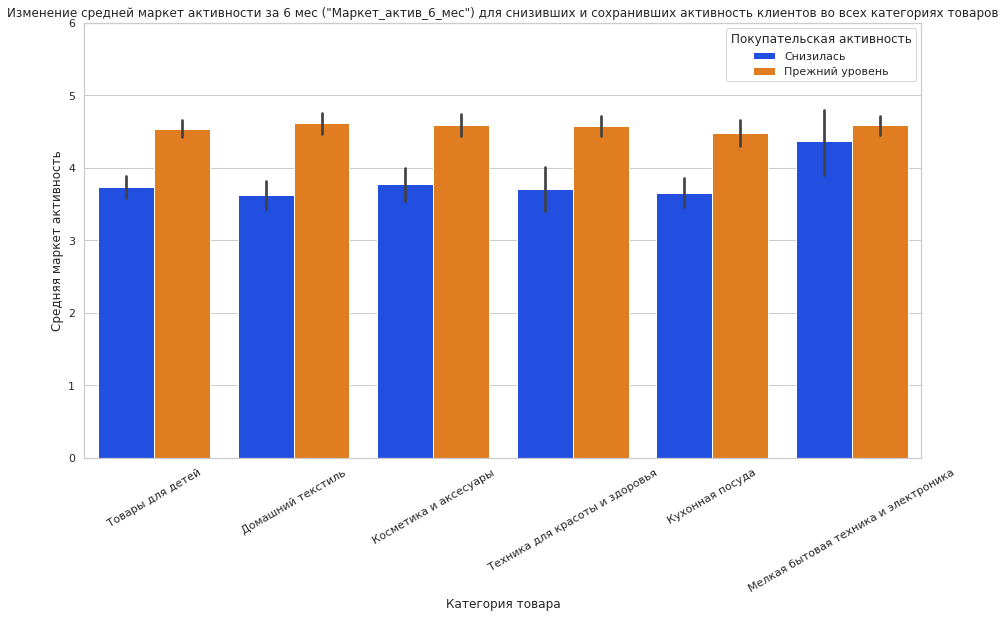

In [470]:
sns.set_style('whitegrid')
sns.set_palette('bright')
#df_c = df.groupby('category', as_index = False)['price'].mean().sort_values(by = 'price', ascending = False)
ax = sns.barplot(x='Популярная_категория', y='Маркет_актив_6_мес', estimator=mean, hue = 'Покупательская активность', data = df)
sns.set(rc={'figure.figsize':(15,8)})
ax.set (xlabel='Категория товара',
        ylabel='Средняя маркет активность',
        ylim = (0,6),
        title='Изменение средней маркет активности за 6 мес ("Маркет_актив_6_мес") для снизивших и сохранивших активность клиентов во всех категориях товаров')  
plt.xticks(rotation = 30)
plt.show()

<div class="alert alert-info">
    Активные клиенты во всех товарных категориях испытывали в среднем большее количество маркетинговых акций, по сравнению с 
покупателями, снизившими активность. Это говорит об относительной эффективности рекламных акций.
</div>

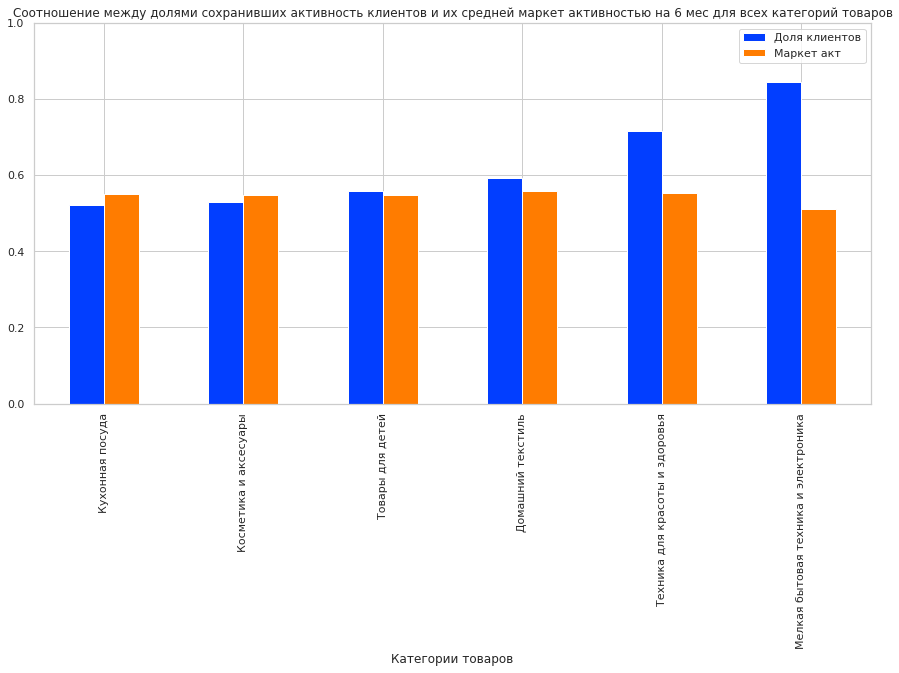

In [471]:
df_c = df.groupby(['Популярная_категория', 'Покупательская активность'], as_index = False).agg({'Маркет_актив_6_мес':['count', 'mean']})  
df_c['count_'] = df_c['Маркет_актив_6_мес']['count']
df_c['mean_'] = df_c['Маркет_актив_6_мес']['mean']
df_c['min_count'] = df_c['count_']
j = 0
for i in df_c['Популярная_категория'].unique():
    df_c.loc[df_c['Популярная_категория'] == i, 'min_count'] = df_c.loc[(df_c['Популярная_категория'] == i) & (df_c['Покупательская активность'] == 'Прежний уровень'), 'count_'][j] + df_c.loc[(df_c['Популярная_категория'] == i) & (df_c['Покупательская активность'] == 'Снизилась'), 'count_'][j+1]
    j+=2   
df_c['ratio_count'] = df_c['min_count']
j = 0
for i in df_c['Популярная_категория'].unique():
    df_c.loc[df_c['Популярная_категория'] == i, 'ratio_count'] = df_c.loc[(df_c['Популярная_категория'] == i) & (df_c['Покупательская активность'] == 'Прежний уровень'), 'count_'][j] / df_c.loc[(df_c['Популярная_категория'] == i) & (df_c['Покупательская активность'] == 'Прежний уровень'), 'min_count'][j]
    j+=2   
df_c['min_mean'] = df_c['mean_']
j = 0
for i in df_c['Популярная_категория'].unique():
    df_c.loc[df_c['Популярная_категория'] == i, 'min_mean'] = df_c.loc[(df_c['Популярная_категория'] == i) & (df_c['Покупательская активность'] == 'Прежний уровень'), 'mean_'][j] + df_c.loc[(df_c['Популярная_категория'] == i) & (df_c['Покупательская активность'] == 'Снизилась'), 'mean_'][j+1]
    j+=2  
df_c['ratio_mean'] = df_c['min_mean']
j = 0
for i in df_c['Популярная_категория'].unique():
    df_c.loc[df_c['Популярная_категория'] == i, 'ratio_mean'] = df_c.loc[(df_c['Популярная_категория'] == i) & (df_c['Покупательская активность'] == 'Прежний уровень'), 'mean_'][j] / df_c.loc[(df_c['Популярная_категория'] == i) & (df_c['Покупательская активность'] == 'Прежний уровень'), 'min_mean'][j]
    j+=2 
df_c = df_c[['Популярная_категория', 'ratio_count', 'ratio_mean']]
sns.set_style('whitegrid')
sns.set_palette('bright')
df_c.pivot_table(index = 'Популярная_категория', values = ['ratio_count', 'ratio_mean'], aggfunc = 'mean').sort_values(by = 'ratio_count').plot(kind='bar', figsize = (15,7), ylim = (0,1), title = 'Соотношение между долями сохранивших активность клиентов и их средней маркет активностью на 6 мес для всех категорий товаров',
                                                    xlabel = 'Категории товаров', ylabel = '');
plt.legend(['Доля клиентов', 'Маркет акт']);

In [472]:
df_c['ratio_count'].corr(df_c['ratio_mean'])

-0.7593751539215121

<div class="alert alert-info">
    С  увеличением доли активных покупателей снижается соответствующая доля среднего числа применяемых к ним маркетинговых 
действий (коэф корр -0,76). Скорее всего это говорит о том, что маркетинговая активность магазина направлена в основном на 
удержание клиентов и усиливается при появлении признаков снижения покупательской активности, что не вполне эффективно в 
случае случаных покупателей, реагирующих только на акции.
</div>

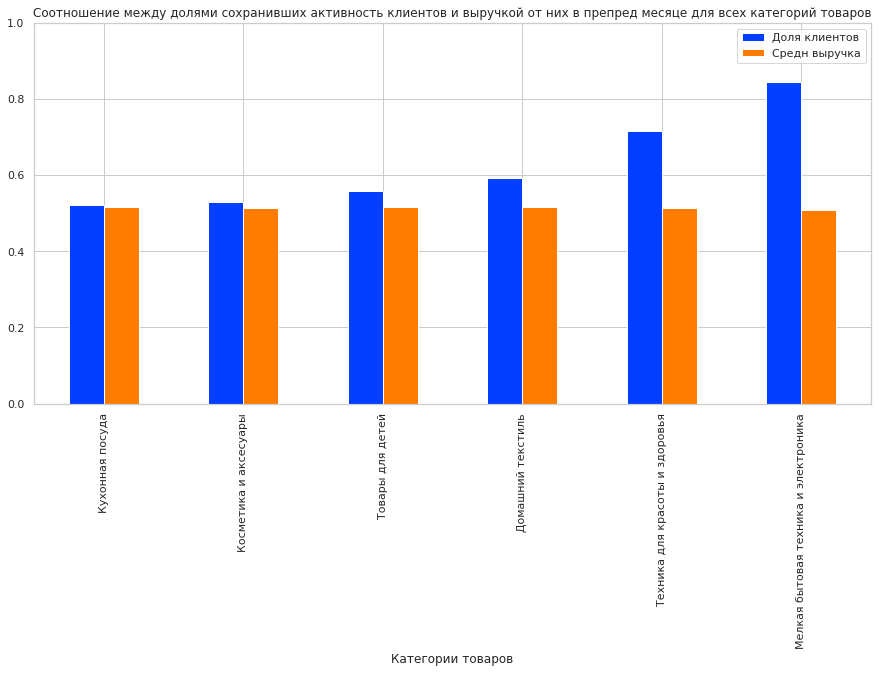

In [473]:
df_c = df.groupby(['Популярная_категория', 'Покупательская активность'], as_index = False).agg({'препред_месяц_v':['count', 'mean']})  
df_c['count_'] = df_c['препред_месяц_v']['count']
df_c['mean_'] = df_c['препред_месяц_v']['mean']
df_c['min_count'] = df_c['count_']
j = 0
for i in df_c['Популярная_категория'].unique():
    df_c.loc[df_c['Популярная_категория'] == i, 'min_count'] = df_c.loc[(df_c['Популярная_категория'] == i) & (df_c['Покупательская активность'] == 'Прежний уровень'), 'count_'][j] + df_c.loc[(df_c['Популярная_категория'] == i) & (df_c['Покупательская активность'] == 'Снизилась'), 'count_'][j+1]
    j+=2   
df_c['ratio_count'] = df_c['min_count']
j = 0
for i in df_c['Популярная_категория'].unique():
    df_c.loc[df_c['Популярная_категория'] == i, 'ratio_count'] = df_c.loc[(df_c['Популярная_категория'] == i) & (df_c['Покупательская активность'] == 'Прежний уровень'), 'count_'][j] / df_c.loc[(df_c['Популярная_категория'] == i) & (df_c['Покупательская активность'] == 'Прежний уровень'), 'min_count'][j]
    j+=2   
df_c['min_mean'] = df_c['mean_']
j = 0
for i in df_c['Популярная_категория'].unique():
    df_c.loc[df_c['Популярная_категория'] == i, 'min_mean'] = df_c.loc[(df_c['Популярная_категория'] == i) & (df_c['Покупательская активность'] == 'Прежний уровень'), 'mean_'][j] + df_c.loc[(df_c['Популярная_категория'] == i) & (df_c['Покупательская активность'] == 'Снизилась'), 'mean_'][j+1]
    j+=2  
df_c['ratio_mean'] = df_c['min_mean']
j = 0
for i in df_c['Популярная_категория'].unique():
    df_c.loc[df_c['Популярная_категория'] == i, 'ratio_mean'] = df_c.loc[(df_c['Популярная_категория'] == i) & (df_c['Покупательская активность'] == 'Прежний уровень'), 'mean_'][j] / df_c.loc[(df_c['Популярная_категория'] == i) & (df_c['Покупательская активность'] == 'Прежний уровень'), 'min_mean'][j]
    j+=2 
df_c = df_c[['Популярная_категория', 'ratio_count', 'ratio_mean']]
sns.set_style('whitegrid')
sns.set_palette('bright')
df_c.pivot_table(index = 'Популярная_категория', values = ['ratio_count', 'ratio_mean'], aggfunc = 'mean').sort_values(by = 'ratio_count').plot(kind='bar', figsize = (15,7), ylim = (0,1), title = 'Соотношение между долями сохранивших активность клиентов и выручкой от них в препред месяце для всех категорий товаров',
                                                    xlabel = 'Категории товаров', ylabel = '');
plt.legend(['Доля клиентов', 'Средн выручка']);

In [474]:
df_c['ratio_count'].corr(df_c['ratio_mean'])

-0.789861761652002

<div class="alert alert-info">
    Доля активных покупателей обратнопропорциональна доли средней выручки от покупателя в препредыдущем месяце (коэф корр)=-0,79.
Это связано с тем, что покупатели, совершившие недавно покупки в наиболее надежных категориях (красота и быт техника), склонны
делать перерыв в покупках (или снижать расходы на покупки) длиной в пару месяцев. 
</div>

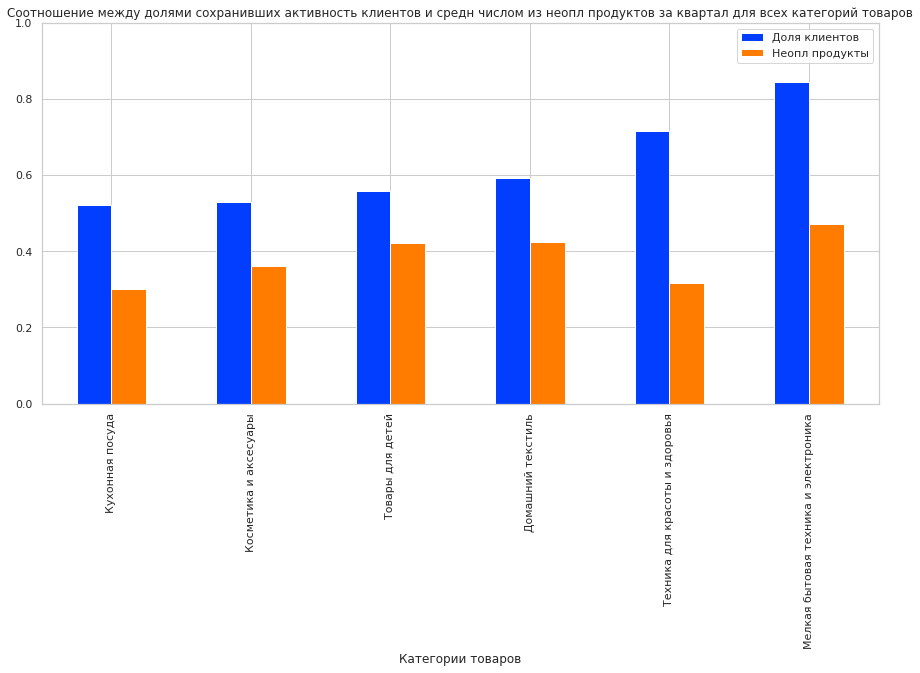

In [475]:
df_c = df.groupby(['Популярная_категория', 'Покупательская активность'], as_index = False).agg({'Неоплаченные_продукты_штук_квартал':['count', 'mean']})  
df_c['count_'] = df_c['Неоплаченные_продукты_штук_квартал']['count']
df_c['mean_'] = df_c['Неоплаченные_продукты_штук_квартал']['mean']
df_c['min_count'] = df_c['count_']
j = 0
for i in df_c['Популярная_категория'].unique():
    df_c.loc[df_c['Популярная_категория'] == i, 'min_count'] = df_c.loc[(df_c['Популярная_категория'] == i) & (df_c['Покупательская активность'] == 'Прежний уровень'), 'count_'][j] + df_c.loc[(df_c['Популярная_категория'] == i) & (df_c['Покупательская активность'] == 'Снизилась'), 'count_'][j+1]
    j+=2   
df_c['ratio_count'] = df_c['min_count']
j = 0
for i in df_c['Популярная_категория'].unique():
    df_c.loc[df_c['Популярная_категория'] == i, 'ratio_count'] = df_c.loc[(df_c['Популярная_категория'] == i) & (df_c['Покупательская активность'] == 'Прежний уровень'), 'count_'][j] / df_c.loc[(df_c['Популярная_категория'] == i) & (df_c['Покупательская активность'] == 'Прежний уровень'), 'min_count'][j]
    j+=2   
df_c['min_mean'] = df_c['mean_']
j = 0
for i in df_c['Популярная_категория'].unique():
    df_c.loc[df_c['Популярная_категория'] == i, 'min_mean'] = df_c.loc[(df_c['Популярная_категория'] == i) & (df_c['Покупательская активность'] == 'Прежний уровень'), 'mean_'][j] + df_c.loc[(df_c['Популярная_категория'] == i) & (df_c['Покупательская активность'] == 'Снизилась'), 'mean_'][j+1]
    j+=2  
df_c['ratio_mean'] = df_c['min_mean']
j = 0
for i in df_c['Популярная_категория'].unique():
    df_c.loc[df_c['Популярная_категория'] == i, 'ratio_mean'] = df_c.loc[(df_c['Популярная_категория'] == i) & (df_c['Покупательская активность'] == 'Прежний уровень'), 'mean_'][j] / df_c.loc[(df_c['Популярная_категория'] == i) & (df_c['Покупательская активность'] == 'Прежний уровень'), 'min_mean'][j]
    j+=2 
df_c = df_c[['Популярная_категория', 'ratio_count', 'ratio_mean']]
sns.set_style('whitegrid')
sns.set_palette('bright')
df_c.pivot_table(index = 'Популярная_категория', values = ['ratio_count', 'ratio_mean'], aggfunc = 'mean').sort_values(by = 'ratio_count').plot(kind='bar', figsize = (15,7), ylim = (0,1), title = 'Соотношение между долями сохранивших активность клиентов и средн числом из неопл продуктов за квартал для всех категорий товаров',
                                                    xlabel = 'Категории товаров', ylabel = '');
plt.legend(['Доля клиентов', 'Неопл продукты']);

In [476]:
df_c['ratio_count'].corr(df_c['ratio_mean'])

0.4653506720219968

<div class="alert alert-info">
    Доля активных пользователей пропорциональна их доли среднего количества неоплаченных товаров (коэф корр = 0,47). 
Видимо это связано с тем, что активные покупатели склонны заранее отбирать товары в корзину, оплачивая их не сразу, а 
в перспективе нескольких месяцев. С этим, вероятно, также связана обнаруженная тенденция снижения времени на сайте и 
количества листаемых страниц для активных покупателей, которые заранее отобирают интересующие их товары в корзину. 
</div>

In [477]:
sew = pd.DataFrame({'Признаки': ['Страниц_за_визит', 'пред_месяц_m', 'Акционные_покупки', 'тек_месяц_m', 'Маркет_актив_6_мес', 'препред_месяц_v', 'Неоплаченные_продукты_штук_квартал'], 'Направление признака для сохранения активности по SHAP-диаграмм': ['снижение', 'снижение', 'рост', 'снижение', 'снижение', 'снижение', 'рост'], 'корреляция':[-0.57, -0.68, +0.62, -0.67, -0.76, -0.79, +0.47]})

In [478]:
sew

Признаки  \
0                    Страниц_за_визит   
1                        пред_месяц_m   
2                   Акционные_покупки   
3                         тек_месяц_m   
4                  Маркет_актив_6_мес   
5                     препред_месяц_v   
6  Неоплаченные_продукты_штук_квартал   

  Направление признака для сохранения активности по SHAP-диаграмм  корреляция  
0                                                        снижение       -0.57  
1                                                        снижение       -0.68  
2                                                            рост        0.62  
3                                                        снижение       -0.67  
4                                                        снижение       -0.76  
5                                                        снижение       -0.79  
6                                                            рост        0.47

<div class="alert alert-info">
    Покатегориальные тенденции зависимости доли активных пользователей от доли средних значений наиболее значимых признаков
полностью соответствует представленной на диаграмме Шепли зависимости цели от величины признака.  
</div>

In [479]:
df_4 = pd.read_csv('/datasets/money.csv', decimal=",", sep=r';')
df_4[:5]

id  Прибыль
0  215348     0.98
1  215349     4.16
2  215350     3.13
3  215351     4.87
4  215352     4.21

In [480]:
df = pd.concat([df, df_4], axis = 1)

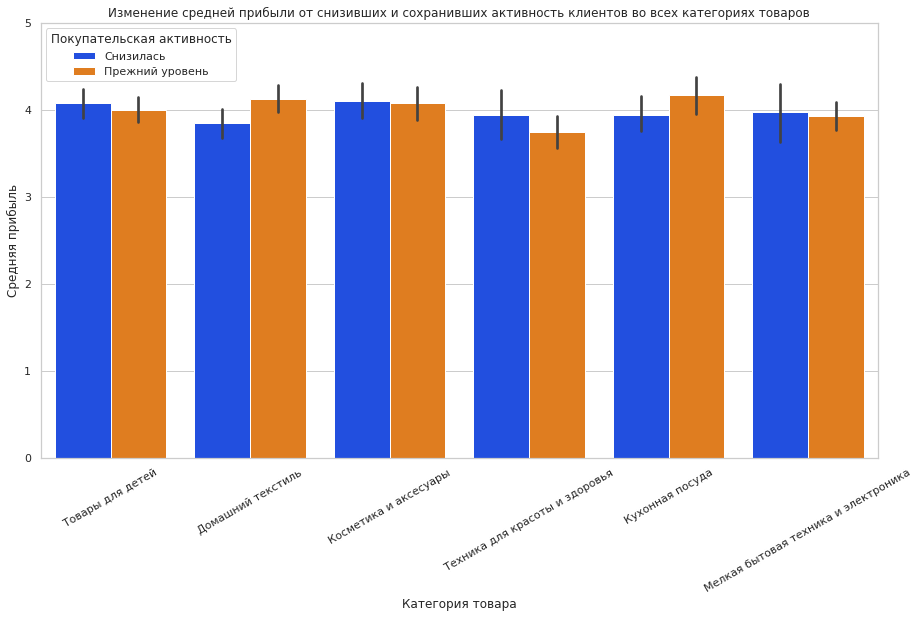

In [481]:
sns.set_style('whitegrid')
sns.set_palette('bright')
#df_c = df.groupby('category', as_index = False)['price'].mean().sort_values(by = 'price', ascending = False)
ax = sns.barplot(x='Популярная_категория', y='Прибыль', estimator=mean, hue = 'Покупательская активность', data = df)
sns.set(rc={'figure.figsize':(15,8)})
ax.set (xlabel='Категория товара',
        ylabel='Средняя прибыль',
        ylim = (0,5),
        title='Изменение средней прибыли от снизивших и сохранивших активность клиентов во всех категориях товаров')  
plt.xticks(rotation = 30)
plt.show()

<div class="alert alert-info">
    Средняя клиентская порибыль близка во всех категориях и практически не изменяется при переходе из группы активных клиентов к
снизившим покупательскую активность. 
</div>

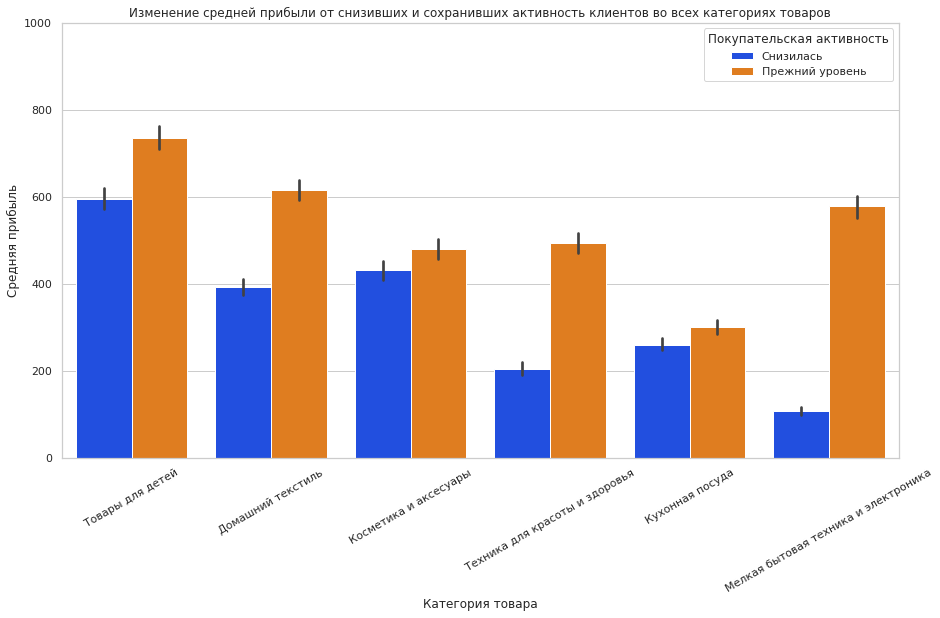

In [482]:
sns.set_style('whitegrid')
sns.set_palette('bright')
#df_c = df.groupby('category', as_index = False)['price'].mean().sort_values(by = 'price', ascending = False)
ax = sns.barplot(x='Популярная_категория', y='Прибыль', estimator=sum, hue = 'Покупательская активность', data = df)
sns.set(rc={'figure.figsize':(15,8)})
ax.set (xlabel='Категория товара',
        ylabel='Средняя прибыль',
        ylim = (0,1000),
        title='Изменение средней прибыли от снизивших и сохранивших активность клиентов во всех категориях товаров')  
plt.xticks(rotation = 30)
plt.show()

<div class="alert alert-info">
    Суммарная прибыль от клиентов, сохранивших активность, выше, по сравнению с величиной прибыли от утративших активность 
клиентов во всех категориях, что связано с более высокой численностью активных пользователей. Наибольший дисбаланс между 
обоими кластерами клиентов наблюдается для наиболее эффективных категорий, клиенты которых в большинстве сохраняют активность:
бытовая техника, красота и текстиль. В проблемных же категориях разница между суммарной прибылью от активных и пассивных
клиентов не высокая, что говорит о снижении доля активных покупателей в данных категориях. 
</div>

## Выводы
   <a id="start_8"></a>

<div class="alert alert-info"> 
 
<b>Загрузка и предобработка данных</b>

     Исходные таблицы с данными не содержат пропусков и дубликатов. В таблице df_1 (коммуникации с покупателем и его продуктовое
поведение) у 2 признаков ('Маркет_актив_6_мес', 'Акционные_покупки') неверный тип данных 'object' был преобразован в тип 'float'.
В табл. df_2 (общие расходы покупателя зв период взаимодействия с сайтом) неверный тип данных 'object' признака 'Выручка' был 
преобразован в тип 'float'. В табл. df_3 (время, проведенное покупателем на сайте) исправлена лексиграфическая ошибка в 
названии класса 'предыдyщий_месяц'. Таблицы df_1 и df_4 имеют одинаковое количество строк - 1300. В таблице df_3 - в 2 раза
больше строк (2600), а в табл. df_2 - в 3 раза (3900). Это связано с тем, что в таблице df_3 каждое значение в столбце 'id'
дублируется дважды из-за наличия двух категорий в признаке 'Период', а в табл. df_2 значение в столбце 'id' дублируется трижды,
так как признак 'Период' в этой таблице имеет 3 значения. В таблицах с большим количеством строк (df_2 и df_3) отсутствуют новые 
значения признака 'id', которых не встречаются в табл. df_1.    

<b> Анализ данных </b>

    Показатель среднемесячной рекламной активности за 6 мес. ('Маркет_актив_6_мес') имеет небольшой разброс: близкие среднее 
(4,25) и медианное (4,2) значения и относительно небольшое стандартное отклонение (1,01), составляющим 25 % от средней величины.
Текущая маркетинговая активность ('Маркет_актив_тек_мес') имеет близкие статистические характеристики к среднемесячной: 
прктически те же среднее (4,01) и медианное (4,0) значения с низким стандартным отклонением (0,7). Длительность пребывания 
на сайте ('Длительность') также имеет практически совпадающие среднее (601,9) и медианное (606) значения, но достаточное 
высокое стандартное отклонение (249,9), превышающее 40 % от среднего значения. Доля среднемесячных покупок по акции 
('Акционные_покупки') ожидаемо имеет большую дисперсию: среднее значение (0,32) отчетливо больше медианного (0,24), а стандартное
отклонение (0,25) превышает 80 % от величины среднего. Средний просмотр категорий ('Средний_просмотр_категорий_за_визит') имеет
умеренный разброс: среднее (3,27) и медианное (3,0) значения близки, стандартное отклонение составляет около 40 % от среднего. 
Количество неоплаченных продуктов ('Неоплаченные_продукты_штук_квартал') имеет довольно большую дисперсию: медианное (3,0) и
среднее (2,84) значения близки, а стандартное отклонение составляет около 70 % от среднего. Аналогичная ситуация с распределением
признака 'Ошибка сервиса': близкие среднее (4,18) и медианное (4,0) значения при высоком стандартном отклонении (около 50 %) от
среднего значения. Среднее количество страниц, промотренных пользователем за 1 визит ('Страниц_за_визит') (8,2), прктически 
совпадает с медианным (8,0) при величине стандартного отклонения порядка 50 % от среднего.
    Для пользователей, сохранивших прежний уровень покупательской активности, среднемесячная маркетинговая активность за 
последние 6 мес была, в целом, выше, чем для пользователей со понизившейся покупательной активностью и составляла от 4 до 7 
акций. Медианное число среднемесячных акций для сохраненных пользователей приближается к 5, а для пользователей с пониженной 
активносттью медианное число акций не превышает 4. Непрерывность признака текущей маркетинговой активности ('Маркет_актив_тек_мес')
нарушена из-за небольшого периода наблюдений - все пользователи разделены на 3 группы по числу полученных рекламных акций: 3, 4
и 5. Больше всего пользователей получили по 4 акции и примерно раные количества пользователей получили по 3 и 5 акций. Обе 
категории пользователей (сохранившие и снизившие покупат активность) пропорционально распределены по акционным группам без 
преобладания какой-либо из категорий. По признаку длительности пребывания на сайте ('Длительность') пользователи в обеих 
категориях покупательской активности распределены равномерно при близкой медиане порядка 600 дней. В категории сохранивших
покупат активность большинство пользователей имеют регистрацию на сайте от 300 до 900 дней, а в категории со снизившейся 
активностью большинство пользователей имеют длительность регистрации от 500 до 900 дней. По показателю среднемесячной доли 
покупок по акции ('Акционные_покупки') покупатели разделены на 2 группы - более 80 % покупателей имеют низкую долю акционных
покупок (0,1 до 0,4) и лишь около 20 % покупателей - высокую (0,8 - 1,0). При этом, клиенты из категории, сохранившей покупат
активность, сосредоточены в первой группе с низкой долей акционных покупок, а в группе с высокой долей акционных покупок более
80 % составляют клиенты, снизившие покупат активность. Медианная доля акционных покупок (около 0,25) у клиентов, сохранивших 
покупат активность, немного ниже, по сравнению с клиентами, снизившими покупат активность (около 0,3). Покупатели, сохранившие 
активность, в среднем просматривали в 2 раза больше категорий (медиана 4), чем покупатели, снизившие активность (медиана 2), что
также заметно на гистограмме распределения, где в группах просмотра от 4 до 6 категорий непропорционально преобладают 
пользователи, сохранившие активность. Медианное количество неоплаченных прордуктов примерно в 2 раза выше у покупателей, 
снизивших активность (4), по сравнению с активными покупателями (около 2). На гистограмме активные покупатели преобладают в 
начальном интервале неоплаченных товаров (от 0 до 5), а интервал неоплаченных товаров от 6 дл 10 практически полностью представлен 
покупателями, снизившими активность. На покупателей, сохранивших и снизивших активность, приходится близкое медианное число 
сбоев сервиса - около 4. Однако, на гистограмме распределения, активные покупатели явно преобладают в области большого числа сбоев
от 5 до 9, а в области от 1 до 4 сбоев число покупателей обеих групп примерно равно. Активные покупатели в просматривали примерно
в 2 раза больше сраниц за визит (около 11), по сравнению с категорией снизивших активность (5), не смотря на наличие выбросов
в низкоактивной кеатегории (от 13 до 18 стр.). Это также подтверждается на гистограмме просмотра страниц, где в области 7 - 20 стр.
преобладают активные покупатепли.
    Таким образом, из числовых (непрерывных) признаков наибольшее влияние на цель оказывают: 'Маркет_актив_6_мес', 
'Средний_просмотр_категорий_за_визит', 'Акционные_покупки', 'Неоплаченные_продукты_штук_квартал' и 'Страниц_за_визит'. 
Менее полезны признаки: 'Длительность' и 'Ошибка_сервиса'. Признак 'Маркет_актив_тек_мес' вероятно бесполезен в прогнозе цели.
    По значениям категориальных признаков пользователи распределены след образом. Пользователей, сохранивших активность (500), 
на 40 % больше, чем пользователей, снизивших активность (500). Около 900 пользователей обслуживаются в рамках стандартного 
сервиса и около 400 - в рамках премиального. Количество пользователей (около 950), разрешивших сообщать сведения о товарах,
в 3 раза больше, чем запретивших (около 350). Среди пользователей преобладает популярная категория 'Товары для детей' (350). На
втором и третьем местах идут домашний тексить и комсетика и аксесуары (250 и 225, соответственно). Категории бытовой техники и
техники красоты интересуют от 150 до 200 клиентов каждая. Менее всего интересна кухонная посуда - менее 150 пользователей. 
   Распределение численных характеристик по категориальным показывает, что распределения и медианы признаков 'Акционные_покупки', 
'Средний_просмотр_категорий_за_визит', 'Ошибка сервиса' и 'Страниц_за_визит' примерно совпадают для всех значений категорий
'Тип сервиса' и 'Разрешить сообщать'. Признак 'Неоплаченные_продукты_штук_квартал' равномерно распределен между значениями
категории 'Тип сервиса', а в категории 'Разрешить сообщать' медиана данного признака для значения 'нет' равна 2, а для 
значения 'да' - 3. Медина распределения признака 'Длительность' заметно меньше при значениях 'стандарт' и 'нет', соответствующих
категорий 'Тип сервиса' и 'Разрешить сообщать'. Медиана признака 'Маркет_актив_тек_мес' в категории 'Тип сервиса' существенно
выше для значения 'стандарт', по сравнению со значением 'премиум'. В категории 'Разрешить сообщать' медиана данного признака 
существенно ниже для значения 'Нет', по сраавнению со значением 'Да'. Медиана признака 'Маркет_актив_6_мес' немного выше для 
значений 'стандарт' и 'нет', соответствующих категориям 'Тип сервиса' и 'Разрешить сообщать'.
    Признаки 'Маркет_актив_6_мес' и 'Ошибка сервиса' распределены примерно одинаково при всех значениях 'Популярная_категория'.
Медиана признака 'Маркет_актив_тек_мес' минимальна при значении 'Домашний текстиль'. Признак 'Длительность' имеет несколько 
более высокие медианные значения для значений 'Кухонная посуда' и 'Мелкая быт техника'. А среди распределений признака 
'Акционные_покупки' лидирует 'Кухонная посуда'. Больше всего категорий за визит просматривается при значениях популярной 
категории 'Домашний текстиль' и 'Мелкая быт техника'. Менее всего склонны оплачивать выбранные продукты покупатели с 
популярными категориями 'Домашний текстиль' и 'Кухонная посуда'. Наименьшее среднее число просматриваемых страниц сайта за визит 
(медиана около 7) имеют покупатели с любимыми категориями 'Косметика и аксесуары' и 'Кухонная посуда'. 
    Количество точек в каждой категории признака 'Период' равно 1300, что соответствует числу клиентов. Таким образом, все 
клиенты совершали сделки в каждом из 3 последних месяцев.
    В текущем месяце есть значение выручки от клиента более 10000, а также в текущем и предыдущем месяце были зафиксированы 
нулевые значения выручки у некоторых клиентов. Исключив эти крайние значения, получаем распределения вируски клиентов во 
всех периодах. Самая большая медианная выручка (более 5000) в текущем месяце, в предыдущем месяце медиана составляла около 5000,
а в препредыдущем - менее 5000. В текущем и предыдущем месяцах есть выбросы со значением выручки менее 3000 и более 7000. 
    В течение текущего и предыдущего месяцев медианное время пребывания пользователя на сайте не изменяется и составляет около 
13 минут.
    
<b> Объединение таблиц </b>

    Было выполнено объединение первых 3 таблиц (df_1, df_2, df_3) с основной информацией о клиентах в сводную таблицу df. При 
этом, в сводной таблице каждому значению столбцов 'Период' в исходных таблицах df_2 и df_3 соответствует отдельный столбец.
Поэтому количество столбцов в сводной таблице df увеличилось, по сравнению с таблицей df_1, на 5. Целевой признак 
'Покупательская активность' сделан крайним слева. 

<b> Корреляционный анализ </b>

    Признаки помесячной выручки и помесячного количества минут пребывания на сайте распределены практически нормально, поэтому
степень корреляции между ними может быть оценена коэффициентом Пирсона.
    Построение phik-матрицы показывает отсутствие значений коэффициента Пирсона 0,9 и выше, то есть между признаками
нет избыточной взаимной корреляции и утечки целевого признака. Наиболее сильно скоррелированы с целью следующие признаки: 
'Страниц_за_визит' (0,75) и 'пред_месяц_m' (минуты на сайте в пред месяце) (0,68). Наибольшая взаимная корреляция наблюдается 
между следующими парами признаков: 'препред_месяц_v' (выручка в препред месяце) и 'Акционные_покупки' (0,75), 'пред_месяц_v'
(выручка в пред месяце) и 'Акционные_покупки' (0,64), 'пред_месяц_v' и 'препред_месяц_v' (0,73).
    Ряд численных параметров ('Маркет_актив_тек_меc', 'Длительность', 'тек_месяц_v') практически не имеют корреляции с целью и
будут бесполезны при использовании линейных моделей (логистической регрессии и SVC).
     Степень взаимной корреляции количественных признаков проверена с помощью оценки для каждого признака коэффициента инфляции
дисперсии (VIF), который характеризует степень корреляции между данным признаком и другими признаками модели. Проверка 
показала, что коэффициенты VIF для всех факторов существенно меньше 5 (лежат в пределах 1 - 2), что означает умеренную
взаимнную корреляцию, которая недостаточно велика, чтобы повлиять на надежность модели.
    При переходе к вычислению рангового коэффициента корреляции Спирмена, учитывающего отклонение от нормального распределения
непрерывных признаков, видно, что есть небольшая корреляция между целью и такими признаками, как 'Длительность' и 'тек_месяц_v'. 
Признак же 'Маркет_актив_тек_мес', как и в случае корреляции Пирсона, остается бесполезным для линейных моделей. 
    После полиномиального преобразования наиболее слабо влияющих на цель признаков ('Маркет_актив_тек_меc', 'Длительность', 
'тек_месяц_v') новые признаки хоть и очень слабо, но влияют на цель даже на уровне корреляции Пирсона. Не удалось только 
улучшить влияние на цель признака 'Маркет_актив_тек_мес'. Некоторые их этих новых признаков (x0x1, x1^2, x2^2) могут быть 
использованы вместо старых в для разработки моделей.
    
<b> Использование пайплайна </b>

   Для нахождения лучшей модели был составлен словарь из 4 моделей, каждая из которых включала один или несколько варьируемых
гиперпараметров. Так как количество вариантов сочетаний гиперпараметров велико (несколько тысяч), то был выбран метод случайного
поиска с кросс-валидацией cv = 5 (randomized_search()). В качестве основной метрики была выбрана 'roc-auc'. Это связано с тем, 
что в целевом поле ('Покупательская_активность') наблюдается серьезный диспаланс классов: количество объектов с признаком
'прежний уровень' в 2 раза больше, чем объектов 'снизилась'. Метрика 'roc_auc' наиболее устойчива к дисбалансу целевого класса, 
по сравнению с встроенной метрикой 'accuracy'.
     Наилучшей моделью в рамках заданных диапазонов гиперпараметров показала себя DecisionTreeClassifier(max_depth=7, 
max_features=7, min_samples_leaf=8) и StandardScaler(). Величина метрики 'roc-auc' на кросс-валидации составляет 0,86. 
    Первые 9 мест лучших моделей занимают деревья, а на 10 месте находится модель SVС, метрика которой уже весьма низкая 
roc_auc = 0,53.
    На тестовой выборке метрика 'roc_auc' лишь немного ниже, чем на трейновой и составляет 0,85. Это говорит о том, что
модель вполне адекватна и практически нет переобучения (разброса).

<b> Анализ важности признаков </b>  

    По версии функции feature_importances_, встроенной в дерево решений, наибольшее влияние на модель оказывает количество минут,
проведенное на сайте в пред месяц (0,4). Далее идут 'Акционные покупки' (0,25), число страниц, просматриваемых за визит 
'Страниц_за_визит' (0,1), количество неоплаченных продуктов ('Неоплаченные_продукты_штук_квартал') (0,8) и выручка за позапрошлый
месяц 'препред_мепсяц_v' (0,9). Значимость признаков примерно соответствует матрице корреляции данных признаков с целью.
    Восемь признаков, согласно feature_importances_, вообще не оказывают влияние на модель. Среди них 'Тип сервиса', а также 
признаки товара ('Кухонная посуда' и пр.). 
    Анализ вклада признаков в модель по версии метода permutation_importance(), измеряющего качество модели после поочередной
рэндомизации признаков, показывает тенденцию близкую к методу feateure_impotances_ (только места лидеров поменялись). 
В данном случае наиболее влиятельный признак 'Акционные покупки' (0,16), на втором месте - выручка за пред месяц 'пред_месяц_v' 
(0,12), далее идет количество минут на сайте в пред месяц 'пред_месяц_m' (0,10) и 'страниц_за_визит' (0,08). 13 признаков не 
влияют на результат - это признаки товара ('Кухонная посуда' и пр.), а также 'Тип сервиса' и 'Разрешить_сообщать'.
    Оба метода определения степени важности признаков (feature_importances_ и permutation_importance()), связанные с моделью,
показывают, что датафрейм содержит много лишних признаков, не оказывающих на нее влияние. Методом SelectKBest() было отобрано
8 наиболее важных признаков. Это позволило повысить качество модели, увеличив метрику roc_auc до 0,9. 
    SHAP-диаграмма влияния признаков на предсказания модели показывает, что наиболее влиятелен фактор 'Страниц_за_визит', 
повышение которого способствует понижению покупательской активности (класс 1). Аналогично действует второй по значимости 
показатель числа минут на сайте в пред месяце 'пред_месяц_m'. С ростом следующего по важности фактора доли акционных покупок 
'Акционные_покупки', наоборот, увеличивается вероятность сохранения покупательской активности (класс 0). Рост остальных 
факторов, так как 'тек_месяц_m', 'Маркет_актив_6_мес', 'препред_месяц_v', 'Средний_просмотор_категорий_за_визит' скорее 
способствует понижению покупательской активности. 
   В итоге, сохранение покупательской активности осуществляется, в основном, за счет акционных покупок. Действия же, которые
связаны с увеличением срока поиска товаров на сайте (количество минут, проведенных на сайте и число просматриваемых страниц и 
категорий)способствуют понижению активности покупателей. Также покупательский настрой снижает маркетинговая активность магазина. 
Таким образом, для сохранения покупательской активности необходимо увеличивать количество акций и совершенствовать их условия, а
также улучшать новигацию по сайту, чтобы покупатели тратили меньше времени на поиск товаров. 

   <b> Сегмкетация покупателей </b>

    Среди клиентов, снизивших покупательную активность, лидируют категории товаров для детей (29 %), косметика (21 %) и 
домашний текстиль (20 %). Среди снизивших активность клиентов наименьшую долю занимают категории бытовой техники (5 %) и 
и техники для красоты (10 %).
    Наибольшая доля клиентов, сохранивших активность (также как и у снизивших активность) занимает категория товаров для детей
(23 %). Далее идут категории домашнего тексителя (19 %) и бытовой техники (18 %). Нименьшие доли среди сохранивших активность 
занимают категории кухонной посуды (9 %) и косметики (15 %).
    Наименее проблемными с точки зрения сохранения покупательской активности являются клиенты, которые покупают в категориях 
бытовой техники (изменение доли при потере интереса -13 %) и техники красоты (изменение доли при потере интереса -6 %). 
Хуже всего обстоят дела в сегментах покупателей, интересующихся косметикой (изменение доли при потере интереса + 5 %) и 
кухонной посудой (увеличение доли категории при потере интереса + 4 %). Доли категории товаров для детей также растет
при потере интереса на 6 %. Доля же покупателей, интересующихся домашним текстилем практически неизменна в обоих группах 
 сохранивших и потерявших активность. Таким образом, усилия маркетинговой службы должны быть сконцентрированы на клиентах 
категорий косметики, товаров для детей и кухонной посуды. 
    Клиенты, сохранившие активность, вполне ожидаемо провели на сайте в пред месяце больше минут, чем клиенты, потерявшие 
интерес. 
    При покатегориальном сравнении доли клиентов, сохранивших активность, с их долей среднего времени на сайте выяснилось, что 
доля времени на сайте снижается с увеличением доли активных клиентов (коэф корреляции -0,67). Это соответствует тенденции
на диаграмме Шепли для данного признака и говорит о том, что сохранившие активность клиенты имеют склонность к снижению 
времени, затрачиваемого на поиск товара на сайте. Скорее всего это связано с тем, что активные клиенты лучше изучили сайт, а
также с тем, что интересующие их категории (бытовая техника, индустрия красоты) лучше структурированы. 
    Сохранившие активность клиенты в среднем просматривают за визит больше страниц, чем клиенты, снизившие активность. 
Покатегориальные доли клиентов, сохранивших активность обратнопропорциональны долям среднего количества просматриваемых 
ими страниц, что соответствует тенденции диаграммы Шепли для этого признака. То есть, активные клиенты имеют тенденцию 
к снижению количества просматриваемых страниц, что связано с хорошим знанием содержания сайта, а также с хорошей товарной
структурой интересующих их категорий. 
    Во всех категориях клиенты, потерявшие активность, совершали большее количество акционных покупок, по сравнению с активными
клиентами. По-видимому это связано с тем, что акционные покупки совершают, в основном, случайные клиенты, которые не являются
постоянными покупателями данной площадки, а информацию об акция они находят методом случайного скроллинга страниц и рекомендаций
поисковиков. Доля активных клиентов находится в прямой зависимости с долей совершаемых ими акционных покупок (коэф корр = 0,62), что
соотв тенденции на диаграмме Шепли для данного признака. Это говорит о том, что активных клиентов, являющихся постоянными 
покупателями сайта, привлекают акционные продажи, которые способствуют их сохранению. 
    Активные клиенты ожидаемо проводят на сайте больше времени в текущем месяце, чем потерявшие активность. 
Доля активных клиентов обратнопропорциональна доли среднего времени на сайте в текущем месяце (коэф корр = -0,67),
что соотв тенденции на диаграмме Шепли и говорит о том, что постоянные клиенты имеют склонность меньше проводить времени 
на сайте из-за его хорошей изученности и структурированности в интересующих их категориях. 
    Активные клиенты во всех товарных категориях испытывали в среднем большее количество маркетинговых акций, по сравнению с 
покупателями, снизившими активность. Это говорит об относительной эффективности рекламных акций.
    С  увеличением доли активных покупателей снижается соответствующая доля среднего числа применяемых к ним маркетинговых 
действий (коэф корр -0,76). Скорее всего это говорит о том, что маркетинговая активность магазина направлена в основном на 
удержание клиентов и усиливается при появлении признаков снижения покупательской активности, что не вполне эффективно в 
случае случаных покупателей, реагирующих только на акции.
    Доля активных покупателей обратнопропорциональна доли средней выручки от покупателя в препредыдущем месяце (коэф корр)=-0,79.
Это связано с тем, что покупатели, совершившие недавно покупки в наиболее надежных категориях (красота и быт техника), склонны
делать перерыв в покупках (или снижать расходы на покупки) длиной в пару месяцев. 
    Доля активных пользователей пропорциональна их доли среднего количества неоплаченных товаров (коэф корр = 0,47). 
Видимо это связано с тем, что активные покупатели склонны заранее отбирать товары в корзину, оплачивая их не сразу, а 
в перспективе нескольких месяцев. С этим, вероятно, также связана обнаруженная тенденция снижения времени на сайте и 
количества листаемых страниц для активных покупателей, которые заранее отобирают интересующие их товары в корзину. 
    Покатегориальные тенденции зависимости доли активных пользователей от доли средних значений наиболее значимых признаков
полностью соответствует представленной на диаграмме Шепли зависимости цели от величины признака.  
    Средняя клиентская порибыль близка во всех категориях и практически не изменяется при переходе из группы активных клиентов к
снизившим покупательскую активность. 
    Суммарная прибыль от клиентов, сохранивших активность, выше, по сравнению с величиной прибыли от утративших активность 
клиентов во всех категориях, что связано с более высокой численностью активных пользователей. Наибольший дисбаланс между 
обоими кластерами клиентов наблюдается для наиболее эффективных категорий, клиенты которых в большинстве сохраняют активность:
бытовая техника, красота и текстиль. В проблемных же категориях разница между суммарной прибылью от активных и пассивных
клиентов не высокая, что говорит о снижении доля активных покупателей в данных категориях. 


<div class="alert alert-info"> 
 
<b>Исслетование сектора клиентов категории техники крпастоы и здоровья</b>

      Ряд категорий товаров либо не демонстрируют связь между прибыльностью и вероятностью снижения активности покапателей
(Бытовая техника, текстить), либо вероятность уменьшения активности слабо понижается с увеличением прибылдьности (красота, 
посуда). Только в 2 товарных категориях вероятность сниженной активности покупателей пропорциональна доходности от покупателей:
товаря для детей (коэф корр = 0,13) и косметика (коэф корр 0,17). Эти товарные категории самые проблемные для магазина, так как
потеря в них покупательской активности означает уход с площадки самых прибыльных клиентов. Такую аномалию можно объяснить тем,
что в данных сегментах находится много оптовых покупателей, которые теряют активность на какое-то время после групных закупок,
поэтому чем крупнее были покупки клиента (прибыль от клиента) тем больше вероятность, что его активность в ближайшие месяцы 
снизится. 
      Для категории 'Техника для красоты и здоровья' были изучены точечные диаграммы зависмости вероятности потрери 
покупательской активности от самых значимых числовых признаков, которые выявило моделирование. Видно, что дополнительная
разбивка по категориальным признакам (тип сервиса и разрешение сообщать доп информацию) не является информативной, то как 
не влияет на вероятность потери активностти. Снижение количества минут на сайте в пред месяце, снижение выручки в препред 
месяце и уменьшение просматриваемых страниц приводят к росту вероятности потери активности. И, наоборот, увеличение доли
акционных покупок и увеличение количества неоплаченных товаров повышают вероятность.  
   Анализ полученных результатов показывает, что в категории техники красоты наиболее прибыльные клиенты - это разовые или
оптовые покупатели, которые в основном ищут на сайте акционные предложения и делают редкие крупные покупки. Поэтому чем больше 
была доля акционных покупок у клиента, тем выше вероятность, что он в ближ месяцы не будет совершать покупок. Такие клиенты 
заранее отбирают товары в корзину и определенных срок не оплачтивают их, дожидаясь акций. Поэтому рост вероятности потери 
активности пропорционален количеству неоплаченных товаров. Вероятность сохранить покупательскую активность повышается с 
увеличением активности клиента на сайте в предыдущий срок, то есть, с увеличением числа минут на сайте в пред месяц и 
количества просматриваемых страниц за визит, а также с увеличением выручки в препред месяце (клиент давно делал закупку 
и вероятно готов сделать в текущем месяце) 

## Рекомендации
   <a id="start_9"></a>

<div class="alert alert-info">
    Для сохранения покупательской активности в наиболее уязвимых товарных категориях (кухонная посуда, косметика и товары 
для детей) необходимо использовать самые действенные признаки, которые были выявлен в процессе машинного обучения:
         - активные клиенты проявляют склонность к снижению времени пребывания на сайте и уменьшению среднего количества 
просматриваемых страниц. Поэтому для сохранения интереса к покупкам в необходимо предпринять усилия по повышению информативности 
страниц сайта с товарами проблемных категорий, чтобы облегчить навигацию и сократить время поиска. Например, для оптимизации
поиска можно предумотреть облако тэгов, горячие клавиши, рекомендации наиболее востребованных товаров, индикаторы актуальных 
скидок.
         - использование акций, в общем, приводит к росту интереса у покупателей разных товарных категорий. Однако, текущими
акциями активно пользуются случайные покупатели, которые теряют интерес к площадке после совершения покупки. Необходимо 
расширить акционные кампании с ориентацией на постоянных клиентов, регулярно присутствующих на сайте. Например, предоставлять 
прогрессивные товарные скидки, которые растут с увеличением количества покупок и стимулируют клиента к регулярным покупкам 
без длительных перерывов.
        - клиенты всех товарнывх категорий, сохранившие покупательский интерес, в среднем, испытывали больше рекламных 
итераций, по сравнению с клиентами, потрерявшими активность. Однако, сейчас реламные акции направлены, в основном, на временных
(случайных) покупателей (с одной покупкой) с целью их удержания, поэтому не столь эффективны в товарных проблемных. Необходимо
расширить рекламные итерации, ориентированные на клиентов, совершивших несколько покупок для закрепления успеха.
        - активные покупатели любят складывать понравившиеся товары в корзину с отложенной оплатой. Это экономит время 
поиска товаров, так как они уже собраны в одном месте и ожидают сделки. Поэтому необходимо улучшить технологию хранения 
отобранных товаров, увеличив срок хранения и емкость корзины. Помогут также всплывающие рекомендации об аналогичных отобранным
товарах, обладающих для покупателя потенциальной привлекательностью - акции, лучшее соотношение цена-качество, альтернативный
производитель и пр. 
</div>

<div class="alert alert-info"> 
     Для стимулирования покупательской активности клиентов необходимо проводить более гибкую
акционную политику для постоянных клиентов, информируя их об этом и поощряя регулярные покупки (система скидок за крупную 
покупку или за частые покупки). Кроме того, необходимо улучшить сервис отбора товара, используя более удобные корзины и 
всплывающие предложения аналогичных товаров с улучшенным соотношением цена/качество. Кроме того, активность клиентов увеличивает
привлекательность и информативность сайта, размещение новых продуктов и простота навигации. 